In [1]:
import pandas as pd
import numpy as np
from pyhive import hive
import warnings
warnings.filterwarnings('ignore')
from datetime import timedelta, date
from sklearn import metrics
import pickle
import time
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, average_precision_score, precision_score, recall_score

In [2]:
!kinit -kt edtolstov.keytab edtolstov
!klist

Ticket cache: FILE:/tmp/krb5cc_815720870
Default principal: edtolstov@BEE.VIMPELCOM.RU

Valid starting       Expires              Service principal
05/30/2019 18:37:23  05/31/2019 04:37:23  krbtgt/BEE.VIMPELCOM.RU@BEE.VIMPELCOM.RU
	renew until 06/06/2019 18:37:23


In [3]:
conn = hive.Connection(host = "hd-has014.vimpelcom.ru", port = "10000", username = "edtolstov", database = "arstel", 
                       auth = "KERBEROS", kerberos_service_name = "hive", configuration = {'job.queue.name': 'adhoc'})
cursor = conn.cursor()

s00='''set mapred.job.queue.name=adhoc'''
cursor.execute(s00)

----------------

In [4]:
%%time

s1 = '''select * from cvm_stg.ms_multisim_2_features_v1'''

s1 = s1.replace('\n',' ')

data = pd.read_sql(s1, conn)

CPU times: user 3min 32s, sys: 4.33 s, total: 3min 36s
Wall time: 4min 30s


In [21]:
data.columns = [
'subs_key',
'market_key_src',
'ban_key',
'arpu_segment',
'network_lifetime',
'dual_sim',
'job_cnt',
'pass_cnt',
'imei_cnt',
'cost_device',
'called_ctn_all_group',
'recharge_1m',
'3m_uniq_count',
'6m_uniq_count',
'day_in',
'day_out',
'evening_out',
'evening_in',
'birthday',
'p10',
't29',
't7',
't277',
'banks_sms_count_6m',
'banks_sms_count_3m',
'count_new_uniq_cont_1m',
'count_new_uniq_cont_2m',
'calls_m_sum',
'data_kb_sum',
'target1_ind',
'forward_cnt_092018',
'forward_cnt_102018',
'forward_cnt_112018',
'forward_cnt_122018',
'forward_cnt_012019',
'forward_cnt_022019',
'forward_cnt_032019',
'lk_competitor_cnt_092018',
'lk_competitor_cnt_102018',
'lk_competitor_cnt_112018',
'lk_competitor_cnt_122018',
'lk_competitor_cnt_012019',
'lk_competitor_cnt_022019',
'lk_competitor_cnt_032019',
'intercity_voice_traffic_in_092018',
'intercity_voice_traffic_in_102018',
'intercity_voice_traffic_in_112018',
'intercity_voice_traffic_in_122018',
'intercity_voice_traffic_in_012019',
'intercity_voice_traffic_in_022019',
'intercity_voice_traffic_in_032019',
'intercity_voice_traffic_out_092018',
'intercity_voice_traffic_out_102018',
'intercity_voice_traffic_out_112018',
'intercity_voice_traffic_out_122018',
'intercity_voice_traffic_out_012019',
'intercity_voice_traffic_out_022019',
'intercity_voice_traffic_out_032019',
'sms_in_092018',
'sms_in_102018',
'sms_in_112018',
'sms_in_122018',
'sms_in_012019',
'sms_in_022019',
'sms_in_032019',
'sms_out_092018',
'sms_out_102018',
'sms_out_112018',
'sms_out_122018',
'sms_out_012019',
'sms_out_022019',
'sms_out_032019',
'price_plan_092018',
'price_plan_102018',
'price_plan_112018',
'price_plan_122018',
'price_plan_012019',
'price_plan_022019',
'price_plan_032019',
'competitor_call_092018',
'competitor_call_102018',
'competitor_call_112018',
'competitor_call_122018',
'competitor_call_012019',
'competitor_call_022019',
'competitor_call_032019',
'only_job_indicator_092018',
'only_job_indicator_102018',
'only_job_indicator_112018',
'only_job_indicator_122018',
'only_job_indicator_012019',
'only_job_indicator_022019',
'only_job_indicator_032019',
'children_ind_092018',
'children_ind_102018',
'children_ind_112018',
'children_ind_122018',
'children_ind_012019',
'children_ind_022019',
'children_ind_032019',
'business_type_092018',
'business_type_102018',
'business_type_112018',
'business_type_122018',
'business_type_012019',
'business_type_022019',
'business_type_032019',
'international_voice_traffic_in_092018',
'international_voice_traffic_in_102018',
'international_voice_traffic_in_112018',
'international_voice_traffic_in_122018',
'international_voice_traffic_in_012019',
'international_voice_traffic_in_022019',
'international_voice_traffic_in_032019',
'international_voice_traffic_out_092018',
'international_voice_traffic_out_102018',
'international_voice_traffic_out_112018',
'international_voice_traffic_out_122018',
'international_voice_traffic_out_012019',
'international_voice_traffic_out_022019',
'international_voice_traffic_out_032019',
'iptv_fttb_indicator_012019',
'iptv_fttb_indicator_022019',
'iptv_fttb_indicator_032019',
'broadband_comp_call_ind_012019',
'broadband_comp_call_ind_022019',
'broadband_comp_call_ind_032019',
'device_type_122018',
'device_type_012019',
'device_type_022019',
'device_type_032019',
'payments_amount_012019',
'payments_amount_022019',
'payments_amount_032019',
'outside_russia_cnt_012019',
'outside_russia_cnt_022019',
'outside_russia_cnt_032019',
'credit_card_ind_6m',
'num_of_deb_cards',
'num_of_crd_cards',
'debit_refill_sum',
'all_debit_refill_sum',
'all_debit_down_sum',
'all_avg_monthly_pay',
'collector_calls_ind',
'sum_top_5_refill',
'sum_retail',
'income_debit_card',
'household_key',
'household_size',
'household_income',
'household_income_category',
'children_ind',
'employment_type',
'inactivity',
'inactivity_top',
'age_category',
'gender_male_prob',
'main_balance_adjust_plus_sum',
'main_balance_adjust_plus_cnt',
'main_balance_adjust_minus_sum',
'main_balance_adjust_minus_cnt',
'first_balance_chrg_sum',
'first_balance_chrg_cnt',
'extr_currnc_balance_chrg_sum',
'extr_currnc_balance_chrg_cnt',
'payments_count',
'payments_amount',
'device_aging_012019',
'device_aging_022019',
'device_aging_032019',
'debt_ind_012019',
'debt_ind_022019',
'debt_ind_032019',
'price_plan_change_date_012019',
'price_plan_change_date_022019',
'price_plan_change_date_032019',
'num_voice1_out_012019',
'num_voice1_out_022019',
'num_voice1_out_032019',
'currency_key_012019',
'currency_key_022019',
'currency_key_032019',
'device_change_date_012019',
'device_change_date_022019',
'device_change_date_032019',
'aab_ind_012019',
'aab_ind_022019',
'aab_ind_032019',
'income_012019',
'income_022019',
'income_032019',
'another_contact_phone_ind_012019',
'another_contact_phone_ind_022019',
'another_contact_phone_ind_032019',
'family_status_012019',
'family_status_022019',
'family_status_032019',
'cnt_mob_phones_month_012019',
'cnt_mob_phones_month_022019',
'cnt_mob_phones_month_032019',
'inter_finance_012019',
'inter_priceplan_012019',
'inter_discount_012019',
'inter_content_012019',
'inter_action_012019',
'inter_charge_012019',
'inter_socs_012019',
'interaction_channel_type_key_cnt_012019',
'inter_finance_022019',
'inter_priceplan_022019',
'inter_discount_022019',
'inter_content_022019',
'inter_action_022019',
'inter_charge_022019',
'inter_socs_022019',
'interaction_channel_type_key_cnt_022019',
'inter_finance_032019',
'inter_priceplan_032019',
'inter_discount_032019',
'inter_content_032019',
'inter_action_032019',
'inter_charge_032019',
'inter_socs_032019',
'interaction_channel_type_key_cnt_032019',
'sum_recharges_2m_012019',
'sum_recharges_2m_022019',
'sum_recharges_2m_032019',
'sum_recharges_3m_012019',
'sum_recharges_3m_022019',
'sum_recharges_3m_032019',
'target2_ind'
]

In [26]:
data = data[(data.target2_ind == 0)|(data.target2_ind == 1)]
data['target2_ind'] = pd.to_numeric(data['target2_ind'])

In [28]:
data['arpu_segment'].fillna('Unknown', inplace=True)

data['dual_sim'].fillna('Unknown', inplace=True)

data['birthday'].fillna('Unknown', inplace=True)

data['job_cnt'].fillna(-99, inplace=True)

data['pass_cnt'].fillna(-99,inplace=True)
data['imei_cnt'].fillna(-99,inplace=True)
data['cost_device'].fillna(-99,inplace=True)
data['called_ctn_all_group'].fillna(-99,inplace=True)
data['recharge_1m'].fillna(-99,inplace=True)
data['3m_uniq_count'].fillna(-99,inplace=True)
data['6m_uniq_count'].fillna(-99,inplace=True)
data['banks_sms_count_6m'].fillna(-99,inplace=True)
data['banks_sms_count_3m'].fillna(-99,inplace=True)
data['count_new_uniq_cont_1m'].fillna(-99,inplace=True)
data['count_new_uniq_cont_2m'].fillna(-99,inplace=True)

data['price_plan_012019'].fillna('Unknown', inplace=True)
data['price_plan_022019'].fillna('Unknown', inplace=True)
data['price_plan_032019'].fillna('Unknown', inplace=True)

In [71]:
feat = [
'market_key_src',
'birthday',
'price_plan_092018',
'price_plan_102018',
'price_plan_112018',
'price_plan_122018',
'price_plan_012019',
'price_plan_022019',
'price_plan_032019',
'arpu_segment',
'dual_sim',
'business_type_092018',
'business_type_102018',
'business_type_112018',
'business_type_122018',
'business_type_012019',
'business_type_022019',
'business_type_032019',
'device_type_122018',
'device_type_012019',
'device_type_022019',
'device_type_032019',
'price_plan_change_date_012019',
'price_plan_change_date_022019',
'price_plan_change_date_032019',
'currency_key_012019',
'currency_key_022019',
'currency_key_032019',
'device_change_date_012019',
'device_change_date_022019',
'device_change_date_032019',
'income_012019',
'income_022019',
'income_032019',
'family_status_012019',
'family_status_022019',
'family_status_032019',


'network_lifetime',
'job_cnt',
'pass_cnt',
'imei_cnt',
'cost_device',
'called_ctn_all_group',
'recharge_1m',
'3m_uniq_count',
'6m_uniq_count',
'p10',
't29',
't7',
't277',
'banks_sms_count_6m',
'banks_sms_count_3m',
'count_new_uniq_cont_1m',
'count_new_uniq_cont_2m',
'calls_m_sum',
'data_kb_sum',
'forward_cnt_092018',
'forward_cnt_102018',
'forward_cnt_112018',
'forward_cnt_122018',
'forward_cnt_012019',
'forward_cnt_022019',
'forward_cnt_032019',
'lk_competitor_cnt_092018',
'lk_competitor_cnt_102018',
'lk_competitor_cnt_112018',
'lk_competitor_cnt_122018',
'lk_competitor_cnt_012019',
'lk_competitor_cnt_022019',
'lk_competitor_cnt_032019',
'intercity_voice_traffic_in_092018',
'intercity_voice_traffic_in_102018',
'intercity_voice_traffic_in_112018',
'intercity_voice_traffic_in_122018',
'intercity_voice_traffic_in_012019',
'intercity_voice_traffic_in_022019',
'intercity_voice_traffic_in_032019',
'intercity_voice_traffic_out_092018',
'intercity_voice_traffic_out_102018',
'intercity_voice_traffic_out_112018',
'intercity_voice_traffic_out_122018',
'intercity_voice_traffic_out_012019',
'intercity_voice_traffic_out_022019',
'intercity_voice_traffic_out_032019',
'sms_in_092018',
'sms_in_102018',
'sms_in_112018',
'sms_in_122018',
'sms_in_012019',
'sms_in_022019',
'sms_in_032019',
'sms_out_092018',
'sms_out_102018',
'sms_out_112018',
'sms_out_122018',
'sms_out_012019',
'sms_out_022019',
'sms_out_032019',
'competitor_call_092018',
'competitor_call_102018',
'competitor_call_112018',
'competitor_call_122018',
'competitor_call_012019',
'competitor_call_022019',
'competitor_call_032019',
'only_job_indicator_092018',
'only_job_indicator_102018',
'only_job_indicator_112018',
'only_job_indicator_122018',
'only_job_indicator_012019',
'only_job_indicator_022019',
'only_job_indicator_032019',
'children_ind_092018',
'children_ind_102018',
'children_ind_112018',
'children_ind_122018',
'children_ind_012019',
'children_ind_022019',
'children_ind_032019',
'international_voice_traffic_in_092018',
'international_voice_traffic_in_102018',
'international_voice_traffic_in_112018',
'international_voice_traffic_in_122018',
'international_voice_traffic_in_012019',
'international_voice_traffic_in_022019',
'international_voice_traffic_in_032019',
'international_voice_traffic_out_092018',
'international_voice_traffic_out_102018',
'international_voice_traffic_out_112018',
'international_voice_traffic_out_122018',
'international_voice_traffic_out_012019',
'international_voice_traffic_out_022019',
'international_voice_traffic_out_032019',
'iptv_fttb_indicator_012019',
'iptv_fttb_indicator_022019',
'iptv_fttb_indicator_032019',
'broadband_comp_call_ind_012019',
'broadband_comp_call_ind_022019',
'broadband_comp_call_ind_032019',
'payments_amount_012019',
'payments_amount_022019',
'payments_amount_032019',
'outside_russia_cnt_012019',
'outside_russia_cnt_022019',
'outside_russia_cnt_032019',
'credit_card_ind_6m',
'num_of_deb_cards',
'num_of_crd_cards',
'debit_refill_sum',
'all_debit_refill_sum',
'all_debit_down_sum',
'all_avg_monthly_pay',
'collector_calls_ind',
'sum_top_5_refill',
'sum_retail',
'income_debit_card',
'household_key',
'household_size',
'household_income',
'household_income_category',
'children_ind',
'employment_type',
'inactivity',
'inactivity_top',
'age_category',
'gender_male_prob',
'main_balance_adjust_plus_sum',
'main_balance_adjust_plus_cnt',
'main_balance_adjust_minus_sum',
'main_balance_adjust_minus_cnt',
'first_balance_chrg_sum',
'first_balance_chrg_cnt',
'extr_currnc_balance_chrg_sum',
'extr_currnc_balance_chrg_cnt',
'payments_count',
'payments_amount',
'device_aging_012019',
'device_aging_022019',
'device_aging_032019',
'debt_ind_012019',
'debt_ind_022019',
'debt_ind_032019',
'num_voice1_out_012019',
'num_voice1_out_022019',
'num_voice1_out_032019',
'aab_ind_012019',
'aab_ind_022019',
'aab_ind_032019',
'another_contact_phone_ind_012019',
'another_contact_phone_ind_022019',
'another_contact_phone_ind_032019',
'cnt_mob_phones_month_012019',
'cnt_mob_phones_month_022019',
'cnt_mob_phones_month_032019',
'inter_finance_012019',
'inter_priceplan_012019',
'inter_discount_012019',
'inter_content_012019',
'inter_action_012019',
'inter_charge_012019',
'inter_socs_012019',
'interaction_channel_type_key_cnt_012019',
'inter_finance_022019',
'inter_priceplan_022019',
'inter_discount_022019',
'inter_content_022019',
'inter_action_022019',
'inter_charge_022019',
'inter_socs_022019',
'interaction_channel_type_key_cnt_022019',
'inter_finance_032019',
'inter_priceplan_032019',
'inter_discount_032019',
'inter_content_032019',
'inter_action_032019',
'inter_charge_032019',
'inter_socs_032019',
'interaction_channel_type_key_cnt_032019',
'sum_recharges_2m_012019',
'sum_recharges_2m_022019',
'sum_recharges_2m_032019',
'sum_recharges_3m_012019',
'sum_recharges_3m_022019',
'sum_recharges_3m_032019'
]

In [66]:
data['price_plan_092018'].fillna('Unknown', inplace=True)
data['price_plan_102018'].fillna('Unknown', inplace=True)
data['price_plan_112018'].fillna('Unknown', inplace=True)
data['price_plan_122018'].fillna('Unknown', inplace=True)

data['business_type_092018'].fillna('Unknown', inplace=True)
data['business_type_102018'].fillna('Unknown', inplace=True)

In [72]:
X = data[feat]
Y = data['target2_ind']

x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(X, Y, test_size = 0.2, random_state=42)
cat_features=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]

In [73]:
X.info(max_cols = 1000)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279670 entries, 1 to 336776
Data columns (total 224 columns):
market_key_src                             279670 non-null object
birthday                                   279670 non-null object
price_plan_092018                          279670 non-null object
price_plan_102018                          279670 non-null object
price_plan_112018                          279670 non-null object
price_plan_122018                          279670 non-null object
price_plan_012019                          279670 non-null object
price_plan_022019                          279670 non-null object
price_plan_032019                          279670 non-null object
arpu_segment                               279670 non-null object
dual_sim                                   279670 non-null object
business_type_092018                       279670 non-null object
business_type_102018                       279670 non-null object
business_type_112018          

In [74]:
model = CatBoostClassifier(loss_function='Logloss', nan_mode='Min', iterations=1000, depth=6,
                               l2_leaf_reg=100, learning_rate=0.4, random_seed=42)

model.fit(x_train_all, y_train_all,cat_features,
          eval_set=(x_test_all,y_test_all),
          plot = True,
          use_best_model=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6890862	test: 0.6887634	best: 0.6887634 (0)	total: 288ms	remaining: 8m 38s
1:	learn: 0.6852561	test: 0.6846260	best: 0.6846260 (1)	total: 556ms	remaining: 8m 20s
2:	learn: 0.6816357	test: 0.6807586	best: 0.6807586 (2)	total: 851ms	remaining: 8m 29s
3:	learn: 0.6782475	test: 0.6770863	best: 0.6770863 (3)	total: 1.12s	remaining: 8m 21s
4:	learn: 0.6750321	test: 0.6735639	best: 0.6735639 (4)	total: 1.38s	remaining: 8m 16s
5:	learn: 0.6720057	test: 0.6703155	best: 0.6703155 (5)	total: 1.7s	remaining: 8m 29s
6:	learn: 0.6692238	test: 0.6673644	best: 0.6673644 (6)	total: 1.99s	remaining: 8m 30s
7:	learn: 0.6665232	test: 0.6643877	best: 0.6643877 (7)	total: 2.26s	remaining: 8m 27s
8:	learn: 0.6639867	test: 0.6616817	best: 0.6616817 (8)	total: 2.56s	remaining: 8m 30s
9:	learn: 0.6614228	test: 0.6588835	best: 0.6588835 (9)	total: 2.86s	remaining: 8m 32s
10:	learn: 0.6589070	test: 0.6561316	best: 0.6561316 (10)	total: 3.15s	remaining: 8m 31s
11:	learn: 0.6564778	test: 0.6534585	best:

93:	learn: 0.5932068	test: 0.5848996	best: 0.5848996 (93)	total: 25.7s	remaining: 7m 46s
94:	learn: 0.5929823	test: 0.5846603	best: 0.5846603 (94)	total: 26s	remaining: 7m 45s
95:	learn: 0.5927100	test: 0.5843362	best: 0.5843362 (95)	total: 26.2s	remaining: 7m 45s
96:	learn: 0.5923776	test: 0.5839257	best: 0.5839257 (96)	total: 26.5s	remaining: 7m 45s
97:	learn: 0.5921375	test: 0.5836845	best: 0.5836845 (97)	total: 26.8s	remaining: 7m 45s
98:	learn: 0.5918895	test: 0.5834400	best: 0.5834400 (98)	total: 27s	remaining: 7m 44s
99:	learn: 0.5916191	test: 0.5831256	best: 0.5831256 (99)	total: 27.3s	remaining: 7m 44s
100:	learn: 0.5913749	test: 0.5828715	best: 0.5828715 (100)	total: 27.6s	remaining: 7m 43s
101:	learn: 0.5910509	test: 0.5824730	best: 0.5824730 (101)	total: 27.9s	remaining: 7m 43s
102:	learn: 0.5907970	test: 0.5821637	best: 0.5821637 (102)	total: 28.1s	remaining: 7m 42s
103:	learn: 0.5905635	test: 0.5818830	best: 0.5818830 (103)	total: 28.4s	remaining: 7m 42s
104:	learn: 0.590

184:	learn: 0.5770711	test: 0.5673297	best: 0.5673297 (184)	total: 50.1s	remaining: 7m 17s
185:	learn: 0.5769664	test: 0.5672230	best: 0.5672230 (185)	total: 50.3s	remaining: 7m 16s
186:	learn: 0.5768223	test: 0.5670316	best: 0.5670316 (186)	total: 50.7s	remaining: 7m 16s
187:	learn: 0.5766705	test: 0.5668694	best: 0.5668694 (187)	total: 50.9s	remaining: 7m 16s
188:	learn: 0.5765707	test: 0.5667691	best: 0.5667691 (188)	total: 51.2s	remaining: 7m 16s
189:	learn: 0.5764815	test: 0.5666852	best: 0.5666852 (189)	total: 51.5s	remaining: 7m 16s
190:	learn: 0.5763945	test: 0.5665962	best: 0.5665962 (190)	total: 51.7s	remaining: 7m 15s
191:	learn: 0.5762841	test: 0.5664597	best: 0.5664597 (191)	total: 52s	remaining: 7m 15s
192:	learn: 0.5761603	test: 0.5663561	best: 0.5663561 (192)	total: 52.2s	remaining: 7m 14s
193:	learn: 0.5760227	test: 0.5662250	best: 0.5662250 (193)	total: 52.5s	remaining: 7m 14s
194:	learn: 0.5759266	test: 0.5661284	best: 0.5661284 (194)	total: 52.8s	remaining: 7m 14s
1

275:	learn: 0.5689677	test: 0.5591011	best: 0.5591011 (275)	total: 1m 14s	remaining: 6m 49s
276:	learn: 0.5688866	test: 0.5590163	best: 0.5590163 (276)	total: 1m 14s	remaining: 6m 49s
277:	learn: 0.5688257	test: 0.5589599	best: 0.5589599 (277)	total: 1m 14s	remaining: 6m 48s
278:	learn: 0.5687587	test: 0.5588981	best: 0.5588981 (278)	total: 1m 14s	remaining: 6m 48s
279:	learn: 0.5687204	test: 0.5588483	best: 0.5588483 (279)	total: 1m 15s	remaining: 6m 48s
280:	learn: 0.5686502	test: 0.5587847	best: 0.5587847 (280)	total: 1m 15s	remaining: 6m 48s
281:	learn: 0.5685741	test: 0.5587219	best: 0.5587219 (281)	total: 1m 15s	remaining: 6m 47s
282:	learn: 0.5685534	test: 0.5587011	best: 0.5587011 (282)	total: 1m 16s	remaining: 6m 47s
283:	learn: 0.5684979	test: 0.5586595	best: 0.5586595 (283)	total: 1m 16s	remaining: 6m 47s
284:	learn: 0.5684418	test: 0.5586175	best: 0.5586175 (284)	total: 1m 16s	remaining: 6m 46s
285:	learn: 0.5683502	test: 0.5585415	best: 0.5585415 (285)	total: 1m 16s	remain

365:	learn: 0.5638354	test: 0.5543864	best: 0.5543864 (365)	total: 1m 38s	remaining: 6m 26s
366:	learn: 0.5637631	test: 0.5543188	best: 0.5543188 (366)	total: 1m 38s	remaining: 6m 26s
367:	learn: 0.5637077	test: 0.5542705	best: 0.5542705 (367)	total: 1m 39s	remaining: 6m 25s
368:	learn: 0.5636207	test: 0.5541986	best: 0.5541986 (368)	total: 1m 39s	remaining: 6m 25s
369:	learn: 0.5635324	test: 0.5541200	best: 0.5541200 (369)	total: 1m 39s	remaining: 6m 25s
370:	learn: 0.5634945	test: 0.5540884	best: 0.5540884 (370)	total: 1m 39s	remaining: 6m 24s
371:	learn: 0.5634500	test: 0.5540476	best: 0.5540476 (371)	total: 1m 40s	remaining: 6m 24s
372:	learn: 0.5633748	test: 0.5539732	best: 0.5539732 (372)	total: 1m 40s	remaining: 6m 24s
373:	learn: 0.5633361	test: 0.5539356	best: 0.5539356 (373)	total: 1m 40s	remaining: 6m 24s
374:	learn: 0.5633114	test: 0.5539048	best: 0.5539048 (374)	total: 1m 41s	remaining: 6m 23s
375:	learn: 0.5632651	test: 0.5538650	best: 0.5538650 (375)	total: 1m 41s	remain

455:	learn: 0.5598866	test: 0.5508886	best: 0.5508886 (455)	total: 2m 2s	remaining: 5m 59s
456:	learn: 0.5598714	test: 0.5508743	best: 0.5508743 (456)	total: 2m 2s	remaining: 5m 59s
457:	learn: 0.5598412	test: 0.5508556	best: 0.5508556 (457)	total: 2m 2s	remaining: 5m 59s
458:	learn: 0.5598150	test: 0.5508404	best: 0.5508404 (458)	total: 2m 2s	remaining: 5m 58s
459:	learn: 0.5597790	test: 0.5508072	best: 0.5508072 (459)	total: 2m 3s	remaining: 5m 58s
460:	learn: 0.5597422	test: 0.5507747	best: 0.5507747 (460)	total: 2m 3s	remaining: 5m 58s
461:	learn: 0.5597119	test: 0.5507465	best: 0.5507465 (461)	total: 2m 3s	remaining: 5m 57s
462:	learn: 0.5596520	test: 0.5506985	best: 0.5506985 (462)	total: 2m 3s	remaining: 5m 57s
463:	learn: 0.5596239	test: 0.5506764	best: 0.5506764 (463)	total: 2m 4s	remaining: 5m 57s
464:	learn: 0.5595774	test: 0.5506208	best: 0.5506208 (464)	total: 2m 4s	remaining: 5m 57s
465:	learn: 0.5595628	test: 0.5506063	best: 0.5506063 (465)	total: 2m 4s	remaining: 5m 56s

545:	learn: 0.5566894	test: 0.5481959	best: 0.5481959 (545)	total: 2m 26s	remaining: 5m 35s
546:	learn: 0.5566547	test: 0.5481735	best: 0.5481735 (546)	total: 2m 26s	remaining: 5m 35s
547:	learn: 0.5566164	test: 0.5481420	best: 0.5481420 (547)	total: 2m 26s	remaining: 5m 34s
548:	learn: 0.5566066	test: 0.5481332	best: 0.5481332 (548)	total: 2m 26s	remaining: 5m 34s
549:	learn: 0.5565901	test: 0.5481163	best: 0.5481163 (549)	total: 2m 27s	remaining: 5m 34s
550:	learn: 0.5565533	test: 0.5480902	best: 0.5480902 (550)	total: 2m 27s	remaining: 5m 33s
551:	learn: 0.5565187	test: 0.5480594	best: 0.5480594 (551)	total: 2m 27s	remaining: 5m 33s
552:	learn: 0.5564804	test: 0.5480347	best: 0.5480347 (552)	total: 2m 27s	remaining: 5m 33s
553:	learn: 0.5564416	test: 0.5479998	best: 0.5479998 (553)	total: 2m 28s	remaining: 5m 33s
554:	learn: 0.5564155	test: 0.5479825	best: 0.5479825 (554)	total: 2m 28s	remaining: 5m 32s
555:	learn: 0.5564080	test: 0.5479773	best: 0.5479773 (555)	total: 2m 28s	remain

635:	learn: 0.5539793	test: 0.5459600	best: 0.5459600 (635)	total: 2m 49s	remaining: 5m 10s
636:	learn: 0.5539292	test: 0.5459140	best: 0.5459140 (636)	total: 2m 50s	remaining: 5m 10s
637:	learn: 0.5538974	test: 0.5458884	best: 0.5458884 (637)	total: 2m 50s	remaining: 5m 10s
638:	learn: 0.5538570	test: 0.5458566	best: 0.5458566 (638)	total: 2m 50s	remaining: 5m 9s
639:	learn: 0.5538246	test: 0.5458313	best: 0.5458313 (639)	total: 2m 50s	remaining: 5m 9s
640:	learn: 0.5537948	test: 0.5458139	best: 0.5458139 (640)	total: 2m 51s	remaining: 5m 9s
641:	learn: 0.5537656	test: 0.5457900	best: 0.5457900 (641)	total: 2m 51s	remaining: 5m 9s
642:	learn: 0.5537405	test: 0.5457697	best: 0.5457697 (642)	total: 2m 51s	remaining: 5m 8s
643:	learn: 0.5537319	test: 0.5457600	best: 0.5457600 (643)	total: 2m 51s	remaining: 5m 8s
644:	learn: 0.5537166	test: 0.5457443	best: 0.5457443 (644)	total: 2m 52s	remaining: 5m 8s
645:	learn: 0.5537115	test: 0.5457384	best: 0.5457384 (645)	total: 2m 52s	remaining: 5m

726:	learn: 0.5514953	test: 0.5439406	best: 0.5439406 (726)	total: 3m 14s	remaining: 4m 46s
727:	learn: 0.5514585	test: 0.5439144	best: 0.5439144 (727)	total: 3m 14s	remaining: 4m 46s
728:	learn: 0.5514326	test: 0.5438926	best: 0.5438926 (728)	total: 3m 14s	remaining: 4m 46s
729:	learn: 0.5514092	test: 0.5438700	best: 0.5438700 (729)	total: 3m 14s	remaining: 4m 45s
730:	learn: 0.5513637	test: 0.5438327	best: 0.5438327 (730)	total: 3m 15s	remaining: 4m 45s
731:	learn: 0.5513258	test: 0.5438027	best: 0.5438027 (731)	total: 3m 15s	remaining: 4m 45s
732:	learn: 0.5513137	test: 0.5437938	best: 0.5437938 (732)	total: 3m 15s	remaining: 4m 45s
733:	learn: 0.5513079	test: 0.5437879	best: 0.5437879 (733)	total: 3m 16s	remaining: 4m 44s
734:	learn: 0.5512889	test: 0.5437699	best: 0.5437699 (734)	total: 3m 16s	remaining: 4m 44s
735:	learn: 0.5512850	test: 0.5437663	best: 0.5437663 (735)	total: 3m 16s	remaining: 4m 44s
736:	learn: 0.5512803	test: 0.5437605	best: 0.5437605 (736)	total: 3m 16s	remain

816:	learn: 0.5493891	test: 0.5422269	best: 0.5422269 (816)	total: 3m 37s	remaining: 4m 22s
817:	learn: 0.5493579	test: 0.5422067	best: 0.5422067 (817)	total: 3m 38s	remaining: 4m 21s
818:	learn: 0.5493437	test: 0.5421979	best: 0.5421979 (818)	total: 3m 38s	remaining: 4m 21s
819:	learn: 0.5493115	test: 0.5421724	best: 0.5421724 (819)	total: 3m 38s	remaining: 4m 21s
820:	learn: 0.5492935	test: 0.5421559	best: 0.5421559 (820)	total: 3m 39s	remaining: 4m 21s
821:	learn: 0.5492727	test: 0.5421416	best: 0.5421416 (821)	total: 3m 39s	remaining: 4m 20s
822:	learn: 0.5492539	test: 0.5421273	best: 0.5421273 (822)	total: 3m 39s	remaining: 4m 20s
823:	learn: 0.5492277	test: 0.5421076	best: 0.5421076 (823)	total: 3m 39s	remaining: 4m 20s
824:	learn: 0.5491935	test: 0.5420866	best: 0.5420866 (824)	total: 3m 40s	remaining: 4m 20s
825:	learn: 0.5491748	test: 0.5420775	best: 0.5420775 (825)	total: 3m 40s	remaining: 4m 19s
826:	learn: 0.5491595	test: 0.5420640	best: 0.5420640 (826)	total: 3m 40s	remain

906:	learn: 0.5475663	test: 0.5409261	best: 0.5409261 (906)	total: 4m 1s	remaining: 3m 58s
907:	learn: 0.5475474	test: 0.5409195	best: 0.5409195 (907)	total: 4m 2s	remaining: 3m 57s
908:	learn: 0.5475283	test: 0.5409110	best: 0.5409110 (908)	total: 4m 2s	remaining: 3m 57s
909:	learn: 0.5474720	test: 0.5408620	best: 0.5408620 (909)	total: 4m 2s	remaining: 3m 57s
910:	learn: 0.5474416	test: 0.5408361	best: 0.5408361 (910)	total: 4m 3s	remaining: 3m 57s
911:	learn: 0.5474024	test: 0.5408073	best: 0.5408073 (911)	total: 4m 3s	remaining: 3m 56s
912:	learn: 0.5473841	test: 0.5407991	best: 0.5407991 (912)	total: 4m 3s	remaining: 3m 56s
913:	learn: 0.5473655	test: 0.5407888	best: 0.5407888 (913)	total: 4m 3s	remaining: 3m 56s
914:	learn: 0.5473397	test: 0.5407646	best: 0.5407646 (914)	total: 4m 4s	remaining: 3m 56s
915:	learn: 0.5472693	test: 0.5407081	best: 0.5407081 (915)	total: 4m 4s	remaining: 3m 55s
916:	learn: 0.5472473	test: 0.5406833	best: 0.5406833 (916)	total: 4m 4s	remaining: 3m 55s

996:	learn: 0.5457470	test: 0.5396094	best: 0.5396094 (996)	total: 4m 25s	remaining: 3m 34s
997:	learn: 0.5457445	test: 0.5396061	best: 0.5396061 (997)	total: 4m 26s	remaining: 3m 33s
998:	learn: 0.5457234	test: 0.5395911	best: 0.5395911 (998)	total: 4m 26s	remaining: 3m 33s
999:	learn: 0.5457066	test: 0.5395871	best: 0.5395871 (999)	total: 4m 26s	remaining: 3m 33s
1000:	learn: 0.5456807	test: 0.5395726	best: 0.5395726 (1000)	total: 4m 26s	remaining: 3m 33s
1001:	learn: 0.5456594	test: 0.5395570	best: 0.5395570 (1001)	total: 4m 27s	remaining: 3m 32s
1002:	learn: 0.5456438	test: 0.5395486	best: 0.5395486 (1002)	total: 4m 27s	remaining: 3m 32s
1003:	learn: 0.5456252	test: 0.5395352	best: 0.5395352 (1003)	total: 4m 27s	remaining: 3m 32s
1004:	learn: 0.5456105	test: 0.5395248	best: 0.5395248 (1004)	total: 4m 27s	remaining: 3m 31s
1005:	learn: 0.5455921	test: 0.5395102	best: 0.5395102 (1005)	total: 4m 28s	remaining: 3m 31s
1006:	learn: 0.5455906	test: 0.5395091	best: 0.5395091 (1006)	total:

1084:	learn: 0.5443977	test: 0.5386840	best: 0.5386840 (1084)	total: 4m 49s	remaining: 3m 10s
1085:	learn: 0.5443938	test: 0.5386808	best: 0.5386808 (1085)	total: 4m 49s	remaining: 3m 10s
1086:	learn: 0.5443685	test: 0.5386670	best: 0.5386670 (1086)	total: 4m 49s	remaining: 3m 9s
1087:	learn: 0.5443531	test: 0.5386586	best: 0.5386586 (1087)	total: 4m 49s	remaining: 3m 9s
1088:	learn: 0.5443311	test: 0.5386457	best: 0.5386457 (1088)	total: 4m 50s	remaining: 3m 9s
1089:	learn: 0.5443203	test: 0.5386442	best: 0.5386442 (1089)	total: 4m 50s	remaining: 3m 9s
1090:	learn: 0.5443088	test: 0.5386357	best: 0.5386357 (1090)	total: 4m 50s	remaining: 3m 8s
1091:	learn: 0.5442932	test: 0.5386256	best: 0.5386256 (1091)	total: 4m 50s	remaining: 3m 8s
1092:	learn: 0.5442753	test: 0.5386110	best: 0.5386110 (1092)	total: 4m 51s	remaining: 3m 8s
1093:	learn: 0.5442410	test: 0.5385883	best: 0.5385883 (1093)	total: 4m 51s	remaining: 3m 8s
1094:	learn: 0.5442149	test: 0.5385671	best: 0.5385671 (1094)	total:

1173:	learn: 0.5430785	test: 0.5377648	best: 0.5377648 (1173)	total: 5m 12s	remaining: 2m 46s
1174:	learn: 0.5430609	test: 0.5377561	best: 0.5377561 (1174)	total: 5m 12s	remaining: 2m 46s
1175:	learn: 0.5430578	test: 0.5377541	best: 0.5377541 (1175)	total: 5m 12s	remaining: 2m 46s
1176:	learn: 0.5430399	test: 0.5377416	best: 0.5377416 (1176)	total: 5m 13s	remaining: 2m 45s
1177:	learn: 0.5430167	test: 0.5377255	best: 0.5377255 (1177)	total: 5m 13s	remaining: 2m 45s
1178:	learn: 0.5429998	test: 0.5377195	best: 0.5377195 (1178)	total: 5m 13s	remaining: 2m 45s
1179:	learn: 0.5429986	test: 0.5377190	best: 0.5377190 (1179)	total: 5m 14s	remaining: 2m 44s
1180:	learn: 0.5429767	test: 0.5377007	best: 0.5377007 (1180)	total: 5m 14s	remaining: 2m 44s
1181:	learn: 0.5429717	test: 0.5376960	best: 0.5376960 (1181)	total: 5m 14s	remaining: 2m 44s
1182:	learn: 0.5429664	test: 0.5376929	best: 0.5376929 (1182)	total: 5m 14s	remaining: 2m 44s
1183:	learn: 0.5429450	test: 0.5376834	best: 0.5376834 (1183

1261:	learn: 0.5418880	test: 0.5369901	best: 0.5369901 (1261)	total: 5m 35s	remaining: 2m 23s
1262:	learn: 0.5418768	test: 0.5369839	best: 0.5369839 (1262)	total: 5m 36s	remaining: 2m 22s
1263:	learn: 0.5418649	test: 0.5369774	best: 0.5369774 (1263)	total: 5m 36s	remaining: 2m 22s
1264:	learn: 0.5418477	test: 0.5369616	best: 0.5369616 (1264)	total: 5m 36s	remaining: 2m 22s
1265:	learn: 0.5418316	test: 0.5369498	best: 0.5369498 (1265)	total: 5m 36s	remaining: 2m 22s
1266:	learn: 0.5418185	test: 0.5369384	best: 0.5369384 (1266)	total: 5m 37s	remaining: 2m 21s
1267:	learn: 0.5417842	test: 0.5369217	best: 0.5369217 (1267)	total: 5m 37s	remaining: 2m 21s
1268:	learn: 0.5417823	test: 0.5369215	best: 0.5369215 (1268)	total: 5m 37s	remaining: 2m 21s
1269:	learn: 0.5417698	test: 0.5369160	best: 0.5369160 (1269)	total: 5m 38s	remaining: 2m 21s
1270:	learn: 0.5417563	test: 0.5369061	best: 0.5369061 (1270)	total: 5m 38s	remaining: 2m 20s
1271:	learn: 0.5417424	test: 0.5368918	best: 0.5368918 (1271

1349:	learn: 0.5407667	test: 0.5362567	best: 0.5362567 (1349)	total: 5m 59s	remaining: 1m 59s
1350:	learn: 0.5407602	test: 0.5362486	best: 0.5362486 (1350)	total: 5m 59s	remaining: 1m 59s
1351:	learn: 0.5407420	test: 0.5362340	best: 0.5362340 (1351)	total: 5m 59s	remaining: 1m 59s
1352:	learn: 0.5407315	test: 0.5362275	best: 0.5362275 (1352)	total: 6m	remaining: 1m 58s
1353:	learn: 0.5407120	test: 0.5362117	best: 0.5362117 (1353)	total: 6m	remaining: 1m 58s
1354:	learn: 0.5407010	test: 0.5362029	best: 0.5362029 (1354)	total: 6m	remaining: 1m 58s
1355:	learn: 0.5406929	test: 0.5361954	best: 0.5361954 (1355)	total: 6m	remaining: 1m 58s
1356:	learn: 0.5406842	test: 0.5361885	best: 0.5361885 (1356)	total: 6m 1s	remaining: 1m 57s
1357:	learn: 0.5406698	test: 0.5361698	best: 0.5361698 (1357)	total: 6m 1s	remaining: 1m 57s
1358:	learn: 0.5406681	test: 0.5361687	best: 0.5361687 (1358)	total: 6m 1s	remaining: 1m 57s
1359:	learn: 0.5406509	test: 0.5361585	best: 0.5361585 (1359)	total: 6m 1s	rema

1437:	learn: 0.5398518	test: 0.5356700	best: 0.5356700 (1437)	total: 6m 22s	remaining: 1m 36s
1438:	learn: 0.5398480	test: 0.5356665	best: 0.5356665 (1438)	total: 6m 22s	remaining: 1m 36s
1439:	learn: 0.5398344	test: 0.5356527	best: 0.5356527 (1439)	total: 6m 23s	remaining: 1m 35s
1440:	learn: 0.5398194	test: 0.5356424	best: 0.5356424 (1440)	total: 6m 23s	remaining: 1m 35s
1441:	learn: 0.5397925	test: 0.5356204	best: 0.5356204 (1441)	total: 6m 23s	remaining: 1m 35s
1442:	learn: 0.5397742	test: 0.5356095	best: 0.5356095 (1442)	total: 6m 24s	remaining: 1m 35s
1443:	learn: 0.5397639	test: 0.5356037	best: 0.5356037 (1443)	total: 6m 24s	remaining: 1m 34s
1444:	learn: 0.5397592	test: 0.5356020	best: 0.5356020 (1444)	total: 6m 24s	remaining: 1m 34s
1445:	learn: 0.5397567	test: 0.5355990	best: 0.5355990 (1445)	total: 6m 24s	remaining: 1m 34s
1446:	learn: 0.5397242	test: 0.5355757	best: 0.5355757 (1446)	total: 6m 25s	remaining: 1m 33s
1447:	learn: 0.5397153	test: 0.5355709	best: 0.5355709 (1447

1525:	learn: 0.5388053	test: 0.5350282	best: 0.5350282 (1525)	total: 6m 46s	remaining: 1m 13s
1526:	learn: 0.5387937	test: 0.5350231	best: 0.5350231 (1526)	total: 6m 47s	remaining: 1m 12s
1527:	learn: 0.5387832	test: 0.5350176	best: 0.5350176 (1527)	total: 6m 47s	remaining: 1m 12s
1528:	learn: 0.5387688	test: 0.5350093	best: 0.5350093 (1528)	total: 6m 47s	remaining: 1m 12s
1529:	learn: 0.5387657	test: 0.5350104	best: 0.5350093 (1528)	total: 6m 48s	remaining: 1m 12s
1530:	learn: 0.5387410	test: 0.5349916	best: 0.5349916 (1530)	total: 6m 48s	remaining: 1m 11s
1531:	learn: 0.5387329	test: 0.5349894	best: 0.5349894 (1531)	total: 6m 48s	remaining: 1m 11s
1532:	learn: 0.5387201	test: 0.5349820	best: 0.5349820 (1532)	total: 6m 48s	remaining: 1m 11s
1533:	learn: 0.5386960	test: 0.5349707	best: 0.5349707 (1533)	total: 6m 49s	remaining: 1m 10s
1534:	learn: 0.5386946	test: 0.5349703	best: 0.5349703 (1534)	total: 6m 49s	remaining: 1m 10s
1535:	learn: 0.5386927	test: 0.5349708	best: 0.5349703 (1534

1614:	learn: 0.5378770	test: 0.5345536	best: 0.5345536 (1614)	total: 7m 11s	remaining: 49.4s
1615:	learn: 0.5378696	test: 0.5345518	best: 0.5345518 (1615)	total: 7m 11s	remaining: 49.2s
1616:	learn: 0.5378465	test: 0.5345376	best: 0.5345376 (1616)	total: 7m 12s	remaining: 48.9s
1617:	learn: 0.5378431	test: 0.5345353	best: 0.5345353 (1617)	total: 7m 12s	remaining: 48.6s
1618:	learn: 0.5378318	test: 0.5345336	best: 0.5345336 (1618)	total: 7m 12s	remaining: 48.4s
1619:	learn: 0.5378202	test: 0.5345276	best: 0.5345276 (1619)	total: 7m 13s	remaining: 48.1s
1620:	learn: 0.5378190	test: 0.5345271	best: 0.5345271 (1620)	total: 7m 13s	remaining: 47.8s
1621:	learn: 0.5378167	test: 0.5345250	best: 0.5345250 (1621)	total: 7m 13s	remaining: 47.6s
1622:	learn: 0.5377986	test: 0.5345104	best: 0.5345104 (1622)	total: 7m 13s	remaining: 47.3s
1623:	learn: 0.5377948	test: 0.5345077	best: 0.5345077 (1623)	total: 7m 14s	remaining: 47s
1624:	learn: 0.5377727	test: 0.5344928	best: 0.5344928 (1624)	total: 7m 

1703:	learn: 0.5369828	test: 0.5340294	best: 0.5340294 (1703)	total: 7m 36s	remaining: 25.7s
1704:	learn: 0.5369651	test: 0.5340161	best: 0.5340161 (1704)	total: 7m 37s	remaining: 25.5s
1705:	learn: 0.5369547	test: 0.5340117	best: 0.5340117 (1705)	total: 7m 37s	remaining: 25.2s
1706:	learn: 0.5369423	test: 0.5340087	best: 0.5340087 (1706)	total: 7m 37s	remaining: 24.9s
1707:	learn: 0.5369317	test: 0.5340017	best: 0.5340017 (1707)	total: 7m 37s	remaining: 24.7s
1708:	learn: 0.5369272	test: 0.5340004	best: 0.5340004 (1708)	total: 7m 38s	remaining: 24.4s
1709:	learn: 0.5369210	test: 0.5339968	best: 0.5339968 (1709)	total: 7m 38s	remaining: 24.1s
1710:	learn: 0.5369094	test: 0.5339895	best: 0.5339895 (1710)	total: 7m 38s	remaining: 23.9s
1711:	learn: 0.5368964	test: 0.5339842	best: 0.5339842 (1711)	total: 7m 39s	remaining: 23.6s
1712:	learn: 0.5368828	test: 0.5339774	best: 0.5339774 (1712)	total: 7m 39s	remaining: 23.3s
1713:	learn: 0.5368713	test: 0.5339700	best: 0.5339700 (1713)	total: 7

1792:	learn: 0.5361525	test: 0.5335994	best: 0.5335994 (1792)	total: 8m 1s	remaining: 1.88s
1793:	learn: 0.5361415	test: 0.5335906	best: 0.5335906 (1793)	total: 8m 1s	remaining: 1.61s
1794:	learn: 0.5361397	test: 0.5335905	best: 0.5335905 (1794)	total: 8m 2s	remaining: 1.34s
1795:	learn: 0.5361304	test: 0.5335884	best: 0.5335884 (1795)	total: 8m 2s	remaining: 1.07s
1796:	learn: 0.5361288	test: 0.5335884	best: 0.5335884 (1795)	total: 8m 2s	remaining: 806ms
1797:	learn: 0.5361270	test: 0.5335862	best: 0.5335862 (1797)	total: 8m 2s	remaining: 537ms
1798:	learn: 0.5361264	test: 0.5335860	best: 0.5335860 (1798)	total: 8m 3s	remaining: 269ms
1799:	learn: 0.5361194	test: 0.5335848	best: 0.5335848 (1799)	total: 8m 3s	remaining: 0us

bestTest = 0.5335848401
bestIteration = 1799



In [75]:
print(metrics.roc_auc_score(y_test_all, model.predict_proba(x_test_all)[:,1]),
      metrics.precision_score(y_test_all, model.predict(x_test_all)),
      metrics.recall_score(y_test_all, model.predict(x_test_all)))

0.804447517934 0.726421311873 0.735348853541


## Best 50 feats

In [77]:
pd.DataFrame(model.get_feature_importance(prettified=True)).head(200)

0          1
0                          price_plan_022019  16.850504
1                                cost_device   6.137440
2                       called_ctn_all_group   5.568098
3                          price_plan_112018   5.308913
4                               age_category   4.837599
5                                data_kb_sum   3.857290
6                          price_plan_092018   3.689952
7                                   dual_sim   3.677785
8                          price_plan_122018   3.635505
9                          price_plan_102018   3.412836
10                        banks_sms_count_6m   2.825395
11             main_balance_adjust_minus_cnt   2.533816
12                            household_size   2.238368
13                          network_lifetime   2.203253
14                         price_plan_012019   1.988366
15             price_plan_change_date_022019   1.959197
16         intercity_voice_traffic_in_112018   1.474812
17                          gender_male_prob   1.436271
18         intercity_voice_traffic_in_122018   1.133270
19                                  imei_cnt   1.128255
20                        banks_sms_count_3m   1.113929
21         intercity_voice_traffic_in_102018   1.024581
22         intercity_voice_traffic_in_022019   0.970103
23                   sum_recharges_3m_012019   0.848162
24                            market_key_src   0.797944
25                     num_voice1_out_012019   0.786955
26                          household_income   0.778563
27                             6m_uniq_count   0.759855
28                     num_voice1_out_032019   0.724679
29                         price_plan_032019   0.698413
30             price_plan_change_date_032019   0.681495
31         intercity_voice_traffic_in_012019   0.666880
32                     num_voice1_out_022019   0.632260
33             main_balance_adjust_minus_sum   0.624092
34         intercity_voice_traffic_in_092018   0.572621
35             price_plan_change_date_012019   0.521620
36                    count_new_uniq_cont_2m   0.477044
37                   sum_recharges_3m_022019   0.463623
38                        forward_cnt_102018   0.461351
39                    first_balance_chrg_sum   0.455922
40                        forward_cnt_022019   0.455042
41                        forward_cnt_092018   0.435583
42                           employment_type   0.385068
43                                      t277   0.364359
44                            inactivity_top   0.333200
45                        forward_cnt_112018   0.302422
46                        forward_cnt_032019   0.297911
47              main_balance_adjust_plus_sum   0.293348
48                                  pass_cnt   0.262895
49        intercity_voice_traffic_out_032019   0.262120
50                          num_of_deb_cards   0.246100
51                                       t29   0.240149
52                 device_change_date_032019   0.230028
53                              arpu_segment   0.224096
54                    count_new_uniq_cont_1m   0.208155
55         intercity_voice_traffic_in_032019   0.201367
56                        forward_cnt_012019   0.192972
57                        all_debit_down_sum   0.172412
58        intercity_voice_traffic_out_112018   0.167279
59                    payments_amount_012019   0.163612
60                               calls_m_sum   0.157590
61                            sms_out_092018   0.154392
62                   sum_recharges_3m_032019   0.151090
63                            sms_out_032019   0.148445
64        intercity_voice_traffic_out_012019   0.147449
65                                   job_cnt   0.141963
66                             3m_uniq_count   0.140221
67                                sum_retail   0.137852
68                               recharge_1m   0.135717
69                        forward_cnt_122018   0.130760
70                           debt_ind_032019   0.128754
71         

In [138]:
feat50 = [
'price_plan_022019',
'price_plan_112018',
'price_plan_092018',
'dual_sim',
'price_plan_122018',
'price_plan_102018',
'price_plan_012019',
'price_plan_change_date_022019',
'market_key_src',
'price_plan_032019',
'price_plan_change_date_032019',
'price_plan_change_date_012019',
    
'cost_device',
'called_ctn_all_group',
'age_category',
'data_kb_sum',
'banks_sms_count_6m',
'main_balance_adjust_minus_cnt',
'household_size',
'network_lifetime',
'intercity_voice_traffic_in_112018',
'gender_male_prob',
'intercity_voice_traffic_in_122018',
'imei_cnt',
'banks_sms_count_3m',
'intercity_voice_traffic_in_102018',
'intercity_voice_traffic_in_022019',
'sum_recharges_3m_012019',
'num_voice1_out_012019',
'household_income',
'6m_uniq_count',
'num_voice1_out_032019',
'intercity_voice_traffic_in_012019',
'num_voice1_out_022019',
'main_balance_adjust_minus_sum',
'intercity_voice_traffic_in_092018',
'count_new_uniq_cont_2m',
'sum_recharges_3m_022019',
'forward_cnt_102018',
'first_balance_chrg_sum',
'forward_cnt_022019',
'forward_cnt_092018',
'employment_type',
't277',
'inactivity_top',
'forward_cnt_112018',
'forward_cnt_032019',
'main_balance_adjust_plus_sum',
'pass_cnt',
'intercity_voice_traffic_out_032019',
'num_of_deb_cards'
]

In [139]:
X = data[feat50]
Y = data['target2_ind']

x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(X, Y, test_size = 0.2, random_state=42)
cat_features=[0,1,2,3,4,5,6,7,8,9,10,11]

In [141]:
model = CatBoostClassifier(loss_function='Logloss', nan_mode='Min', iterations=200, depth=6,
                               l2_leaf_reg=100, learning_rate=0.4, random_seed=42)

model.fit(x_train_all, y_train_all,cat_features,
          eval_set=(x_test_all,y_test_all),
          plot = True,
          use_best_model=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6534225	test: 0.6524577	best: 0.6524577 (0)	total: 172ms	remaining: 34.3s
1:	learn: 0.6236801	test: 0.6188783	best: 0.6188783 (1)	total: 323ms	remaining: 32s
2:	learn: 0.6087582	test: 0.6017519	best: 0.6017519 (2)	total: 470ms	remaining: 30.8s
3:	learn: 0.6005439	test: 0.5936499	best: 0.5936499 (3)	total: 632ms	remaining: 31s
4:	learn: 0.5934851	test: 0.5852475	best: 0.5852475 (4)	total: 792ms	remaining: 30.9s
5:	learn: 0.5895425	test: 0.5814239	best: 0.5814239 (5)	total: 952ms	remaining: 30.8s
6:	learn: 0.5843682	test: 0.5756202	best: 0.5756202 (6)	total: 1.11s	remaining: 30.7s
7:	learn: 0.5820098	test: 0.5732891	best: 0.5732891 (7)	total: 1.28s	remaining: 30.7s
8:	learn: 0.5799578	test: 0.5715604	best: 0.5715604 (8)	total: 1.44s	remaining: 30.6s
9:	learn: 0.5765938	test: 0.5674951	best: 0.5674951 (9)	total: 1.61s	remaining: 30.5s
10:	learn: 0.5740026	test: 0.5649856	best: 0.5649856 (10)	total: 1.8s	remaining: 30.9s
11:	learn: 0.5724244	test: 0.5637650	best: 0.5637650 (11)

95:	learn: 0.5353112	test: 0.5364566	best: 0.5364566 (95)	total: 15.4s	remaining: 16.7s
96:	learn: 0.5351291	test: 0.5363737	best: 0.5363737 (96)	total: 15.6s	remaining: 16.5s
97:	learn: 0.5349846	test: 0.5363495	best: 0.5363495 (97)	total: 15.7s	remaining: 16.4s
98:	learn: 0.5347835	test: 0.5362179	best: 0.5362179 (98)	total: 15.9s	remaining: 16.2s
99:	learn: 0.5346202	test: 0.5361639	best: 0.5361639 (99)	total: 16.1s	remaining: 16.1s
100:	learn: 0.5344458	test: 0.5361900	best: 0.5361639 (99)	total: 16.3s	remaining: 15.9s
101:	learn: 0.5344348	test: 0.5361898	best: 0.5361639 (99)	total: 16.4s	remaining: 15.8s
102:	learn: 0.5342033	test: 0.5360574	best: 0.5360574 (102)	total: 16.6s	remaining: 15.6s
103:	learn: 0.5339610	test: 0.5358828	best: 0.5358828 (103)	total: 16.8s	remaining: 15.5s
104:	learn: 0.5338910	test: 0.5358099	best: 0.5358099 (104)	total: 16.9s	remaining: 15.3s
105:	learn: 0.5337972	test: 0.5358010	best: 0.5358010 (105)	total: 17.1s	remaining: 15.1s
106:	learn: 0.5336752	

187:	learn: 0.5230097	test: 0.5331929	best: 0.5331887 (186)	total: 30.4s	remaining: 1.94s
188:	learn: 0.5228728	test: 0.5331361	best: 0.5331361 (188)	total: 30.5s	remaining: 1.77s
189:	learn: 0.5228157	test: 0.5331563	best: 0.5331361 (188)	total: 30.7s	remaining: 1.61s
190:	learn: 0.5226303	test: 0.5330904	best: 0.5330904 (190)	total: 30.8s	remaining: 1.45s
191:	learn: 0.5226208	test: 0.5330810	best: 0.5330810 (191)	total: 31s	remaining: 1.29s
192:	learn: 0.5225338	test: 0.5330358	best: 0.5330358 (192)	total: 31.1s	remaining: 1.13s
193:	learn: 0.5224196	test: 0.5330060	best: 0.5330060 (193)	total: 31.3s	remaining: 968ms
194:	learn: 0.5222902	test: 0.5330186	best: 0.5330060 (193)	total: 31.5s	remaining: 807ms
195:	learn: 0.5222021	test: 0.5329863	best: 0.5329863 (195)	total: 31.6s	remaining: 645ms
196:	learn: 0.5221552	test: 0.5329769	best: 0.5329769 (196)	total: 31.8s	remaining: 484ms
197:	learn: 0.5221297	test: 0.5329563	best: 0.5329563 (197)	total: 31.9s	remaining: 322ms
198:	learn: 

In [142]:
print(metrics.roc_auc_score(y_test_all, model.predict_proba(x_test_all)[:,1]),
      metrics.precision_score(y_test_all, model.predict(x_test_all)),
      metrics.recall_score(y_test_all, model.predict(x_test_all)))

0.803807222758 0.724912304835 0.74015941571


In [143]:
x_train_all['arpu_segment_train']=1
x_test_all['arpu_segment_test']=1

arpu_segment_train = x_train_all['arpu_segment_train']
arpu_segment_test = x_test_all['arpu_segment_test']

x_train_all.columns.drop(['arpu_segment_train'])
x_test_all.columns.drop(['arpu_segment_test'])

from MF_Helpers import *

y_pred_train = model.predict(x_train_all)
y_pred_test = model.predict(x_test_all)

y_score_train = model.predict_proba(x_train_all)[:,1]
y_score_test = model.predict_proba(x_test_all)[:,1]

reports_with_thresholds(y_train_all, x_train_all, y_test_all, x_test_all, arpu_segment_train, arpu_segment_test, model)[1][['segment_ARPU', 'top', 'precision_train', 'recall_train', 'precision_test',
                                       'recall_test', 'threshold_train', 'threshold_test']]

segment_ARPU  top  precision_train  recall_train  precision_test  recall_test  threshold_train  threshold_test
0    Extra Low   10         0.970591      0.190446        0.945299     0.185681         0.857711        0.851297
1    Extra Low   20         0.908197      0.356407        0.871458     0.342322         0.765176        0.760775
2    Extra Low   30         0.858703      0.505468        0.819249     0.482707         0.686885        0.682360
3    Extra Low   40         0.811654      0.637033        0.776079     0.609712         0.605901        0.602426

## Feat analysis

In [144]:
pd.DataFrame(model.get_feature_importance(prettified=True))

0          1
0                    price_plan_022019  15.831012
1                    price_plan_112018   7.383026
2                          cost_device   5.437188
3                 called_ctn_all_group   4.633585
4                         age_category   4.541709
5                    price_plan_092018   4.506209
6        price_plan_change_date_022019   3.681802
7                    price_plan_122018   3.480120
8                          data_kb_sum   3.069076
9                             dual_sim   3.014523
10                    network_lifetime   2.854739
11                   price_plan_012019   2.812018
12                  banks_sms_count_6m   2.189322
13       main_balance_adjust_minus_cnt   2.114011
14                    gender_male_prob   2.048493
15                      market_key_src   1.841043
16                      household_size   1.768885
17   intercity_voice_traffic_in_112018   1.622444
18                  banks_sms_count_3m   1.620815
19             sum_recharges_3m_012019   1.444152
20                       6m_uniq_count   1.418444
21   intercity_voice_traffic_in_022019   1.353902
22                            imei_cnt   1.332820
23                   price_plan_102018   1.239221
24   intercity_voice_traffic_in_102018   1.209308
25   intercity_voice_traffic_in_122018   1.153324
26                    household_income   0.935365
27   intercity_voice_traffic_in_092018   0.901123
28       main_balance_adjust_minus_sum   0.875764
29   intercity_voice_traffic_in_012019   0.870535
30              first_balance_chrg_sum   0.866245
31               num_voice1_out_022019   0.863676
32                      inactivity_top   0.857833
33       price_plan_change_date_012019   0.794700
34              count_new_uniq_cont_2m   0.690381
35                     employment_type   0.688187
36                                t277   0.664319
37             sum_recharges_3m_022019   0.653419
38  intercity_voice_traffic_out_032019   0.649145
39               num_voice1_out_032019   0.628889
40                  forward_cnt_092018   0.596400
41                  forward_cnt_022019   0.593774
42                  forward_cnt_032019   0.569405
43               num_voice1_out_012019   0.530121
44                  forward_cnt_112018   0.486597
45        main_balance_adjust_plus_sum   0.466241
46                    num_of_deb_cards   0.464282
47                   price_plan_032019   0.464014
48       price_plan_change_date_032019   0.460657
49                  forward_cnt_102018   0.414508
50                            pass_cnt   0.413229

In [145]:
from catboost import Pool
pool1 = Pool(data=X, label=Y, cat_features=cat_features)

shap_values = model.get_feature_importance(pool1, fstr_type='ShapValues')
print(shap_values.shape)

import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Pool(X, Y, cat_features=cat_features))

The model has complex ctrs, so the SHAP values will be calculated approximately.


(279670, 52)


The model has complex ctrs, so the SHAP values will be calculated approximately.


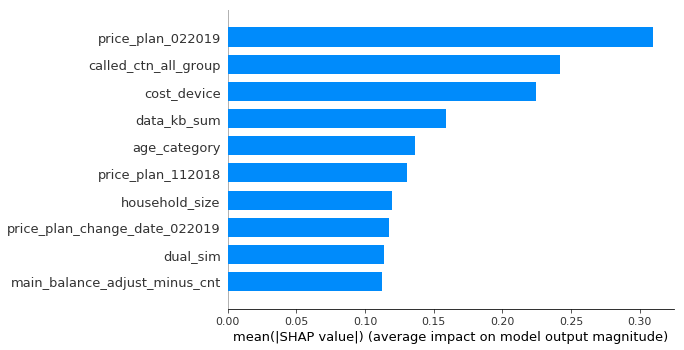

In [148]:
shap.summary_plot(shap_values, X, plot_type="bar",max_display=10)

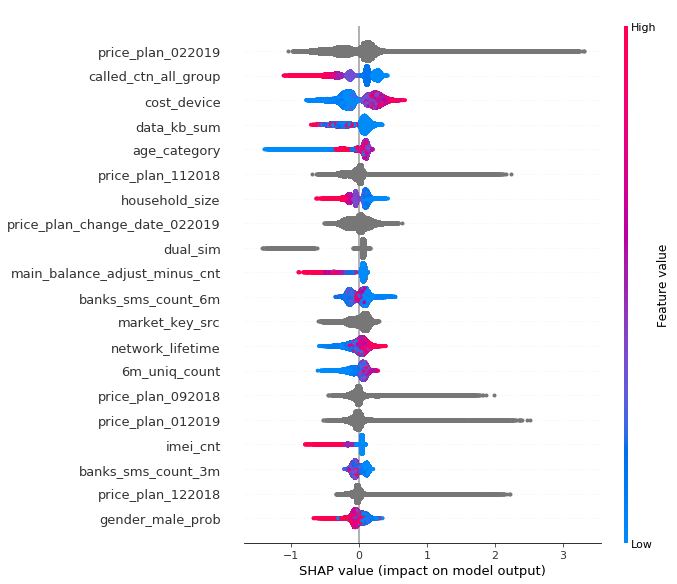

In [147]:
shap.summary_plot(shap_values, X)

In [150]:
X['price_plan_022019']= X['price_plan_022019'].astype('category').cat.codes
X['price_plan_112018']= X['price_plan_112018'].astype('category').cat.codes
X['price_plan_092018']= X['price_plan_092018'].astype('category').cat.codes
X['dual_sim']= X['dual_sim'].astype('category').cat.codes
X['price_plan_122018']= X['price_plan_122018'].astype('category').cat.codes
X['price_plan_102018']= X['price_plan_102018'].astype('category').cat.codes
X['price_plan_012019']= X['price_plan_012019'].astype('category').cat.codes
X['price_plan_change_date_022019']= X['price_plan_change_date_022019'].astype('category').cat.codes
X['market_key_src']= X['market_key_src'].astype('category').cat.codes
X['price_plan_032019']= X['price_plan_032019'].astype('category').cat.codes
X['price_plan_change_date_032019']= X['price_plan_change_date_032019'].astype('category').cat.codes
X['price_plan_change_date_012019']= X['price_plan_change_date_012019'].astype('category').cat.codes

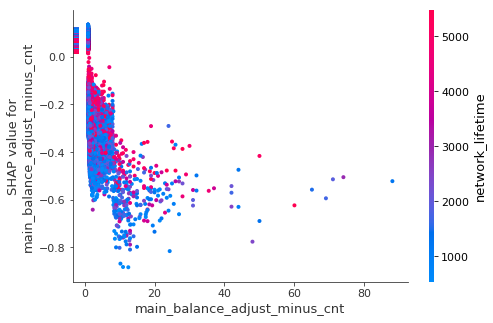

In [151]:
shap.dependence_plot('main_balance_adjust_minus_cnt', shap_values, X)

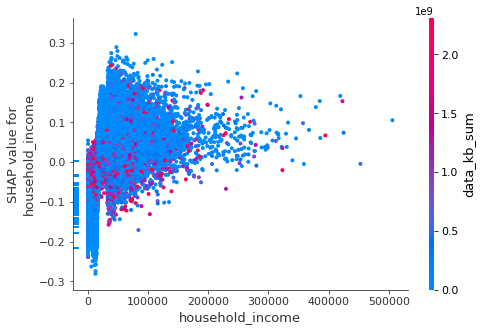

In [153]:

shap.dependence_plot('household_income', shap_values, X)

## Parameters tuning 

Оптимизируем гиперпараметры на кросс валидации. 

Тюним параметры в 2 этапа: сначала выбираем оптимальные основные параметры: depth и iterations, 
затем фиксируем их и оптимизируем остальные (learning rate и l2_leaf_reg)

In [97]:
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import cross_val_score
skf = StratifiedKFold(n_splits=4, shuffle = True, random_state = 15)

In [ ]:
X = data[feat]
Y = data['target2_ind']

x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(X, Y, test_size = 0.2, random_state=42)
cat_features=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]

In [128]:
grid_search_res = pd.DataFrame(columns = ['depth', 'iterations', 'score_mean', 'score_std'])

for d in [5,6]:
    for i in np.arange(200, 500, 50):
        cb_model = CatBoostClassifier(depth = d, learning_rate = 0.4, l2_leaf_reg = 100, iterations = i, eval_metric = 'AUC',
                                  od_pval = 0.01, cat_features = cat_features)
        cv_scores = cross_val_score(cb_model, x_train_all, y_train_all, cv = skf, scoring = 'roc_auc')
        cv_score_mean = cv_scores.mean()
        cv_score_std = cv_scores.std()
        grid_search_res = grid_search_res.append({'depth': d, 'iterations': i, 'score_mean': cv_score_mean, 
                                                  'score_std': cv_score_std}, ignore_index=True)
        print('depth = %f, iterations = %f, CV mean = %f, CV std = %f' % (d, i, cv_score_mean, cv_score_std))

0:	total: 142ms	remaining: 28.3s
1:	total: 269ms	remaining: 26.6s
2:	total: 377ms	remaining: 24.7s
3:	total: 494ms	remaining: 24.2s
4:	total: 610ms	remaining: 23.8s
5:	total: 724ms	remaining: 23.4s
6:	total: 849ms	remaining: 23.4s
7:	total: 967ms	remaining: 23.2s
8:	total: 1.08s	remaining: 22.9s
9:	total: 1.19s	remaining: 22.5s
10:	total: 1.31s	remaining: 22.5s
11:	total: 1.43s	remaining: 22.4s
12:	total: 1.54s	remaining: 22.2s
13:	total: 1.66s	remaining: 22s
14:	total: 1.78s	remaining: 21.9s
15:	total: 1.89s	remaining: 21.8s
16:	total: 2s	remaining: 21.5s
17:	total: 2.1s	remaining: 21.3s
18:	total: 2.22s	remaining: 21.1s
19:	total: 2.32s	remaining: 20.9s
20:	total: 2.44s	remaining: 20.8s
21:	total: 2.55s	remaining: 20.6s
22:	total: 2.68s	remaining: 20.6s
23:	total: 2.8s	remaining: 20.5s
24:	total: 2.91s	remaining: 20.4s
25:	total: 3.02s	remaining: 20.2s
26:	total: 3.14s	remaining: 20.1s
27:	total: 3.27s	remaining: 20.1s
28:	total: 3.38s	remaining: 19.9s
29:	total: 3.5s	remaining: 19.8

42:	total: 4.85s	remaining: 17.7s
43:	total: 4.96s	remaining: 17.6s
44:	total: 5.08s	remaining: 17.5s
45:	total: 5.18s	remaining: 17.3s
46:	total: 5.29s	remaining: 17.2s
47:	total: 5.41s	remaining: 17.1s
48:	total: 5.52s	remaining: 17s
49:	total: 5.65s	remaining: 17s
50:	total: 5.76s	remaining: 16.8s
51:	total: 5.87s	remaining: 16.7s
52:	total: 5.97s	remaining: 16.6s
53:	total: 6.07s	remaining: 16.4s
54:	total: 6.19s	remaining: 16.3s
55:	total: 6.32s	remaining: 16.2s
56:	total: 6.44s	remaining: 16.2s
57:	total: 6.55s	remaining: 16s
58:	total: 6.67s	remaining: 15.9s
59:	total: 6.77s	remaining: 15.8s
60:	total: 6.88s	remaining: 15.7s
61:	total: 7s	remaining: 15.6s
62:	total: 7.1s	remaining: 15.4s
63:	total: 7.22s	remaining: 15.3s
64:	total: 7.33s	remaining: 15.2s
65:	total: 7.42s	remaining: 15.1s
66:	total: 7.53s	remaining: 15s
67:	total: 7.65s	remaining: 14.9s
68:	total: 7.76s	remaining: 14.7s
69:	total: 7.86s	remaining: 14.6s
70:	total: 7.97s	remaining: 14.5s
71:	total: 8.08s	remaining

82:	total: 9.55s	remaining: 19.2s
83:	total: 9.65s	remaining: 19.1s
84:	total: 9.78s	remaining: 19s
85:	total: 9.89s	remaining: 18.9s
86:	total: 10s	remaining: 18.7s
87:	total: 10.1s	remaining: 18.6s
88:	total: 10.2s	remaining: 18.5s
89:	total: 10.3s	remaining: 18.4s
90:	total: 10.4s	remaining: 18.2s
91:	total: 10.6s	remaining: 18.1s
92:	total: 10.7s	remaining: 18s
93:	total: 10.8s	remaining: 17.9s
94:	total: 10.9s	remaining: 17.8s
95:	total: 11s	remaining: 17.7s
96:	total: 11.1s	remaining: 17.6s
97:	total: 11.3s	remaining: 17.5s
98:	total: 11.4s	remaining: 17.3s
99:	total: 11.5s	remaining: 17.2s
100:	total: 11.6s	remaining: 17.1s
101:	total: 11.7s	remaining: 17s
102:	total: 11.8s	remaining: 16.9s
103:	total: 11.9s	remaining: 16.8s
104:	total: 12.1s	remaining: 16.6s
105:	total: 12.2s	remaining: 16.5s
106:	total: 12.3s	remaining: 16.4s
107:	total: 12.4s	remaining: 16.3s
108:	total: 12.5s	remaining: 16.2s
109:	total: 12.6s	remaining: 16.1s
110:	total: 12.7s	remaining: 16s
111:	total: 12.

72:	total: 8.38s	remaining: 20.3s
73:	total: 8.49s	remaining: 20.2s
74:	total: 8.6s	remaining: 20.1s
75:	total: 8.71s	remaining: 20s
76:	total: 8.84s	remaining: 19.9s
77:	total: 8.95s	remaining: 19.7s
78:	total: 9.07s	remaining: 19.6s
79:	total: 9.18s	remaining: 19.5s
80:	total: 9.31s	remaining: 19.4s
81:	total: 9.43s	remaining: 19.3s
82:	total: 9.54s	remaining: 19.2s
83:	total: 9.65s	remaining: 19.1s
84:	total: 9.78s	remaining: 19s
85:	total: 9.89s	remaining: 18.9s
86:	total: 10s	remaining: 18.7s
87:	total: 10.1s	remaining: 18.6s
88:	total: 10.2s	remaining: 18.5s
89:	total: 10.3s	remaining: 18.4s
90:	total: 10.5s	remaining: 18.3s
91:	total: 10.6s	remaining: 18.2s
92:	total: 10.7s	remaining: 18.1s
93:	total: 10.8s	remaining: 17.9s
94:	total: 10.9s	remaining: 17.8s
95:	total: 11s	remaining: 17.7s
96:	total: 11.1s	remaining: 17.6s
97:	total: 11.2s	remaining: 17.4s
98:	total: 11.4s	remaining: 17.3s
99:	total: 11.5s	remaining: 17.2s
100:	total: 11.6s	remaining: 17.1s
101:	total: 11.7s	rema

60:	total: 7.12s	remaining: 27.9s
61:	total: 7.24s	remaining: 27.8s
62:	total: 7.36s	remaining: 27.7s
63:	total: 7.48s	remaining: 27.6s
64:	total: 7.59s	remaining: 27.5s
65:	total: 7.71s	remaining: 27.3s
66:	total: 7.82s	remaining: 27.2s
67:	total: 7.94s	remaining: 27.1s
68:	total: 8.06s	remaining: 27s
69:	total: 8.18s	remaining: 26.9s
70:	total: 8.31s	remaining: 26.8s
71:	total: 8.43s	remaining: 26.7s
72:	total: 8.55s	remaining: 26.6s
73:	total: 8.67s	remaining: 26.5s
74:	total: 8.78s	remaining: 26.3s
75:	total: 8.9s	remaining: 26.2s
76:	total: 9.01s	remaining: 26.1s
77:	total: 9.12s	remaining: 25.9s
78:	total: 9.25s	remaining: 25.9s
79:	total: 9.36s	remaining: 25.7s
80:	total: 9.47s	remaining: 25.6s
81:	total: 9.61s	remaining: 25.5s
82:	total: 9.74s	remaining: 25.5s
83:	total: 9.85s	remaining: 25.3s
84:	total: 9.97s	remaining: 25.2s
85:	total: 10.1s	remaining: 25.1s
86:	total: 10.2s	remaining: 25s
87:	total: 10.3s	remaining: 24.9s
88:	total: 10.4s	remaining: 24.7s
89:	total: 10.5s	re

298:	total: 34.5s	remaining: 115ms
299:	total: 34.6s	remaining: 0us
0:	total: 127ms	remaining: 38s
1:	total: 257ms	remaining: 38.2s
2:	total: 363ms	remaining: 36s
3:	total: 491ms	remaining: 36.3s
4:	total: 610ms	remaining: 36s
5:	total: 729ms	remaining: 35.7s
6:	total: 851ms	remaining: 35.6s
7:	total: 970ms	remaining: 35.4s
8:	total: 1.08s	remaining: 35.1s
9:	total: 1.21s	remaining: 35.1s
10:	total: 1.34s	remaining: 35.2s
11:	total: 1.46s	remaining: 35s
12:	total: 1.57s	remaining: 34.7s
13:	total: 1.69s	remaining: 34.5s
14:	total: 1.8s	remaining: 34.2s
15:	total: 1.92s	remaining: 34.1s
16:	total: 2.05s	remaining: 34.1s
17:	total: 2.17s	remaining: 34s
18:	total: 2.29s	remaining: 33.8s
19:	total: 2.4s	remaining: 33.6s
20:	total: 2.51s	remaining: 33.4s
21:	total: 2.63s	remaining: 33.2s
22:	total: 2.76s	remaining: 33.2s
23:	total: 2.87s	remaining: 33.1s
24:	total: 3s	remaining: 33s
25:	total: 3.12s	remaining: 32.9s
26:	total: 3.23s	remaining: 32.7s
27:	total: 3.35s	remaining: 32.5s
28:	tot

240:	total: 27.8s	remaining: 6.8s
241:	total: 27.9s	remaining: 6.68s
242:	total: 28s	remaining: 6.57s
243:	total: 28.1s	remaining: 6.45s
244:	total: 28.2s	remaining: 6.34s
245:	total: 28.3s	remaining: 6.22s
246:	total: 28.5s	remaining: 6.11s
247:	total: 28.6s	remaining: 5.99s
248:	total: 28.7s	remaining: 5.87s
249:	total: 28.8s	remaining: 5.76s
250:	total: 28.9s	remaining: 5.64s
251:	total: 29s	remaining: 5.52s
252:	total: 29.1s	remaining: 5.41s
253:	total: 29.2s	remaining: 5.29s
254:	total: 29.3s	remaining: 5.18s
255:	total: 29.4s	remaining: 5.06s
256:	total: 29.6s	remaining: 4.95s
257:	total: 29.7s	remaining: 4.83s
258:	total: 29.8s	remaining: 4.71s
259:	total: 29.9s	remaining: 4.6s
260:	total: 30s	remaining: 4.48s
261:	total: 30.1s	remaining: 4.37s
262:	total: 30.2s	remaining: 4.25s
263:	total: 30.3s	remaining: 4.14s
264:	total: 30.5s	remaining: 4.02s
265:	total: 30.6s	remaining: 3.9s
266:	total: 30.7s	remaining: 3.79s
267:	total: 30.8s	remaining: 3.68s
268:	total: 30.9s	remaining: 

178:	total: 20.6s	remaining: 19.7s
179:	total: 20.7s	remaining: 19.5s
180:	total: 20.8s	remaining: 19.4s
181:	total: 20.9s	remaining: 19.3s
182:	total: 21s	remaining: 19.2s
183:	total: 21.1s	remaining: 19.1s
184:	total: 21.2s	remaining: 18.9s
185:	total: 21.4s	remaining: 18.8s
186:	total: 21.5s	remaining: 18.7s
187:	total: 21.6s	remaining: 18.6s
188:	total: 21.7s	remaining: 18.5s
189:	total: 21.8s	remaining: 18.3s
190:	total: 21.9s	remaining: 18.2s
191:	total: 22s	remaining: 18.1s
192:	total: 22.1s	remaining: 18s
193:	total: 22.2s	remaining: 17.9s
194:	total: 22.3s	remaining: 17.8s
195:	total: 22.4s	remaining: 17.6s
196:	total: 22.5s	remaining: 17.5s
197:	total: 22.7s	remaining: 17.4s
198:	total: 22.8s	remaining: 17.3s
199:	total: 22.9s	remaining: 17.2s
200:	total: 23s	remaining: 17s
201:	total: 23.1s	remaining: 16.9s
202:	total: 23.2s	remaining: 16.8s
203:	total: 23.3s	remaining: 16.7s
204:	total: 23.4s	remaining: 16.6s
205:	total: 23.5s	remaining: 16.4s
206:	total: 23.6s	remaining: 1

68:	total: 7.94s	remaining: 32.3s
69:	total: 8.05s	remaining: 32.2s
70:	total: 8.16s	remaining: 32.1s
71:	total: 8.27s	remaining: 31.9s
72:	total: 8.39s	remaining: 31.8s
73:	total: 8.49s	remaining: 31.7s
74:	total: 8.6s	remaining: 31.5s
75:	total: 8.71s	remaining: 31.4s
76:	total: 8.82s	remaining: 31.3s
77:	total: 8.93s	remaining: 31.2s
78:	total: 9.05s	remaining: 31s
79:	total: 9.16s	remaining: 30.9s
80:	total: 9.27s	remaining: 30.8s
81:	total: 9.4s	remaining: 30.7s
82:	total: 9.51s	remaining: 30.6s
83:	total: 9.63s	remaining: 30.5s
84:	total: 9.76s	remaining: 30.4s
85:	total: 9.87s	remaining: 30.3s
86:	total: 9.98s	remaining: 30.2s
87:	total: 10.1s	remaining: 30s
88:	total: 10.2s	remaining: 29.9s
89:	total: 10.3s	remaining: 29.8s
90:	total: 10.4s	remaining: 29.7s
91:	total: 10.5s	remaining: 29.6s
92:	total: 10.7s	remaining: 29.5s
93:	total: 10.8s	remaining: 29.3s
94:	total: 10.9s	remaining: 29.2s
95:	total: 11s	remaining: 29.1s
96:	total: 11.1s	remaining: 29s
97:	total: 11.2s	remaini

306:	total: 34.7s	remaining: 4.87s
307:	total: 34.9s	remaining: 4.75s
308:	total: 35s	remaining: 4.64s
309:	total: 35.1s	remaining: 4.53s
310:	total: 35.2s	remaining: 4.41s
311:	total: 35.3s	remaining: 4.3s
312:	total: 35.4s	remaining: 4.19s
313:	total: 35.5s	remaining: 4.07s
314:	total: 35.6s	remaining: 3.96s
315:	total: 35.8s	remaining: 3.85s
316:	total: 35.9s	remaining: 3.73s
317:	total: 36s	remaining: 3.62s
318:	total: 36.1s	remaining: 3.51s
319:	total: 36.2s	remaining: 3.39s
320:	total: 36.3s	remaining: 3.28s
321:	total: 36.4s	remaining: 3.17s
322:	total: 36.5s	remaining: 3.05s
323:	total: 36.7s	remaining: 2.94s
324:	total: 36.8s	remaining: 2.83s
325:	total: 36.9s	remaining: 2.71s
326:	total: 37s	remaining: 2.6s
327:	total: 37.1s	remaining: 2.49s
328:	total: 37.2s	remaining: 2.38s
329:	total: 37.3s	remaining: 2.26s
330:	total: 37.4s	remaining: 2.15s
331:	total: 37.5s	remaining: 2.03s
332:	total: 37.6s	remaining: 1.92s
333:	total: 37.7s	remaining: 1.81s
334:	total: 37.9s	remaining:

194:	total: 22.5s	remaining: 23.7s
195:	total: 22.6s	remaining: 23.5s
196:	total: 22.7s	remaining: 23.4s
197:	total: 22.8s	remaining: 23.3s
198:	total: 23s	remaining: 23.2s
199:	total: 23.1s	remaining: 23.1s
200:	total: 23.2s	remaining: 22.9s
201:	total: 23.3s	remaining: 22.8s
202:	total: 23.4s	remaining: 22.7s
203:	total: 23.5s	remaining: 22.6s
204:	total: 23.6s	remaining: 22.5s
205:	total: 23.7s	remaining: 22.3s
206:	total: 23.8s	remaining: 22.2s
207:	total: 24s	remaining: 22.1s
208:	total: 24.1s	remaining: 22s
209:	total: 24.2s	remaining: 21.9s
210:	total: 24.3s	remaining: 21.8s
211:	total: 24.4s	remaining: 21.6s
212:	total: 24.5s	remaining: 21.5s
213:	total: 24.7s	remaining: 21.4s
214:	total: 24.8s	remaining: 21.3s
215:	total: 24.9s	remaining: 21.2s
216:	total: 25s	remaining: 21.1s
217:	total: 25.1s	remaining: 21s
218:	total: 25.2s	remaining: 20.9s
219:	total: 25.3s	remaining: 20.7s
220:	total: 25.5s	remaining: 20.6s
221:	total: 25.6s	remaining: 20.5s
222:	total: 25.7s	remaining: 2

32:	total: 3.84s	remaining: 42.7s
33:	total: 3.97s	remaining: 42.7s
34:	total: 4.1s	remaining: 42.8s
35:	total: 4.21s	remaining: 42.6s
36:	total: 4.32s	remaining: 42.4s
37:	total: 4.45s	remaining: 42.4s
38:	total: 4.56s	remaining: 42.3s
39:	total: 4.67s	remaining: 42s
40:	total: 4.8s	remaining: 42s
41:	total: 4.91s	remaining: 41.8s
42:	total: 5.01s	remaining: 41.6s
43:	total: 5.12s	remaining: 41.4s
44:	total: 5.25s	remaining: 41.5s
45:	total: 5.36s	remaining: 41.2s
46:	total: 5.47s	remaining: 41.1s
47:	total: 5.59s	remaining: 41s
48:	total: 5.7s	remaining: 40.8s
49:	total: 5.83s	remaining: 40.8s
50:	total: 5.94s	remaining: 40.7s
51:	total: 6.06s	remaining: 40.6s
52:	total: 6.16s	remaining: 40.3s
53:	total: 6.27s	remaining: 40.2s
54:	total: 6.39s	remaining: 40.1s
55:	total: 6.52s	remaining: 40.1s
56:	total: 6.65s	remaining: 40s
57:	total: 6.75s	remaining: 39.8s
58:	total: 6.87s	remaining: 39.7s
59:	total: 6.99s	remaining: 39.6s
60:	total: 7.1s	remaining: 39.5s
61:	total: 7.22s	remaining

272:	total: 30.9s	remaining: 14.4s
273:	total: 31s	remaining: 14.3s
274:	total: 31.1s	remaining: 14.1s
275:	total: 31.2s	remaining: 14s
276:	total: 31.3s	remaining: 13.9s
277:	total: 31.4s	remaining: 13.8s
278:	total: 31.5s	remaining: 13.7s
279:	total: 31.6s	remaining: 13.6s
280:	total: 31.8s	remaining: 13.5s
281:	total: 31.9s	remaining: 13.3s
282:	total: 32s	remaining: 13.2s
283:	total: 32.1s	remaining: 13.1s
284:	total: 32.2s	remaining: 13s
285:	total: 32.3s	remaining: 12.9s
286:	total: 32.4s	remaining: 12.8s
287:	total: 32.5s	remaining: 12.7s
288:	total: 32.7s	remaining: 12.5s
289:	total: 32.8s	remaining: 12.4s
290:	total: 32.9s	remaining: 12.3s
291:	total: 33s	remaining: 12.2s
292:	total: 33.1s	remaining: 12.1s
293:	total: 33.2s	remaining: 12s
294:	total: 33.3s	remaining: 11.9s
295:	total: 33.4s	remaining: 11.7s
296:	total: 33.6s	remaining: 11.6s
297:	total: 33.7s	remaining: 11.5s
298:	total: 33.8s	remaining: 11.4s
299:	total: 33.9s	remaining: 11.3s
300:	total: 34s	remaining: 11.2s

110:	total: 12.8s	remaining: 39.1s
111:	total: 12.9s	remaining: 39s
112:	total: 13s	remaining: 38.9s
113:	total: 13.2s	remaining: 38.8s
114:	total: 13.3s	remaining: 38.7s
115:	total: 13.4s	remaining: 38.5s
116:	total: 13.5s	remaining: 38.4s
117:	total: 13.6s	remaining: 38.3s
118:	total: 13.7s	remaining: 38.1s
119:	total: 13.8s	remaining: 38.1s
120:	total: 13.9s	remaining: 37.9s
121:	total: 14.1s	remaining: 37.8s
122:	total: 14.2s	remaining: 37.7s
123:	total: 14.3s	remaining: 37.6s
124:	total: 14.4s	remaining: 37.4s
125:	total: 14.5s	remaining: 37.3s
126:	total: 14.6s	remaining: 37.2s
127:	total: 14.7s	remaining: 37.1s
128:	total: 14.9s	remaining: 37s
129:	total: 15s	remaining: 36.9s
130:	total: 15.1s	remaining: 36.7s
131:	total: 15.2s	remaining: 36.6s
132:	total: 15.3s	remaining: 36.5s
133:	total: 15.4s	remaining: 36.3s
134:	total: 15.5s	remaining: 36.2s
135:	total: 15.6s	remaining: 36.1s
136:	total: 15.7s	remaining: 36s
137:	total: 15.9s	remaining: 35.8s
138:	total: 16s	remaining: 35.

347:	total: 39.4s	remaining: 11.6s
348:	total: 39.6s	remaining: 11.5s
349:	total: 39.7s	remaining: 11.3s
350:	total: 39.8s	remaining: 11.2s
351:	total: 39.9s	remaining: 11.1s
352:	total: 40s	remaining: 11s
353:	total: 40.1s	remaining: 10.9s
354:	total: 40.2s	remaining: 10.8s
355:	total: 40.3s	remaining: 10.7s
356:	total: 40.5s	remaining: 10.5s
357:	total: 40.6s	remaining: 10.4s
358:	total: 40.7s	remaining: 10.3s
359:	total: 40.8s	remaining: 10.2s
360:	total: 40.9s	remaining: 10.1s
361:	total: 41s	remaining: 9.97s
362:	total: 41.1s	remaining: 9.86s
363:	total: 41.2s	remaining: 9.74s
364:	total: 41.4s	remaining: 9.63s
365:	total: 41.5s	remaining: 9.52s
366:	total: 41.6s	remaining: 9.4s
367:	total: 41.7s	remaining: 9.29s
368:	total: 41.8s	remaining: 9.18s
369:	total: 41.9s	remaining: 9.07s
370:	total: 42.1s	remaining: 8.96s
371:	total: 42.2s	remaining: 8.84s
372:	total: 42.3s	remaining: 8.73s
373:	total: 42.4s	remaining: 8.62s
374:	total: 42.5s	remaining: 8.5s
375:	total: 42.6s	remaining:

138:	total: 15.9s	remaining: 35.6s
139:	total: 16s	remaining: 35.5s
140:	total: 16.1s	remaining: 35.4s
141:	total: 16.3s	remaining: 35.3s
142:	total: 16.4s	remaining: 35.2s
143:	total: 16.5s	remaining: 35.1s
144:	total: 16.6s	remaining: 35s
145:	total: 16.7s	remaining: 34.9s
146:	total: 16.9s	remaining: 34.7s
147:	total: 17s	remaining: 34.6s
148:	total: 17.1s	remaining: 34.5s
149:	total: 17.2s	remaining: 34.4s
150:	total: 17.3s	remaining: 34.3s
151:	total: 17.4s	remaining: 34.1s
152:	total: 17.5s	remaining: 34s
153:	total: 17.6s	remaining: 33.9s
154:	total: 17.8s	remaining: 33.8s
155:	total: 17.9s	remaining: 33.7s
156:	total: 18s	remaining: 33.6s
157:	total: 18.1s	remaining: 33.5s
158:	total: 18.2s	remaining: 33.4s
159:	total: 18.3s	remaining: 33.2s
160:	total: 18.4s	remaining: 33.1s
161:	total: 18.6s	remaining: 33s
162:	total: 18.7s	remaining: 32.9s
163:	total: 18.8s	remaining: 32.7s
164:	total: 18.9s	remaining: 32.6s
165:	total: 19s	remaining: 32.5s
166:	total: 19.1s	remaining: 32.4s

376:	total: 42.8s	remaining: 8.3s
377:	total: 43s	remaining: 8.18s
378:	total: 43.1s	remaining: 8.07s
379:	total: 43.2s	remaining: 7.95s
380:	total: 43.3s	remaining: 7.84s
381:	total: 43.4s	remaining: 7.73s
382:	total: 43.5s	remaining: 7.62s
383:	total: 43.6s	remaining: 7.5s
384:	total: 43.8s	remaining: 7.39s
385:	total: 43.9s	remaining: 7.28s
386:	total: 44s	remaining: 7.16s
387:	total: 44.1s	remaining: 7.05s
388:	total: 44.2s	remaining: 6.93s
389:	total: 44.3s	remaining: 6.82s
390:	total: 44.4s	remaining: 6.71s
391:	total: 44.5s	remaining: 6.59s
392:	total: 44.7s	remaining: 6.48s
393:	total: 44.8s	remaining: 6.36s
394:	total: 44.9s	remaining: 6.25s
395:	total: 45s	remaining: 6.14s
396:	total: 45.1s	remaining: 6.02s
397:	total: 45.2s	remaining: 5.91s
398:	total: 45.3s	remaining: 5.79s
399:	total: 45.4s	remaining: 5.68s
400:	total: 45.6s	remaining: 5.57s
401:	total: 45.7s	remaining: 5.45s
402:	total: 45.8s	remaining: 5.34s
403:	total: 45.9s	remaining: 5.22s
404:	total: 46s	remaining: 5

164:	total: 23.5s	remaining: 4.97s
165:	total: 23.6s	remaining: 4.83s
166:	total: 23.7s	remaining: 4.69s
167:	total: 23.9s	remaining: 4.55s
168:	total: 24s	remaining: 4.41s
169:	total: 24.2s	remaining: 4.26s
170:	total: 24.3s	remaining: 4.12s
171:	total: 24.5s	remaining: 3.98s
172:	total: 24.6s	remaining: 3.84s
173:	total: 24.7s	remaining: 3.69s
174:	total: 24.9s	remaining: 3.55s
175:	total: 25s	remaining: 3.41s
176:	total: 25.1s	remaining: 3.26s
177:	total: 25.3s	remaining: 3.12s
178:	total: 25.4s	remaining: 2.98s
179:	total: 25.5s	remaining: 2.84s
180:	total: 25.7s	remaining: 2.7s
181:	total: 25.8s	remaining: 2.55s
182:	total: 26s	remaining: 2.41s
183:	total: 26.1s	remaining: 2.27s
184:	total: 26.3s	remaining: 2.13s
185:	total: 26.4s	remaining: 1.99s
186:	total: 26.5s	remaining: 1.84s
187:	total: 26.7s	remaining: 1.7s
188:	total: 26.8s	remaining: 1.56s
189:	total: 26.9s	remaining: 1.42s
190:	total: 27.1s	remaining: 1.27s
191:	total: 27.2s	remaining: 1.13s
192:	total: 27.4s	remaining:

2:	total: 426ms	remaining: 35.1s
3:	total: 577ms	remaining: 35.5s
4:	total: 716ms	remaining: 35.1s
5:	total: 863ms	remaining: 35.1s
6:	total: 1.01s	remaining: 35.1s
7:	total: 1.15s	remaining: 34.8s
8:	total: 1.29s	remaining: 34.6s
9:	total: 1.43s	remaining: 34.4s
10:	total: 1.57s	remaining: 34.2s
11:	total: 1.72s	remaining: 34s
12:	total: 1.87s	remaining: 34.1s
13:	total: 2s	remaining: 33.8s
14:	total: 2.15s	remaining: 33.7s
15:	total: 2.28s	remaining: 33.4s
16:	total: 2.44s	remaining: 33.4s
17:	total: 2.58s	remaining: 33.2s
18:	total: 2.72s	remaining: 33.1s
19:	total: 2.85s	remaining: 32.8s
20:	total: 2.99s	remaining: 32.6s
21:	total: 3.13s	remaining: 32.5s
22:	total: 3.26s	remaining: 32.2s
23:	total: 3.39s	remaining: 31.9s
24:	total: 3.52s	remaining: 31.7s
25:	total: 3.68s	remaining: 31.7s
26:	total: 3.82s	remaining: 31.6s
27:	total: 3.97s	remaining: 31.5s
28:	total: 4.11s	remaining: 31.3s
29:	total: 4.25s	remaining: 31.2s
30:	total: 4.41s	remaining: 31.2s
31:	total: 4.57s	remaining:

242:	total: 34.1s	remaining: 983ms
243:	total: 34.3s	remaining: 842ms
244:	total: 34.4s	remaining: 702ms
245:	total: 34.5s	remaining: 561ms
246:	total: 34.7s	remaining: 421ms
247:	total: 34.8s	remaining: 281ms
248:	total: 34.9s	remaining: 140ms
249:	total: 35.1s	remaining: 0us
0:	total: 151ms	remaining: 37.6s
1:	total: 285ms	remaining: 35.4s
2:	total: 417ms	remaining: 34.4s
3:	total: 560ms	remaining: 34.5s
4:	total: 701ms	remaining: 34.3s
5:	total: 858ms	remaining: 34.9s
6:	total: 1.01s	remaining: 35.1s
7:	total: 1.15s	remaining: 34.8s
8:	total: 1.29s	remaining: 34.7s
9:	total: 1.43s	remaining: 34.4s
10:	total: 1.57s	remaining: 34.2s
11:	total: 1.72s	remaining: 34s
12:	total: 1.85s	remaining: 33.8s
13:	total: 2s	remaining: 33.7s
14:	total: 2.16s	remaining: 33.8s
15:	total: 2.31s	remaining: 33.8s
16:	total: 2.45s	remaining: 33.5s
17:	total: 2.61s	remaining: 33.7s
18:	total: 2.76s	remaining: 33.5s
19:	total: 2.91s	remaining: 33.5s
20:	total: 3.06s	remaining: 33.3s
21:	total: 3.2s	remaini

232:	total: 32.7s	remaining: 2.38s
233:	total: 32.8s	remaining: 2.24s
234:	total: 33s	remaining: 2.1s
235:	total: 33.1s	remaining: 1.96s
236:	total: 33.2s	remaining: 1.82s
237:	total: 33.4s	remaining: 1.68s
238:	total: 33.5s	remaining: 1.54s
239:	total: 33.6s	remaining: 1.4s
240:	total: 33.8s	remaining: 1.26s
241:	total: 33.9s	remaining: 1.12s
242:	total: 34.1s	remaining: 981ms
243:	total: 34.2s	remaining: 841ms
244:	total: 34.3s	remaining: 701ms
245:	total: 34.5s	remaining: 561ms
246:	total: 34.6s	remaining: 420ms
247:	total: 34.8s	remaining: 280ms
248:	total: 34.9s	remaining: 140ms
249:	total: 35s	remaining: 0us
depth = 6.000000, iterations = 250.000000, CV mean = 0.794922, CV std = 0.001582
0:	total: 177ms	remaining: 53s
1:	total: 311ms	remaining: 46.4s
2:	total: 448ms	remaining: 44.3s
3:	total: 597ms	remaining: 44.2s
4:	total: 735ms	remaining: 43.4s
5:	total: 881ms	remaining: 43.2s
6:	total: 1.03s	remaining: 43.1s
7:	total: 1.17s	remaining: 42.6s
8:	total: 1.31s	remaining: 42.4s
9:

220:	total: 30.7s	remaining: 11s
221:	total: 30.8s	remaining: 10.8s
222:	total: 31s	remaining: 10.7s
223:	total: 31.1s	remaining: 10.6s
224:	total: 31.3s	remaining: 10.4s
225:	total: 31.4s	remaining: 10.3s
226:	total: 31.5s	remaining: 10.1s
227:	total: 31.7s	remaining: 10s
228:	total: 31.8s	remaining: 9.86s
229:	total: 32s	remaining: 9.73s
230:	total: 32.1s	remaining: 9.59s
231:	total: 32.2s	remaining: 9.45s
232:	total: 32.4s	remaining: 9.31s
233:	total: 32.5s	remaining: 9.17s
234:	total: 32.6s	remaining: 9.03s
235:	total: 32.8s	remaining: 8.89s
236:	total: 32.9s	remaining: 8.75s
237:	total: 33.1s	remaining: 8.61s
238:	total: 33.2s	remaining: 8.48s
239:	total: 33.3s	remaining: 8.34s
240:	total: 33.5s	remaining: 8.2s
241:	total: 33.6s	remaining: 8.06s
242:	total: 33.8s	remaining: 7.92s
243:	total: 33.9s	remaining: 7.78s
244:	total: 34s	remaining: 7.64s
245:	total: 34.2s	remaining: 7.5s
246:	total: 34.3s	remaining: 7.36s
247:	total: 34.4s	remaining: 7.22s
248:	total: 34.6s	remaining: 7.0

160:	total: 22.7s	remaining: 19.6s
161:	total: 22.8s	remaining: 19.5s
162:	total: 23s	remaining: 19.3s
163:	total: 23.1s	remaining: 19.2s
164:	total: 23.3s	remaining: 19s
165:	total: 23.4s	remaining: 18.9s
166:	total: 23.5s	remaining: 18.7s
167:	total: 23.7s	remaining: 18.6s
168:	total: 23.8s	remaining: 18.5s
169:	total: 23.9s	remaining: 18.3s
170:	total: 24.1s	remaining: 18.2s
171:	total: 24.2s	remaining: 18s
172:	total: 24.4s	remaining: 17.9s
173:	total: 24.5s	remaining: 17.7s
174:	total: 24.6s	remaining: 17.6s
175:	total: 24.8s	remaining: 17.5s
176:	total: 24.9s	remaining: 17.3s
177:	total: 25.1s	remaining: 17.2s
178:	total: 25.2s	remaining: 17s
179:	total: 25.3s	remaining: 16.9s
180:	total: 25.5s	remaining: 16.8s
181:	total: 25.6s	remaining: 16.6s
182:	total: 25.8s	remaining: 16.5s
183:	total: 25.9s	remaining: 16.3s
184:	total: 26s	remaining: 16.2s
185:	total: 26.2s	remaining: 16.1s
186:	total: 26.3s	remaining: 15.9s
187:	total: 26.5s	remaining: 15.8s
188:	total: 26.6s	remaining: 1

98:	total: 14s	remaining: 35.6s
99:	total: 14.2s	remaining: 35.5s
100:	total: 14.3s	remaining: 35.3s
101:	total: 14.5s	remaining: 35.2s
102:	total: 14.6s	remaining: 35s
103:	total: 14.8s	remaining: 34.9s
104:	total: 14.9s	remaining: 34.8s
105:	total: 15s	remaining: 34.6s
106:	total: 15.2s	remaining: 34.5s
107:	total: 15.3s	remaining: 34.3s
108:	total: 15.5s	remaining: 34.2s
109:	total: 15.6s	remaining: 34s
110:	total: 15.8s	remaining: 33.9s
111:	total: 15.9s	remaining: 33.8s
112:	total: 16s	remaining: 33.6s
113:	total: 16.2s	remaining: 33.4s
114:	total: 16.3s	remaining: 33.3s
115:	total: 16.4s	remaining: 33.1s
116:	total: 16.6s	remaining: 33s
117:	total: 16.7s	remaining: 32.8s
118:	total: 16.8s	remaining: 32.7s
119:	total: 17s	remaining: 32.5s
120:	total: 17.1s	remaining: 32.4s
121:	total: 17.3s	remaining: 32.3s
122:	total: 17.4s	remaining: 32.2s
123:	total: 17.6s	remaining: 32s
124:	total: 17.7s	remaining: 31.9s
125:	total: 17.9s	remaining: 31.8s
126:	total: 18s	remaining: 31.6s
127:	

336:	total: 47.2s	remaining: 1.82s
337:	total: 47.3s	remaining: 1.68s
338:	total: 47.5s	remaining: 1.54s
339:	total: 47.6s	remaining: 1.4s
340:	total: 47.7s	remaining: 1.26s
341:	total: 47.9s	remaining: 1.12s
342:	total: 48s	remaining: 980ms
343:	total: 48.1s	remaining: 840ms
344:	total: 48.3s	remaining: 700ms
345:	total: 48.4s	remaining: 560ms
346:	total: 48.5s	remaining: 420ms
347:	total: 48.7s	remaining: 280ms
348:	total: 48.8s	remaining: 140ms
349:	total: 49s	remaining: 0us
0:	total: 180ms	remaining: 1m 2s
1:	total: 320ms	remaining: 55.7s
2:	total: 450ms	remaining: 52s
3:	total: 591ms	remaining: 51.1s
4:	total: 728ms	remaining: 50.2s
5:	total: 882ms	remaining: 50.6s
6:	total: 1.03s	remaining: 50.6s
7:	total: 1.17s	remaining: 50s
8:	total: 1.31s	remaining: 49.7s
9:	total: 1.45s	remaining: 49.4s
10:	total: 1.59s	remaining: 48.9s
11:	total: 1.73s	remaining: 48.8s
12:	total: 1.87s	remaining: 48.6s
13:	total: 2.02s	remaining: 48.6s
14:	total: 2.19s	remaining: 48.9s
15:	total: 2.33s	rema

226:	total: 31.7s	remaining: 17.2s
227:	total: 31.8s	remaining: 17s
228:	total: 31.9s	remaining: 16.9s
229:	total: 32.1s	remaining: 16.7s
230:	total: 32.2s	remaining: 16.6s
231:	total: 32.4s	remaining: 16.5s
232:	total: 32.5s	remaining: 16.3s
233:	total: 32.7s	remaining: 16.2s
234:	total: 32.8s	remaining: 16s
235:	total: 32.9s	remaining: 15.9s
236:	total: 33.1s	remaining: 15.8s
237:	total: 33.2s	remaining: 15.6s
238:	total: 33.3s	remaining: 15.5s
239:	total: 33.5s	remaining: 15.3s
240:	total: 33.6s	remaining: 15.2s
241:	total: 33.8s	remaining: 15.1s
242:	total: 33.9s	remaining: 14.9s
243:	total: 34s	remaining: 14.8s
244:	total: 34.2s	remaining: 14.6s
245:	total: 34.3s	remaining: 14.5s
246:	total: 34.4s	remaining: 14.4s
247:	total: 34.6s	remaining: 14.2s
248:	total: 34.7s	remaining: 14.1s
249:	total: 34.9s	remaining: 13.9s
250:	total: 35s	remaining: 13.8s
251:	total: 35.1s	remaining: 13.7s
252:	total: 35.3s	remaining: 13.5s
253:	total: 35.4s	remaining: 13.4s
254:	total: 35.5s	remaining:

114:	total: 16.4s	remaining: 40.6s
115:	total: 16.5s	remaining: 40.4s
116:	total: 16.7s	remaining: 40.3s
117:	total: 16.8s	remaining: 40.1s
118:	total: 16.9s	remaining: 40s
119:	total: 17.1s	remaining: 39.8s
120:	total: 17.2s	remaining: 39.7s
121:	total: 17.4s	remaining: 39.6s
122:	total: 17.5s	remaining: 39.5s
123:	total: 17.7s	remaining: 39.4s
124:	total: 17.8s	remaining: 39.2s
125:	total: 18s	remaining: 39.1s
126:	total: 18.1s	remaining: 39s
127:	total: 18.3s	remaining: 38.9s
128:	total: 18.4s	remaining: 38.7s
129:	total: 18.6s	remaining: 38.6s
130:	total: 18.7s	remaining: 38.5s
131:	total: 18.9s	remaining: 38.3s
132:	total: 19s	remaining: 38.2s
133:	total: 19.2s	remaining: 38s
134:	total: 19.3s	remaining: 37.9s
135:	total: 19.5s	remaining: 37.8s
136:	total: 19.6s	remaining: 37.6s
137:	total: 19.7s	remaining: 37.5s
138:	total: 19.9s	remaining: 37.3s
139:	total: 20s	remaining: 37.2s
140:	total: 20.1s	remaining: 37s
141:	total: 20.3s	remaining: 36.9s
142:	total: 20.4s	remaining: 36.7s

352:	total: 49.6s	remaining: 6.6s
353:	total: 49.7s	remaining: 6.46s
354:	total: 49.8s	remaining: 6.32s
355:	total: 50s	remaining: 6.18s
356:	total: 50.1s	remaining: 6.04s
357:	total: 50.2s	remaining: 5.89s
358:	total: 50.4s	remaining: 5.75s
359:	total: 50.5s	remaining: 5.61s
360:	total: 50.6s	remaining: 5.47s
361:	total: 50.8s	remaining: 5.33s
362:	total: 50.9s	remaining: 5.19s
363:	total: 51.1s	remaining: 5.05s
364:	total: 51.2s	remaining: 4.91s
365:	total: 51.3s	remaining: 4.77s
366:	total: 51.5s	remaining: 4.63s
367:	total: 51.6s	remaining: 4.49s
368:	total: 51.8s	remaining: 4.35s
369:	total: 51.9s	remaining: 4.21s
370:	total: 52.1s	remaining: 4.07s
371:	total: 52.2s	remaining: 3.93s
372:	total: 52.3s	remaining: 3.79s
373:	total: 52.5s	remaining: 3.65s
374:	total: 52.6s	remaining: 3.51s
375:	total: 52.7s	remaining: 3.37s
376:	total: 52.9s	remaining: 3.23s
377:	total: 53s	remaining: 3.08s
378:	total: 53.2s	remaining: 2.94s
379:	total: 53.3s	remaining: 2.8s
380:	total: 53.4s	remainin

192:	total: 27s	remaining: 29s
193:	total: 27.1s	remaining: 28.8s
194:	total: 27.3s	remaining: 28.7s
195:	total: 27.4s	remaining: 28.5s
196:	total: 27.5s	remaining: 28.4s
197:	total: 27.7s	remaining: 28.2s
198:	total: 27.8s	remaining: 28.1s
199:	total: 27.9s	remaining: 27.9s
200:	total: 28.1s	remaining: 27.8s
201:	total: 28.2s	remaining: 27.7s
202:	total: 28.4s	remaining: 27.5s
203:	total: 28.5s	remaining: 27.4s
204:	total: 28.6s	remaining: 27.2s
205:	total: 28.8s	remaining: 27.1s
206:	total: 28.9s	remaining: 27s
207:	total: 29.1s	remaining: 26.8s
208:	total: 29.2s	remaining: 26.7s
209:	total: 29.3s	remaining: 26.5s
210:	total: 29.5s	remaining: 26.4s
211:	total: 29.6s	remaining: 26.3s
212:	total: 29.8s	remaining: 26.1s
213:	total: 29.9s	remaining: 26s
214:	total: 30s	remaining: 25.8s
215:	total: 30.2s	remaining: 25.7s
216:	total: 30.3s	remaining: 25.5s
217:	total: 30.4s	remaining: 25.4s
218:	total: 30.6s	remaining: 25.3s
219:	total: 30.7s	remaining: 25.1s
220:	total: 30.8s	remaining: 2

28:	total: 4.19s	remaining: 1m
29:	total: 4.33s	remaining: 1m
30:	total: 4.49s	remaining: 1m
31:	total: 4.65s	remaining: 1m
32:	total: 4.79s	remaining: 1m
33:	total: 4.91s	remaining: 1m
34:	total: 5.05s	remaining: 59.8s
35:	total: 5.18s	remaining: 59.6s
36:	total: 5.32s	remaining: 59.4s
37:	total: 5.45s	remaining: 59.1s
38:	total: 5.59s	remaining: 58.9s
39:	total: 5.72s	remaining: 58.7s
40:	total: 5.86s	remaining: 58.5s
41:	total: 6s	remaining: 58.3s
42:	total: 6.16s	remaining: 58.3s
43:	total: 6.3s	remaining: 58.1s
44:	total: 6.44s	remaining: 58s
45:	total: 6.58s	remaining: 57.8s
46:	total: 6.73s	remaining: 57.7s
47:	total: 6.88s	remaining: 57.6s
48:	total: 7.04s	remaining: 57.6s
49:	total: 7.2s	remaining: 57.6s
50:	total: 7.34s	remaining: 57.5s
51:	total: 7.49s	remaining: 57.3s
52:	total: 7.63s	remaining: 57.2s
53:	total: 7.77s	remaining: 57s
54:	total: 7.91s	remaining: 56.8s
55:	total: 8.05s	remaining: 56.7s
56:	total: 8.18s	remaining: 56.4s
57:	total: 8.32s	remaining: 56.2s
58:	tot

268:	total: 37.5s	remaining: 25.2s
269:	total: 37.6s	remaining: 25.1s
270:	total: 37.8s	remaining: 25s
271:	total: 37.9s	remaining: 24.8s
272:	total: 38.1s	remaining: 24.7s
273:	total: 38.2s	remaining: 24.5s
274:	total: 38.3s	remaining: 24.4s
275:	total: 38.5s	remaining: 24.3s
276:	total: 38.6s	remaining: 24.1s
277:	total: 38.8s	remaining: 24s
278:	total: 38.9s	remaining: 23.8s
279:	total: 39.1s	remaining: 23.7s
280:	total: 39.2s	remaining: 23.6s
281:	total: 39.3s	remaining: 23.4s
282:	total: 39.5s	remaining: 23.3s
283:	total: 39.6s	remaining: 23.2s
284:	total: 39.7s	remaining: 23s
285:	total: 39.9s	remaining: 22.9s
286:	total: 40s	remaining: 22.7s
287:	total: 40.2s	remaining: 22.6s
288:	total: 40.3s	remaining: 22.4s
289:	total: 40.4s	remaining: 22.3s
290:	total: 40.6s	remaining: 22.2s
291:	total: 40.7s	remaining: 22s
292:	total: 40.8s	remaining: 21.9s
293:	total: 40.9s	remaining: 21.7s
294:	total: 41.1s	remaining: 21.6s
295:	total: 41.2s	remaining: 21.4s
296:	total: 41.4s	remaining: 2

58:	total: 8.56s	remaining: 56.7s
59:	total: 8.73s	remaining: 56.7s
60:	total: 8.87s	remaining: 56.6s
61:	total: 9.02s	remaining: 56.5s
62:	total: 9.18s	remaining: 56.4s
63:	total: 9.32s	remaining: 56.2s
64:	total: 9.45s	remaining: 56s
65:	total: 9.61s	remaining: 55.9s
66:	total: 9.77s	remaining: 55.8s
67:	total: 9.91s	remaining: 55.7s
68:	total: 10s	remaining: 55.5s
69:	total: 10.2s	remaining: 55.2s
70:	total: 10.3s	remaining: 55.1s
71:	total: 10.4s	remaining: 54.8s
72:	total: 10.6s	remaining: 54.7s
73:	total: 10.7s	remaining: 54.5s
74:	total: 10.9s	remaining: 54.3s
75:	total: 11s	remaining: 54.2s
76:	total: 11.2s	remaining: 54.1s
77:	total: 11.3s	remaining: 53.9s
78:	total: 11.4s	remaining: 53.7s
79:	total: 11.6s	remaining: 53.6s
80:	total: 11.7s	remaining: 53.4s
81:	total: 11.9s	remaining: 53.2s
82:	total: 12s	remaining: 53s
83:	total: 12.1s	remaining: 52.9s
84:	total: 12.3s	remaining: 52.7s
85:	total: 12.4s	remaining: 52.6s
86:	total: 12.6s	remaining: 52.4s
87:	total: 12.7s	remaini

296:	total: 41.8s	remaining: 21.5s
297:	total: 41.9s	remaining: 21.4s
298:	total: 42.1s	remaining: 21.3s
299:	total: 42.2s	remaining: 21.1s
300:	total: 42.4s	remaining: 21s
301:	total: 42.5s	remaining: 20.8s
302:	total: 42.7s	remaining: 20.7s
303:	total: 42.8s	remaining: 20.6s
304:	total: 43s	remaining: 20.4s
305:	total: 43.1s	remaining: 20.3s
306:	total: 43.2s	remaining: 20.1s
307:	total: 43.4s	remaining: 20s
308:	total: 43.5s	remaining: 19.9s
309:	total: 43.6s	remaining: 19.7s
310:	total: 43.8s	remaining: 19.6s
311:	total: 43.9s	remaining: 19.4s
312:	total: 44s	remaining: 19.3s
313:	total: 44.2s	remaining: 19.1s
314:	total: 44.3s	remaining: 19s
315:	total: 44.5s	remaining: 18.9s
316:	total: 44.6s	remaining: 18.7s
317:	total: 44.7s	remaining: 18.6s
318:	total: 44.9s	remaining: 18.4s
319:	total: 45s	remaining: 18.3s
320:	total: 45.2s	remaining: 18.2s
321:	total: 45.3s	remaining: 18s
322:	total: 45.4s	remaining: 17.9s
323:	total: 45.6s	remaining: 17.7s
324:	total: 45.7s	remaining: 17.6s

In [130]:
grid_search_res.sort_values(by=['score_mean'], ascending=False)

depth  iterations  score_mean  score_std
6     6.0       200.0    0.795014   0.001496
8     6.0       300.0    0.795013   0.001522
7     6.0       250.0    0.794922   0.001582
9     6.0       350.0    0.794790   0.001347
10    6.0       400.0    0.794619   0.001457
4     5.0       400.0    0.794583   0.000907
5     5.0       450.0    0.794515   0.000634
3     5.0       350.0    0.794444   0.000788
1     5.0       250.0    0.794389   0.000965
2     5.0       300.0    0.794335   0.000867
11    6.0       450.0    0.794040   0.001582
0     5.0       200.0    0.794034   0.001167

In [123]:
grid_search_res1 = pd.DataFrame(columns = ['learning_rate', 'l2_leaf_reg', 'score_mean', 'score_std'])

for lr in [0.01, 0.03, 0.07, 0.1, 0.4, 0.7, 1]:
    for l2_reg in [0.1, 1, 10, 100, 1000]:
        cb_model = CatBoostClassifier(depth = 6, learning_rate = lr, iterations = 200, l2_leaf_reg = l2_reg,
                                      eval_metric = 'AUC', od_pval = 0.01, cat_features = cat_features)
        cv_scores = cross_val_score(cb_model, x_train_all, y_train_all, cv = skf, scoring = 'roc_auc')
        cv_score_mean = cv_scores.mean()
        cv_score_std = cv_scores.std()
        grid_search_res1 = grid_search_res1.append({'learning_rate': lr, 'l2_leaf_reg': l2_reg, 'score_mean': cv_score_mean, 
                                                  'score_std': cv_score_std}, ignore_index=True)

0:	total: 205ms	remaining: 40.7s
1:	total: 364ms	remaining: 36.1s
2:	total: 525ms	remaining: 34.5s
3:	total: 684ms	remaining: 33.5s
4:	total: 844ms	remaining: 32.9s
5:	total: 1s	remaining: 32.4s
6:	total: 1.15s	remaining: 31.7s
7:	total: 1.31s	remaining: 31.5s
8:	total: 1.47s	remaining: 31.2s
9:	total: 1.63s	remaining: 30.9s
10:	total: 1.79s	remaining: 30.7s
11:	total: 1.97s	remaining: 30.9s
12:	total: 2.13s	remaining: 30.6s
13:	total: 2.3s	remaining: 30.5s
14:	total: 2.48s	remaining: 30.6s
15:	total: 2.65s	remaining: 30.4s
16:	total: 2.8s	remaining: 30.2s
17:	total: 2.97s	remaining: 30s
18:	total: 3.15s	remaining: 30s
19:	total: 3.31s	remaining: 29.8s
20:	total: 3.45s	remaining: 29.4s
21:	total: 3.63s	remaining: 29.4s
22:	total: 3.79s	remaining: 29.2s
23:	total: 3.94s	remaining: 28.9s
24:	total: 4.08s	remaining: 28.6s
25:	total: 4.23s	remaining: 28.3s
26:	total: 4.38s	remaining: 28.1s
27:	total: 4.52s	remaining: 27.8s
28:	total: 4.69s	remaining: 27.6s
29:	total: 4.85s	remaining: 27.5s

42:	total: 6.72s	remaining: 24.6s
43:	total: 6.88s	remaining: 24.4s
44:	total: 7.04s	remaining: 24.3s
45:	total: 7.18s	remaining: 24s
46:	total: 7.32s	remaining: 23.8s
47:	total: 7.46s	remaining: 23.6s
48:	total: 7.61s	remaining: 23.4s
49:	total: 7.75s	remaining: 23.2s
50:	total: 7.9s	remaining: 23.1s
51:	total: 8.04s	remaining: 22.9s
52:	total: 8.19s	remaining: 22.7s
53:	total: 8.33s	remaining: 22.5s
54:	total: 8.47s	remaining: 22.3s
55:	total: 8.61s	remaining: 22.1s
56:	total: 8.75s	remaining: 22s
57:	total: 8.91s	remaining: 21.8s
58:	total: 9.05s	remaining: 21.6s
59:	total: 9.18s	remaining: 21.4s
60:	total: 9.34s	remaining: 21.3s
61:	total: 9.48s	remaining: 21.1s
62:	total: 9.63s	remaining: 21s
63:	total: 9.8s	remaining: 20.8s
64:	total: 9.96s	remaining: 20.7s
65:	total: 10.1s	remaining: 20.5s
66:	total: 10.3s	remaining: 20.4s
67:	total: 10.4s	remaining: 20.2s
68:	total: 10.6s	remaining: 20s
69:	total: 10.7s	remaining: 19.9s
70:	total: 10.9s	remaining: 19.7s
71:	total: 11s	remaining

84:	total: 12.9s	remaining: 17.4s
85:	total: 13s	remaining: 17.3s
86:	total: 13.2s	remaining: 17.1s
87:	total: 13.3s	remaining: 16.9s
88:	total: 13.5s	remaining: 16.8s
89:	total: 13.6s	remaining: 16.7s
90:	total: 13.8s	remaining: 16.5s
91:	total: 13.9s	remaining: 16.4s
92:	total: 14.1s	remaining: 16.2s
93:	total: 14.3s	remaining: 16.1s
94:	total: 14.4s	remaining: 15.9s
95:	total: 14.6s	remaining: 15.8s
96:	total: 14.7s	remaining: 15.6s
97:	total: 14.9s	remaining: 15.5s
98:	total: 15s	remaining: 15.3s
99:	total: 15.2s	remaining: 15.2s
100:	total: 15.3s	remaining: 15s
101:	total: 15.5s	remaining: 14.9s
102:	total: 15.7s	remaining: 14.7s
103:	total: 15.8s	remaining: 14.6s
104:	total: 16s	remaining: 14.4s
105:	total: 16.1s	remaining: 14.3s
106:	total: 16.3s	remaining: 14.1s
107:	total: 16.4s	remaining: 14s
108:	total: 16.6s	remaining: 13.8s
109:	total: 16.7s	remaining: 13.7s
110:	total: 16.9s	remaining: 13.5s
111:	total: 17s	remaining: 13.4s
112:	total: 17.2s	remaining: 13.2s
113:	total: 1

124:	total: 18.6s	remaining: 11.1s
125:	total: 18.7s	remaining: 11s
126:	total: 18.9s	remaining: 10.8s
127:	total: 19s	remaining: 10.7s
128:	total: 19.2s	remaining: 10.6s
129:	total: 19.3s	remaining: 10.4s
130:	total: 19.5s	remaining: 10.2s
131:	total: 19.6s	remaining: 10.1s
132:	total: 19.8s	remaining: 9.95s
133:	total: 19.9s	remaining: 9.81s
134:	total: 20.1s	remaining: 9.66s
135:	total: 20.2s	remaining: 9.51s
136:	total: 20.4s	remaining: 9.37s
137:	total: 20.5s	remaining: 9.23s
138:	total: 20.7s	remaining: 9.08s
139:	total: 20.8s	remaining: 8.93s
140:	total: 21s	remaining: 8.78s
141:	total: 21.1s	remaining: 8.63s
142:	total: 21.3s	remaining: 8.49s
143:	total: 21.4s	remaining: 8.34s
144:	total: 21.6s	remaining: 8.19s
145:	total: 21.7s	remaining: 8.04s
146:	total: 21.9s	remaining: 7.89s
147:	total: 22s	remaining: 7.74s
148:	total: 22.2s	remaining: 7.59s
149:	total: 22.3s	remaining: 7.44s
150:	total: 22.5s	remaining: 7.29s
151:	total: 22.6s	remaining: 7.14s
152:	total: 22.8s	remaining:

164:	total: 24.7s	remaining: 5.25s
165:	total: 24.9s	remaining: 5.1s
166:	total: 25s	remaining: 4.95s
167:	total: 25.2s	remaining: 4.8s
168:	total: 25.3s	remaining: 4.64s
169:	total: 25.5s	remaining: 4.5s
170:	total: 25.6s	remaining: 4.34s
171:	total: 25.8s	remaining: 4.2s
172:	total: 25.9s	remaining: 4.05s
173:	total: 26.1s	remaining: 3.9s
174:	total: 26.3s	remaining: 3.75s
175:	total: 26.4s	remaining: 3.6s
176:	total: 26.6s	remaining: 3.45s
177:	total: 26.7s	remaining: 3.31s
178:	total: 26.9s	remaining: 3.15s
179:	total: 27.1s	remaining: 3.01s
180:	total: 27.2s	remaining: 2.86s
181:	total: 27.4s	remaining: 2.71s
182:	total: 27.6s	remaining: 2.56s
183:	total: 27.7s	remaining: 2.41s
184:	total: 27.9s	remaining: 2.26s
185:	total: 28s	remaining: 2.11s
186:	total: 28.2s	remaining: 1.96s
187:	total: 28.3s	remaining: 1.81s
188:	total: 28.5s	remaining: 1.66s
189:	total: 28.7s	remaining: 1.51s
190:	total: 28.8s	remaining: 1.36s
191:	total: 29s	remaining: 1.21s
192:	total: 29.1s	remaining: 1.0

4:	total: 797ms	remaining: 31.1s
5:	total: 949ms	remaining: 30.7s
6:	total: 1.1s	remaining: 30.4s
7:	total: 1.25s	remaining: 30.1s
8:	total: 1.41s	remaining: 29.9s
9:	total: 1.56s	remaining: 29.7s
10:	total: 1.71s	remaining: 29.4s
11:	total: 1.86s	remaining: 29.2s
12:	total: 2.02s	remaining: 29s
13:	total: 2.16s	remaining: 28.8s
14:	total: 2.31s	remaining: 28.6s
15:	total: 2.46s	remaining: 28.3s
16:	total: 2.61s	remaining: 28.1s
17:	total: 2.76s	remaining: 27.9s
18:	total: 2.93s	remaining: 27.9s
19:	total: 3.08s	remaining: 27.7s
20:	total: 3.23s	remaining: 27.5s
21:	total: 3.38s	remaining: 27.4s
22:	total: 3.53s	remaining: 27.1s
23:	total: 3.69s	remaining: 27.1s
24:	total: 3.86s	remaining: 27s
25:	total: 4.02s	remaining: 26.9s
26:	total: 4.18s	remaining: 26.8s
27:	total: 4.33s	remaining: 26.6s
28:	total: 4.5s	remaining: 26.5s
29:	total: 4.66s	remaining: 26.4s
30:	total: 4.81s	remaining: 26.2s
31:	total: 4.94s	remaining: 26s
32:	total: 5.08s	remaining: 25.7s
33:	total: 5.23s	remaining: 

46:	total: 7.04s	remaining: 22.9s
47:	total: 7.18s	remaining: 22.7s
48:	total: 7.33s	remaining: 22.6s
49:	total: 7.46s	remaining: 22.4s
50:	total: 7.6s	remaining: 22.2s
51:	total: 7.74s	remaining: 22s
52:	total: 7.89s	remaining: 21.9s
53:	total: 8.04s	remaining: 21.7s
54:	total: 8.18s	remaining: 21.6s
55:	total: 8.31s	remaining: 21.4s
56:	total: 8.47s	remaining: 21.3s
57:	total: 8.61s	remaining: 21.1s
58:	total: 8.74s	remaining: 20.9s
59:	total: 8.88s	remaining: 20.7s
60:	total: 9.04s	remaining: 20.6s
61:	total: 9.17s	remaining: 20.4s
62:	total: 9.31s	remaining: 20.2s
63:	total: 9.46s	remaining: 20.1s
64:	total: 9.62s	remaining: 20s
65:	total: 9.78s	remaining: 19.9s
66:	total: 9.94s	remaining: 19.7s
67:	total: 10.1s	remaining: 19.6s
68:	total: 10.2s	remaining: 19.4s
69:	total: 10.4s	remaining: 19.3s
70:	total: 10.5s	remaining: 19.1s
71:	total: 10.7s	remaining: 19s
72:	total: 10.8s	remaining: 18.9s
73:	total: 11s	remaining: 18.7s
74:	total: 11.1s	remaining: 18.6s
75:	total: 11.3s	remain

88:	total: 13.2s	remaining: 16.5s
89:	total: 13.4s	remaining: 16.3s
90:	total: 13.5s	remaining: 16.2s
91:	total: 13.7s	remaining: 16s
92:	total: 13.8s	remaining: 15.9s
93:	total: 14s	remaining: 15.7s
94:	total: 14.1s	remaining: 15.6s
95:	total: 14.3s	remaining: 15.4s
96:	total: 14.4s	remaining: 15.3s
97:	total: 14.6s	remaining: 15.2s
98:	total: 14.7s	remaining: 15s
99:	total: 14.9s	remaining: 14.9s
100:	total: 15s	remaining: 14.7s
101:	total: 15.2s	remaining: 14.6s
102:	total: 15.3s	remaining: 14.4s
103:	total: 15.5s	remaining: 14.3s
104:	total: 15.6s	remaining: 14.1s
105:	total: 15.8s	remaining: 14s
106:	total: 15.9s	remaining: 13.8s
107:	total: 16.1s	remaining: 13.7s
108:	total: 16.3s	remaining: 13.6s
109:	total: 16.4s	remaining: 13.4s
110:	total: 16.6s	remaining: 13.3s
111:	total: 16.7s	remaining: 13.1s
112:	total: 16.9s	remaining: 13s
113:	total: 17s	remaining: 12.8s
114:	total: 17.2s	remaining: 12.7s
115:	total: 17.3s	remaining: 12.5s
116:	total: 17.4s	remaining: 12.4s
117:	total:

128:	total: 19.5s	remaining: 10.7s
129:	total: 19.6s	remaining: 10.6s
130:	total: 19.8s	remaining: 10.4s
131:	total: 20s	remaining: 10.3s
132:	total: 20.1s	remaining: 10.1s
133:	total: 20.2s	remaining: 9.97s
134:	total: 20.4s	remaining: 9.82s
135:	total: 20.5s	remaining: 9.66s
136:	total: 20.7s	remaining: 9.52s
137:	total: 20.8s	remaining: 9.37s
138:	total: 21s	remaining: 9.22s
139:	total: 21.2s	remaining: 9.06s
140:	total: 21.3s	remaining: 8.91s
141:	total: 21.5s	remaining: 8.76s
142:	total: 21.6s	remaining: 8.61s
143:	total: 21.8s	remaining: 8.46s
144:	total: 21.9s	remaining: 8.3s
145:	total: 22s	remaining: 8.15s
146:	total: 22.2s	remaining: 7.99s
147:	total: 22.3s	remaining: 7.84s
148:	total: 22.5s	remaining: 7.69s
149:	total: 22.6s	remaining: 7.54s
150:	total: 22.8s	remaining: 7.39s
151:	total: 22.9s	remaining: 7.24s
152:	total: 23.1s	remaining: 7.09s
153:	total: 23.2s	remaining: 6.93s
154:	total: 23.4s	remaining: 6.79s
155:	total: 23.5s	remaining: 6.63s
156:	total: 23.7s	remaining

168:	total: 25.3s	remaining: 4.64s
169:	total: 25.4s	remaining: 4.49s
170:	total: 25.6s	remaining: 4.34s
171:	total: 25.7s	remaining: 4.19s
172:	total: 25.9s	remaining: 4.04s
173:	total: 26s	remaining: 3.89s
174:	total: 26.2s	remaining: 3.74s
175:	total: 26.3s	remaining: 3.59s
176:	total: 26.5s	remaining: 3.44s
177:	total: 26.6s	remaining: 3.29s
178:	total: 26.8s	remaining: 3.14s
179:	total: 26.9s	remaining: 2.99s
180:	total: 27.1s	remaining: 2.84s
181:	total: 27.2s	remaining: 2.69s
182:	total: 27.4s	remaining: 2.54s
183:	total: 27.5s	remaining: 2.39s
184:	total: 27.7s	remaining: 2.24s
185:	total: 27.8s	remaining: 2.09s
186:	total: 28s	remaining: 1.94s
187:	total: 28.1s	remaining: 1.79s
188:	total: 28.2s	remaining: 1.64s
189:	total: 28.4s	remaining: 1.5s
190:	total: 28.6s	remaining: 1.34s
191:	total: 28.7s	remaining: 1.2s
192:	total: 28.9s	remaining: 1.05s
193:	total: 29s	remaining: 897ms
194:	total: 29.1s	remaining: 747ms
195:	total: 29.3s	remaining: 598ms
196:	total: 29.4s	remaining:

10:	total: 1.77s	remaining: 30.5s
11:	total: 1.92s	remaining: 30s
12:	total: 2.06s	remaining: 29.7s
13:	total: 2.21s	remaining: 29.4s
14:	total: 2.36s	remaining: 29.2s
15:	total: 2.5s	remaining: 28.8s
16:	total: 2.64s	remaining: 28.4s
17:	total: 2.8s	remaining: 28.3s
18:	total: 2.94s	remaining: 28s
19:	total: 3.1s	remaining: 27.9s
20:	total: 3.25s	remaining: 27.7s
21:	total: 3.38s	remaining: 27.4s
22:	total: 3.52s	remaining: 27.1s
23:	total: 3.66s	remaining: 26.9s
24:	total: 3.81s	remaining: 26.7s
25:	total: 3.97s	remaining: 26.5s
26:	total: 4.13s	remaining: 26.5s
27:	total: 4.28s	remaining: 26.3s
28:	total: 4.44s	remaining: 26.2s
29:	total: 4.59s	remaining: 26s
30:	total: 4.75s	remaining: 25.9s
31:	total: 4.9s	remaining: 25.7s
32:	total: 5.06s	remaining: 25.6s
33:	total: 5.21s	remaining: 25.4s
34:	total: 5.37s	remaining: 25.3s
35:	total: 5.52s	remaining: 25.1s
36:	total: 5.66s	remaining: 24.9s
37:	total: 5.82s	remaining: 24.8s
38:	total: 5.98s	remaining: 24.7s
39:	total: 6.13s	remaini

52:	total: 7.88s	remaining: 21.9s
53:	total: 8.03s	remaining: 21.7s
54:	total: 8.18s	remaining: 21.6s
55:	total: 8.32s	remaining: 21.4s
56:	total: 8.46s	remaining: 21.2s
57:	total: 8.62s	remaining: 21.1s
58:	total: 8.76s	remaining: 20.9s
59:	total: 8.91s	remaining: 20.8s
60:	total: 9.05s	remaining: 20.6s
61:	total: 9.19s	remaining: 20.5s
62:	total: 9.33s	remaining: 20.3s
63:	total: 9.48s	remaining: 20.1s
64:	total: 9.63s	remaining: 20s
65:	total: 9.8s	remaining: 19.9s
66:	total: 9.95s	remaining: 19.7s
67:	total: 10.1s	remaining: 19.6s
68:	total: 10.2s	remaining: 19.4s
69:	total: 10.4s	remaining: 19.3s
70:	total: 10.5s	remaining: 19.1s
71:	total: 10.7s	remaining: 19s
72:	total: 10.8s	remaining: 18.8s
73:	total: 11s	remaining: 18.6s
74:	total: 11.1s	remaining: 18.5s
75:	total: 11.2s	remaining: 18.3s
76:	total: 11.4s	remaining: 18.2s
77:	total: 11.5s	remaining: 18s
78:	total: 11.7s	remaining: 17.9s
79:	total: 11.8s	remaining: 17.7s
80:	total: 12s	remaining: 17.6s
81:	total: 12.1s	remainin

94:	total: 14.2s	remaining: 15.7s
95:	total: 14.3s	remaining: 15.5s
96:	total: 14.5s	remaining: 15.4s
97:	total: 14.7s	remaining: 15.3s
98:	total: 14.8s	remaining: 15.1s
99:	total: 15s	remaining: 15s
100:	total: 15.1s	remaining: 14.8s
101:	total: 15.3s	remaining: 14.7s
102:	total: 15.4s	remaining: 14.5s
103:	total: 15.6s	remaining: 14.4s
104:	total: 15.7s	remaining: 14.2s
105:	total: 15.9s	remaining: 14.1s
106:	total: 16s	remaining: 13.9s
107:	total: 16.2s	remaining: 13.8s
108:	total: 16.3s	remaining: 13.6s
109:	total: 16.5s	remaining: 13.5s
110:	total: 16.6s	remaining: 13.3s
111:	total: 16.8s	remaining: 13.2s
112:	total: 16.9s	remaining: 13s
113:	total: 17.1s	remaining: 12.9s
114:	total: 17.2s	remaining: 12.7s
115:	total: 17.4s	remaining: 12.6s
116:	total: 17.5s	remaining: 12.4s
117:	total: 17.6s	remaining: 12.3s
118:	total: 17.8s	remaining: 12.1s
119:	total: 17.9s	remaining: 11.9s
120:	total: 18.1s	remaining: 11.8s
121:	total: 18.2s	remaining: 11.6s
122:	total: 18.4s	remaining: 11.5s

134:	total: 20.1s	remaining: 9.68s
135:	total: 20.3s	remaining: 9.54s
136:	total: 20.4s	remaining: 9.39s
137:	total: 20.6s	remaining: 9.24s
138:	total: 20.7s	remaining: 9.09s
139:	total: 20.8s	remaining: 8.93s
140:	total: 21s	remaining: 8.78s
141:	total: 21.1s	remaining: 8.63s
142:	total: 21.3s	remaining: 8.48s
143:	total: 21.4s	remaining: 8.33s
144:	total: 21.6s	remaining: 8.18s
145:	total: 21.7s	remaining: 8.03s
146:	total: 21.9s	remaining: 7.88s
147:	total: 22s	remaining: 7.73s
148:	total: 22.1s	remaining: 7.58s
149:	total: 22.3s	remaining: 7.43s
150:	total: 22.4s	remaining: 7.28s
151:	total: 22.6s	remaining: 7.13s
152:	total: 22.7s	remaining: 6.98s
153:	total: 22.9s	remaining: 6.83s
154:	total: 23s	remaining: 6.68s
155:	total: 23.2s	remaining: 6.53s
156:	total: 23.3s	remaining: 6.38s
157:	total: 23.5s	remaining: 6.23s
158:	total: 23.6s	remaining: 6.09s
159:	total: 23.7s	remaining: 5.93s
160:	total: 23.9s	remaining: 5.79s
161:	total: 24s	remaining: 5.63s
162:	total: 24.2s	remaining:

174:	total: 26.5s	remaining: 3.78s
175:	total: 26.6s	remaining: 3.63s
176:	total: 26.8s	remaining: 3.48s
177:	total: 26.9s	remaining: 3.33s
178:	total: 27.1s	remaining: 3.18s
179:	total: 27.2s	remaining: 3.03s
180:	total: 27.4s	remaining: 2.88s
181:	total: 27.5s	remaining: 2.72s
182:	total: 27.7s	remaining: 2.57s
183:	total: 27.8s	remaining: 2.42s
184:	total: 28s	remaining: 2.27s
185:	total: 28.2s	remaining: 2.12s
186:	total: 28.3s	remaining: 1.97s
187:	total: 28.5s	remaining: 1.82s
188:	total: 28.6s	remaining: 1.67s
189:	total: 28.8s	remaining: 1.51s
190:	total: 28.9s	remaining: 1.36s
191:	total: 29.1s	remaining: 1.21s
192:	total: 29.2s	remaining: 1.06s
193:	total: 29.4s	remaining: 908ms
194:	total: 29.5s	remaining: 756ms
195:	total: 29.6s	remaining: 605ms
196:	total: 29.8s	remaining: 454ms
197:	total: 30s	remaining: 303ms
198:	total: 30.1s	remaining: 151ms
199:	total: 30.3s	remaining: 0us
0:	total: 181ms	remaining: 36s
1:	total: 345ms	remaining: 34.2s
2:	total: 508ms	remaining: 33.3s

16:	total: 2.67s	remaining: 28.7s
17:	total: 2.81s	remaining: 28.4s
18:	total: 2.98s	remaining: 28.4s
19:	total: 3.12s	remaining: 28.1s
20:	total: 3.29s	remaining: 28s
21:	total: 3.44s	remaining: 27.8s
22:	total: 3.62s	remaining: 27.9s
23:	total: 3.78s	remaining: 27.7s
24:	total: 3.94s	remaining: 27.6s
25:	total: 4.08s	remaining: 27.3s
26:	total: 4.23s	remaining: 27.1s
27:	total: 4.37s	remaining: 26.9s
28:	total: 4.54s	remaining: 26.8s
29:	total: 4.7s	remaining: 26.6s
30:	total: 4.85s	remaining: 26.4s
31:	total: 5s	remaining: 26.3s
32:	total: 5.16s	remaining: 26.1s
33:	total: 5.32s	remaining: 26s
34:	total: 5.48s	remaining: 25.8s
35:	total: 5.64s	remaining: 25.7s
36:	total: 5.8s	remaining: 25.6s
37:	total: 5.95s	remaining: 25.4s
38:	total: 6.1s	remaining: 25.2s
39:	total: 6.25s	remaining: 25s
40:	total: 6.41s	remaining: 24.9s
41:	total: 6.57s	remaining: 24.7s
42:	total: 6.72s	remaining: 24.5s
43:	total: 6.88s	remaining: 24.4s
44:	total: 7.03s	remaining: 24.2s
45:	total: 7.18s	remaining

58:	total: 9.04s	remaining: 21.6s
59:	total: 9.19s	remaining: 21.4s
60:	total: 9.34s	remaining: 21.3s
61:	total: 9.48s	remaining: 21.1s
62:	total: 9.63s	remaining: 20.9s
63:	total: 9.78s	remaining: 20.8s
64:	total: 9.92s	remaining: 20.6s
65:	total: 10.1s	remaining: 20.4s
66:	total: 10.2s	remaining: 20.3s
67:	total: 10.4s	remaining: 20.1s
68:	total: 10.5s	remaining: 19.9s
69:	total: 10.7s	remaining: 19.8s
70:	total: 10.8s	remaining: 19.6s
71:	total: 10.9s	remaining: 19.5s
72:	total: 11.1s	remaining: 19.3s
73:	total: 11.2s	remaining: 19.1s
74:	total: 11.4s	remaining: 19s
75:	total: 11.5s	remaining: 18.8s
76:	total: 11.7s	remaining: 18.6s
77:	total: 11.8s	remaining: 18.5s
78:	total: 12s	remaining: 18.3s
79:	total: 12.1s	remaining: 18.2s
80:	total: 12.3s	remaining: 18s
81:	total: 12.4s	remaining: 17.9s
82:	total: 12.6s	remaining: 17.7s
83:	total: 12.7s	remaining: 17.6s
84:	total: 12.9s	remaining: 17.4s
85:	total: 13s	remaining: 17.3s
86:	total: 13.2s	remaining: 17.1s
87:	total: 13.3s	remai

100:	total: 15.4s	remaining: 15.1s
101:	total: 15.6s	remaining: 15s
102:	total: 15.7s	remaining: 14.8s
103:	total: 15.9s	remaining: 14.7s
104:	total: 16s	remaining: 14.5s
105:	total: 16.2s	remaining: 14.4s
106:	total: 16.3s	remaining: 14.2s
107:	total: 16.5s	remaining: 14s
108:	total: 16.6s	remaining: 13.9s
109:	total: 16.8s	remaining: 13.7s
110:	total: 16.9s	remaining: 13.6s
111:	total: 17.1s	remaining: 13.4s
112:	total: 17.2s	remaining: 13.3s
113:	total: 17.4s	remaining: 13.1s
114:	total: 17.5s	remaining: 13s
115:	total: 17.7s	remaining: 12.8s
116:	total: 17.8s	remaining: 12.6s
117:	total: 18s	remaining: 12.5s
118:	total: 18.1s	remaining: 12.3s
119:	total: 18.3s	remaining: 12.2s
120:	total: 18.4s	remaining: 12s
121:	total: 18.6s	remaining: 11.9s
122:	total: 18.7s	remaining: 11.7s
123:	total: 18.9s	remaining: 11.6s
124:	total: 19.1s	remaining: 11.4s
125:	total: 19.2s	remaining: 11.3s
126:	total: 19.4s	remaining: 11.1s
127:	total: 19.5s	remaining: 11s
128:	total: 19.7s	remaining: 10.8s

140:	total: 21.3s	remaining: 8.89s
141:	total: 21.4s	remaining: 8.74s
142:	total: 21.6s	remaining: 8.59s
143:	total: 21.7s	remaining: 8.44s
144:	total: 21.8s	remaining: 8.28s
145:	total: 22s	remaining: 8.13s
146:	total: 22.1s	remaining: 7.98s
147:	total: 22.3s	remaining: 7.83s
148:	total: 22.4s	remaining: 7.68s
149:	total: 22.6s	remaining: 7.53s
150:	total: 22.7s	remaining: 7.37s
151:	total: 22.9s	remaining: 7.22s
152:	total: 23s	remaining: 7.06s
153:	total: 23.1s	remaining: 6.91s
154:	total: 23.3s	remaining: 6.76s
155:	total: 23.4s	remaining: 6.61s
156:	total: 23.6s	remaining: 6.46s
157:	total: 23.7s	remaining: 6.3s
158:	total: 23.9s	remaining: 6.16s
159:	total: 24s	remaining: 6s
160:	total: 24.2s	remaining: 5.86s
161:	total: 24.3s	remaining: 5.71s
162:	total: 24.5s	remaining: 5.56s
163:	total: 24.6s	remaining: 5.4s
164:	total: 24.8s	remaining: 5.25s
165:	total: 24.9s	remaining: 5.1s
166:	total: 25.1s	remaining: 4.96s
167:	total: 25.2s	remaining: 4.8s
168:	total: 25.4s	remaining: 4.65

180:	total: 27.6s	remaining: 2.89s
181:	total: 27.7s	remaining: 2.74s
182:	total: 27.9s	remaining: 2.59s
183:	total: 28s	remaining: 2.44s
184:	total: 28.2s	remaining: 2.28s
185:	total: 28.3s	remaining: 2.13s
186:	total: 28.5s	remaining: 1.98s
187:	total: 28.6s	remaining: 1.82s
188:	total: 28.7s	remaining: 1.67s
189:	total: 28.9s	remaining: 1.52s
190:	total: 29.1s	remaining: 1.37s
191:	total: 29.2s	remaining: 1.22s
192:	total: 29.3s	remaining: 1.06s
193:	total: 29.5s	remaining: 912ms
194:	total: 29.6s	remaining: 760ms
195:	total: 29.8s	remaining: 608ms
196:	total: 29.9s	remaining: 456ms
197:	total: 30.1s	remaining: 304ms
198:	total: 30.3s	remaining: 152ms
199:	total: 30.4s	remaining: 0us
0:	total: 178ms	remaining: 35.4s
1:	total: 351ms	remaining: 34.7s
2:	total: 511ms	remaining: 33.6s
3:	total: 648ms	remaining: 31.8s
4:	total: 794ms	remaining: 31s
5:	total: 934ms	remaining: 30.2s
6:	total: 1.06s	remaining: 29.2s
7:	total: 1.22s	remaining: 29.2s
8:	total: 1.37s	remaining: 29.1s
9:	total:

22:	total: 3.64s	remaining: 28s
23:	total: 3.79s	remaining: 27.8s
24:	total: 3.94s	remaining: 27.6s
25:	total: 4.11s	remaining: 27.5s
26:	total: 4.27s	remaining: 27.4s
27:	total: 4.43s	remaining: 27.2s
28:	total: 4.58s	remaining: 27s
29:	total: 4.75s	remaining: 26.9s
30:	total: 4.91s	remaining: 26.8s
31:	total: 5.08s	remaining: 26.7s
32:	total: 5.23s	remaining: 26.5s
33:	total: 5.39s	remaining: 26.3s
34:	total: 5.54s	remaining: 26.1s
35:	total: 5.69s	remaining: 25.9s
36:	total: 5.86s	remaining: 25.8s
37:	total: 6.02s	remaining: 25.7s
38:	total: 6.18s	remaining: 25.5s
39:	total: 6.33s	remaining: 25.3s
40:	total: 6.49s	remaining: 25.2s
41:	total: 6.64s	remaining: 25s
42:	total: 6.79s	remaining: 24.8s
43:	total: 6.94s	remaining: 24.6s
44:	total: 7.08s	remaining: 24.4s
45:	total: 7.25s	remaining: 24.3s
46:	total: 7.39s	remaining: 24.1s
47:	total: 7.55s	remaining: 23.9s
48:	total: 7.71s	remaining: 23.7s
49:	total: 7.86s	remaining: 23.6s
50:	total: 8.03s	remaining: 23.5s
51:	total: 8.18s	rem

64:	total: 10.2s	remaining: 21.2s
65:	total: 10.4s	remaining: 21s
66:	total: 10.5s	remaining: 20.9s
67:	total: 10.7s	remaining: 20.7s
68:	total: 10.8s	remaining: 20.6s
69:	total: 11s	remaining: 20.4s
70:	total: 11.2s	remaining: 20.3s
71:	total: 11.3s	remaining: 20.1s
72:	total: 11.5s	remaining: 20s
73:	total: 11.6s	remaining: 19.8s
74:	total: 11.8s	remaining: 19.6s
75:	total: 11.9s	remaining: 19.5s
76:	total: 12.1s	remaining: 19.3s
77:	total: 12.2s	remaining: 19.1s
78:	total: 12.4s	remaining: 19s
79:	total: 12.5s	remaining: 18.8s
80:	total: 12.7s	remaining: 18.7s
81:	total: 12.9s	remaining: 18.5s
82:	total: 13s	remaining: 18.4s
83:	total: 13.2s	remaining: 18.2s
84:	total: 13.3s	remaining: 18s
85:	total: 13.5s	remaining: 17.9s
86:	total: 13.6s	remaining: 17.7s
87:	total: 13.8s	remaining: 17.5s
88:	total: 13.9s	remaining: 17.4s
89:	total: 14.1s	remaining: 17.2s
90:	total: 14.2s	remaining: 17.1s
91:	total: 14.4s	remaining: 16.9s
92:	total: 14.6s	remaining: 16.8s
93:	total: 14.7s	remaining

106:	total: 16.7s	remaining: 14.5s
107:	total: 16.8s	remaining: 14.3s
108:	total: 16.9s	remaining: 14.1s
109:	total: 17.1s	remaining: 14s
110:	total: 17.2s	remaining: 13.8s
111:	total: 17.4s	remaining: 13.7s
112:	total: 17.5s	remaining: 13.5s
113:	total: 17.7s	remaining: 13.3s
114:	total: 17.8s	remaining: 13.2s
115:	total: 18s	remaining: 13s
116:	total: 18.1s	remaining: 12.9s
117:	total: 18.3s	remaining: 12.7s
118:	total: 18.4s	remaining: 12.6s
119:	total: 18.6s	remaining: 12.4s
120:	total: 18.7s	remaining: 12.2s
121:	total: 18.9s	remaining: 12.1s
122:	total: 19s	remaining: 11.9s
123:	total: 19.2s	remaining: 11.8s
124:	total: 19.3s	remaining: 11.6s
125:	total: 19.5s	remaining: 11.4s
126:	total: 19.6s	remaining: 11.3s
127:	total: 19.8s	remaining: 11.1s
128:	total: 20s	remaining: 11s
129:	total: 20.1s	remaining: 10.8s
130:	total: 20.3s	remaining: 10.7s
131:	total: 20.4s	remaining: 10.5s
132:	total: 20.6s	remaining: 10.4s
133:	total: 20.8s	remaining: 10.2s
134:	total: 20.9s	remaining: 10.

146:	total: 22.4s	remaining: 8.07s
147:	total: 22.5s	remaining: 7.91s
148:	total: 22.7s	remaining: 7.76s
149:	total: 22.8s	remaining: 7.61s
150:	total: 23s	remaining: 7.46s
151:	total: 23.1s	remaining: 7.31s
152:	total: 23.3s	remaining: 7.16s
153:	total: 23.4s	remaining: 7s
154:	total: 23.6s	remaining: 6.84s
155:	total: 23.7s	remaining: 6.69s
156:	total: 23.9s	remaining: 6.54s
157:	total: 24s	remaining: 6.39s
158:	total: 24.2s	remaining: 6.23s
159:	total: 24.3s	remaining: 6.08s
160:	total: 24.5s	remaining: 5.92s
161:	total: 24.6s	remaining: 5.77s
162:	total: 24.7s	remaining: 5.62s
163:	total: 24.9s	remaining: 5.46s
164:	total: 25s	remaining: 5.31s
165:	total: 25.2s	remaining: 5.15s
166:	total: 25.3s	remaining: 5s
167:	total: 25.5s	remaining: 4.85s
168:	total: 25.6s	remaining: 4.7s
169:	total: 25.8s	remaining: 4.55s
170:	total: 25.9s	remaining: 4.4s
171:	total: 26.1s	remaining: 4.24s
172:	total: 26.2s	remaining: 4.09s
173:	total: 26.4s	remaining: 3.94s
174:	total: 26.5s	remaining: 3.79s

188:	total: 28.3s	remaining: 1.65s
189:	total: 28.5s	remaining: 1.5s
190:	total: 28.6s	remaining: 1.35s
191:	total: 28.8s	remaining: 1.2s
192:	total: 29s	remaining: 1.05s
193:	total: 29.1s	remaining: 899ms
194:	total: 29.2s	remaining: 749ms
195:	total: 29.4s	remaining: 599ms
196:	total: 29.5s	remaining: 449ms
197:	total: 29.6s	remaining: 299ms
198:	total: 29.8s	remaining: 150ms
199:	total: 30s	remaining: 0us
0:	total: 166ms	remaining: 33s
1:	total: 317ms	remaining: 31.4s
2:	total: 483ms	remaining: 31.7s
3:	total: 639ms	remaining: 31.3s
4:	total: 780ms	remaining: 30.4s
5:	total: 935ms	remaining: 30.2s
6:	total: 1.09s	remaining: 30.1s
7:	total: 1.26s	remaining: 30.2s
8:	total: 1.41s	remaining: 30s
9:	total: 1.57s	remaining: 29.8s
10:	total: 1.73s	remaining: 29.7s
11:	total: 1.88s	remaining: 29.5s
12:	total: 2.03s	remaining: 29.3s
13:	total: 2.19s	remaining: 29.1s
14:	total: 2.35s	remaining: 29s
15:	total: 2.5s	remaining: 28.7s
16:	total: 2.65s	remaining: 28.6s
17:	total: 2.79s	remaining:

30:	total: 4.79s	remaining: 26.1s
31:	total: 4.95s	remaining: 26s
32:	total: 5.12s	remaining: 25.9s
33:	total: 5.28s	remaining: 25.8s
34:	total: 5.43s	remaining: 25.6s
35:	total: 5.59s	remaining: 25.5s
36:	total: 5.74s	remaining: 25.3s
37:	total: 5.9s	remaining: 25.1s
38:	total: 6.05s	remaining: 25s
39:	total: 6.21s	remaining: 24.8s
40:	total: 6.35s	remaining: 24.6s
41:	total: 6.51s	remaining: 24.5s
42:	total: 6.68s	remaining: 24.4s
43:	total: 6.83s	remaining: 24.2s
44:	total: 6.98s	remaining: 24s
45:	total: 7.13s	remaining: 23.9s
46:	total: 7.29s	remaining: 23.7s
47:	total: 7.43s	remaining: 23.5s
48:	total: 7.58s	remaining: 23.3s
49:	total: 7.73s	remaining: 23.2s
50:	total: 7.89s	remaining: 23s
51:	total: 8.03s	remaining: 22.9s
52:	total: 8.17s	remaining: 22.7s
53:	total: 8.32s	remaining: 22.5s
54:	total: 8.47s	remaining: 22.3s
55:	total: 8.62s	remaining: 22.2s
56:	total: 8.76s	remaining: 22s
57:	total: 8.9s	remaining: 21.8s
58:	total: 9.05s	remaining: 21.6s
59:	total: 9.2s	remaining:

72:	total: 11.2s	remaining: 19.5s
73:	total: 11.4s	remaining: 19.4s
74:	total: 11.5s	remaining: 19.2s
75:	total: 11.7s	remaining: 19.1s
76:	total: 11.8s	remaining: 18.9s
77:	total: 12s	remaining: 18.8s
78:	total: 12.2s	remaining: 18.6s
79:	total: 12.3s	remaining: 18.5s
80:	total: 12.4s	remaining: 18.3s
81:	total: 12.6s	remaining: 18.1s
82:	total: 12.7s	remaining: 18s
83:	total: 12.9s	remaining: 17.8s
84:	total: 13s	remaining: 17.6s
85:	total: 13.2s	remaining: 17.5s
86:	total: 13.3s	remaining: 17.3s
87:	total: 13.5s	remaining: 17.1s
88:	total: 13.6s	remaining: 17s
89:	total: 13.8s	remaining: 16.8s
90:	total: 13.9s	remaining: 16.6s
91:	total: 14.1s	remaining: 16.5s
92:	total: 14.2s	remaining: 16.4s
93:	total: 14.4s	remaining: 16.2s
94:	total: 14.5s	remaining: 16.1s
95:	total: 14.7s	remaining: 15.9s
96:	total: 14.8s	remaining: 15.7s
97:	total: 15s	remaining: 15.6s
98:	total: 15.1s	remaining: 15.4s
99:	total: 15.3s	remaining: 15.3s
100:	total: 15.4s	remaining: 15.1s
101:	total: 15.6s	remai

114:	total: 17.4s	remaining: 12.9s
115:	total: 17.6s	remaining: 12.7s
116:	total: 17.7s	remaining: 12.6s
117:	total: 17.9s	remaining: 12.4s
118:	total: 18s	remaining: 12.3s
119:	total: 18.2s	remaining: 12.1s
120:	total: 18.3s	remaining: 12s
121:	total: 18.5s	remaining: 11.8s
122:	total: 18.6s	remaining: 11.7s
123:	total: 18.8s	remaining: 11.5s
124:	total: 18.9s	remaining: 11.3s
125:	total: 19s	remaining: 11.2s
126:	total: 19.2s	remaining: 11s
127:	total: 19.3s	remaining: 10.9s
128:	total: 19.5s	remaining: 10.7s
129:	total: 19.6s	remaining: 10.6s
130:	total: 19.8s	remaining: 10.4s
131:	total: 19.9s	remaining: 10.3s
132:	total: 20.1s	remaining: 10.1s
133:	total: 20.2s	remaining: 9.95s
134:	total: 20.4s	remaining: 9.8s
135:	total: 20.5s	remaining: 9.66s
136:	total: 20.7s	remaining: 9.51s
137:	total: 20.8s	remaining: 9.35s
138:	total: 21s	remaining: 9.2s
139:	total: 21.1s	remaining: 9.05s
140:	total: 21.3s	remaining: 8.9s
141:	total: 21.4s	remaining: 8.74s
142:	total: 21.5s	remaining: 8.58

154:	total: 23.2s	remaining: 6.75s
155:	total: 23.4s	remaining: 6.6s
156:	total: 23.5s	remaining: 6.45s
157:	total: 23.7s	remaining: 6.3s
158:	total: 23.8s	remaining: 6.15s
159:	total: 24s	remaining: 6s
160:	total: 24.1s	remaining: 5.85s
161:	total: 24.3s	remaining: 5.7s
162:	total: 24.5s	remaining: 5.55s
163:	total: 24.6s	remaining: 5.4s
164:	total: 24.8s	remaining: 5.25s
165:	total: 24.9s	remaining: 5.1s
166:	total: 25.1s	remaining: 4.95s
167:	total: 25.2s	remaining: 4.8s
168:	total: 25.4s	remaining: 4.65s
169:	total: 25.5s	remaining: 4.5s
170:	total: 25.7s	remaining: 4.35s
171:	total: 25.8s	remaining: 4.2s
172:	total: 26s	remaining: 4.05s
173:	total: 26.1s	remaining: 3.9s
174:	total: 26.3s	remaining: 3.75s
175:	total: 26.4s	remaining: 3.6s
176:	total: 26.6s	remaining: 3.45s
177:	total: 26.7s	remaining: 3.31s
178:	total: 26.9s	remaining: 3.15s
179:	total: 27s	remaining: 3s
180:	total: 27.2s	remaining: 2.85s
181:	total: 27.3s	remaining: 2.7s
182:	total: 27.5s	remaining: 2.55s
183:	tot

194:	total: 29s	remaining: 743ms
195:	total: 29.1s	remaining: 594ms
196:	total: 29.3s	remaining: 446ms
197:	total: 29.4s	remaining: 297ms
198:	total: 29.6s	remaining: 149ms
199:	total: 29.7s	remaining: 0us
0:	total: 173ms	remaining: 34.5s
1:	total: 321ms	remaining: 31.8s
2:	total: 476ms	remaining: 31.3s
3:	total: 625ms	remaining: 30.6s
4:	total: 773ms	remaining: 30.1s
5:	total: 907ms	remaining: 29.3s
6:	total: 1.06s	remaining: 29.2s
7:	total: 1.22s	remaining: 29.2s
8:	total: 1.36s	remaining: 28.9s
9:	total: 1.5s	remaining: 28.6s
10:	total: 1.66s	remaining: 28.5s
11:	total: 1.8s	remaining: 28.3s
12:	total: 1.96s	remaining: 28.2s
13:	total: 2.11s	remaining: 28s
14:	total: 2.27s	remaining: 28s
15:	total: 2.42s	remaining: 27.8s
16:	total: 2.57s	remaining: 27.7s
17:	total: 2.72s	remaining: 27.5s
18:	total: 2.88s	remaining: 27.4s
19:	total: 3.04s	remaining: 27.3s
20:	total: 3.19s	remaining: 27.2s
21:	total: 3.33s	remaining: 27s
22:	total: 3.48s	remaining: 26.8s
23:	total: 3.63s	remaining: 26

36:	total: 5.22s	remaining: 23s
37:	total: 5.37s	remaining: 22.9s
38:	total: 5.5s	remaining: 22.7s
39:	total: 5.63s	remaining: 22.5s
40:	total: 5.77s	remaining: 22.4s
41:	total: 5.91s	remaining: 22.2s
42:	total: 6.04s	remaining: 22.1s
43:	total: 6.18s	remaining: 21.9s
44:	total: 6.32s	remaining: 21.8s
45:	total: 6.47s	remaining: 21.7s
46:	total: 6.61s	remaining: 21.5s
47:	total: 6.77s	remaining: 21.4s
48:	total: 6.91s	remaining: 21.3s
49:	total: 7.05s	remaining: 21.1s
50:	total: 7.19s	remaining: 21s
51:	total: 7.33s	remaining: 20.8s
52:	total: 7.46s	remaining: 20.7s
53:	total: 7.59s	remaining: 20.5s
54:	total: 7.73s	remaining: 20.4s
55:	total: 7.88s	remaining: 20.3s
56:	total: 8.02s	remaining: 20.1s
57:	total: 8.17s	remaining: 20s
58:	total: 8.32s	remaining: 19.9s
59:	total: 8.47s	remaining: 19.8s
60:	total: 8.62s	remaining: 19.6s
61:	total: 8.77s	remaining: 19.5s
62:	total: 8.91s	remaining: 19.4s
63:	total: 9.07s	remaining: 19.3s
64:	total: 9.22s	remaining: 19.1s
65:	total: 9.36s	rema

78:	total: 12s	remaining: 18.4s
79:	total: 12.2s	remaining: 18.3s
80:	total: 12.3s	remaining: 18.1s
81:	total: 12.5s	remaining: 17.9s
82:	total: 12.6s	remaining: 17.8s
83:	total: 12.8s	remaining: 17.7s
84:	total: 13s	remaining: 17.5s
85:	total: 13.1s	remaining: 17.4s
86:	total: 13.2s	remaining: 17.2s
87:	total: 13.4s	remaining: 17.1s
88:	total: 13.6s	remaining: 16.9s
89:	total: 13.7s	remaining: 16.7s
90:	total: 13.8s	remaining: 16.6s
91:	total: 14s	remaining: 16.4s
92:	total: 14.1s	remaining: 16.3s
93:	total: 14.3s	remaining: 16.1s
94:	total: 14.4s	remaining: 15.9s
95:	total: 14.6s	remaining: 15.8s
96:	total: 14.7s	remaining: 15.6s
97:	total: 14.9s	remaining: 15.5s
98:	total: 15s	remaining: 15.3s
99:	total: 15.2s	remaining: 15.2s
100:	total: 15.3s	remaining: 15s
101:	total: 15.5s	remaining: 14.9s
102:	total: 15.6s	remaining: 14.7s
103:	total: 15.8s	remaining: 14.6s
104:	total: 15.9s	remaining: 14.4s
105:	total: 16.1s	remaining: 14.3s
106:	total: 16.2s	remaining: 14.1s
107:	total: 16.4s

120:	total: 18.3s	remaining: 11.9s
121:	total: 18.4s	remaining: 11.8s
122:	total: 18.6s	remaining: 11.6s
123:	total: 18.7s	remaining: 11.5s
124:	total: 18.9s	remaining: 11.3s
125:	total: 19s	remaining: 11.2s
126:	total: 19.2s	remaining: 11s
127:	total: 19.3s	remaining: 10.9s
128:	total: 19.5s	remaining: 10.7s
129:	total: 19.6s	remaining: 10.6s
130:	total: 19.8s	remaining: 10.4s
131:	total: 19.9s	remaining: 10.3s
132:	total: 20.1s	remaining: 10.1s
133:	total: 20.2s	remaining: 9.94s
134:	total: 20.3s	remaining: 9.79s
135:	total: 20.5s	remaining: 9.64s
136:	total: 20.6s	remaining: 9.49s
137:	total: 20.8s	remaining: 9.35s
138:	total: 21s	remaining: 9.2s
139:	total: 21.1s	remaining: 9.05s
140:	total: 21.3s	remaining: 8.89s
141:	total: 21.4s	remaining: 8.75s
142:	total: 21.6s	remaining: 8.59s
143:	total: 21.7s	remaining: 8.44s
144:	total: 21.8s	remaining: 8.28s
145:	total: 22s	remaining: 8.13s
146:	total: 22.1s	remaining: 7.98s
147:	total: 22.3s	remaining: 7.83s
148:	total: 22.4s	remaining: 

160:	total: 24.9s	remaining: 6.02s
161:	total: 25s	remaining: 5.86s
162:	total: 25.2s	remaining: 5.71s
163:	total: 25.3s	remaining: 5.56s
164:	total: 25.5s	remaining: 5.4s
165:	total: 25.6s	remaining: 5.25s
166:	total: 25.8s	remaining: 5.09s
167:	total: 25.9s	remaining: 4.94s
168:	total: 26.1s	remaining: 4.78s
169:	total: 26.2s	remaining: 4.63s
170:	total: 26.4s	remaining: 4.47s
171:	total: 26.5s	remaining: 4.31s
172:	total: 26.7s	remaining: 4.16s
173:	total: 26.8s	remaining: 4.01s
174:	total: 27s	remaining: 3.85s
175:	total: 27.1s	remaining: 3.7s
176:	total: 27.2s	remaining: 3.54s
177:	total: 27.4s	remaining: 3.39s
178:	total: 27.5s	remaining: 3.23s
179:	total: 27.7s	remaining: 3.08s
180:	total: 27.9s	remaining: 2.92s
181:	total: 28s	remaining: 2.77s
182:	total: 28.1s	remaining: 2.61s
183:	total: 28.3s	remaining: 2.46s
184:	total: 28.4s	remaining: 2.31s
185:	total: 28.6s	remaining: 2.15s
186:	total: 28.7s	remaining: 2s
187:	total: 28.9s	remaining: 1.84s
188:	total: 29s	remaining: 1.69

0:	total: 177ms	remaining: 35.1s
1:	total: 324ms	remaining: 32.1s
2:	total: 489ms	remaining: 32.1s
3:	total: 631ms	remaining: 30.9s
4:	total: 781ms	remaining: 30.5s
5:	total: 936ms	remaining: 30.3s
6:	total: 1.09s	remaining: 30.1s
7:	total: 1.24s	remaining: 29.8s
8:	total: 1.39s	remaining: 29.5s
9:	total: 1.55s	remaining: 29.4s
10:	total: 1.69s	remaining: 29s
11:	total: 1.86s	remaining: 29.1s
12:	total: 2.04s	remaining: 29.3s
13:	total: 2.21s	remaining: 29.4s
14:	total: 2.37s	remaining: 29.2s
15:	total: 2.52s	remaining: 29s
16:	total: 2.67s	remaining: 28.7s
17:	total: 2.82s	remaining: 28.5s
18:	total: 2.98s	remaining: 28.4s
19:	total: 3.12s	remaining: 28.1s
20:	total: 3.27s	remaining: 27.8s
21:	total: 3.41s	remaining: 27.6s
22:	total: 3.56s	remaining: 27.4s
23:	total: 3.72s	remaining: 27.3s
24:	total: 3.87s	remaining: 27.1s
25:	total: 4.01s	remaining: 26.9s
26:	total: 4.18s	remaining: 26.8s
27:	total: 4.34s	remaining: 26.6s
28:	total: 4.48s	remaining: 26.4s
29:	total: 4.64s	remaining: 

42:	total: 6.7s	remaining: 24.5s
43:	total: 6.84s	remaining: 24.2s
44:	total: 6.99s	remaining: 24.1s
45:	total: 7.13s	remaining: 23.9s
46:	total: 7.29s	remaining: 23.7s
47:	total: 7.44s	remaining: 23.5s
48:	total: 7.58s	remaining: 23.4s
49:	total: 7.73s	remaining: 23.2s
50:	total: 7.87s	remaining: 23s
51:	total: 8.02s	remaining: 22.8s
52:	total: 8.16s	remaining: 22.6s
53:	total: 8.31s	remaining: 22.5s
54:	total: 8.47s	remaining: 22.3s
55:	total: 8.61s	remaining: 22.2s
56:	total: 8.76s	remaining: 22s
57:	total: 8.9s	remaining: 21.8s
58:	total: 9.06s	remaining: 21.6s
59:	total: 9.21s	remaining: 21.5s
60:	total: 9.37s	remaining: 21.3s
61:	total: 9.52s	remaining: 21.2s
62:	total: 9.67s	remaining: 21s
63:	total: 9.82s	remaining: 20.9s
64:	total: 9.99s	remaining: 20.7s
65:	total: 10.2s	remaining: 20.6s
66:	total: 10.3s	remaining: 20.4s
67:	total: 10.4s	remaining: 20.3s
68:	total: 10.6s	remaining: 20.1s
69:	total: 10.7s	remaining: 19.9s
70:	total: 10.9s	remaining: 19.8s
71:	total: 11s	remaini

84:	total: 12.8s	remaining: 17.3s
85:	total: 12.9s	remaining: 17.1s
86:	total: 13s	remaining: 16.9s
87:	total: 13.2s	remaining: 16.8s
88:	total: 13.3s	remaining: 16.6s
89:	total: 13.5s	remaining: 16.5s
90:	total: 13.6s	remaining: 16.3s
91:	total: 13.7s	remaining: 16.1s
92:	total: 13.9s	remaining: 16s
93:	total: 14s	remaining: 15.8s
94:	total: 14.2s	remaining: 15.6s
95:	total: 14.3s	remaining: 15.5s
96:	total: 14.4s	remaining: 15.3s
97:	total: 14.6s	remaining: 15.2s
98:	total: 14.7s	remaining: 15s
99:	total: 14.8s	remaining: 14.8s
100:	total: 15s	remaining: 14.7s
101:	total: 15.1s	remaining: 14.5s
102:	total: 15.3s	remaining: 14.4s
103:	total: 15.4s	remaining: 14.2s
104:	total: 15.6s	remaining: 14.1s
105:	total: 15.7s	remaining: 13.9s
106:	total: 15.8s	remaining: 13.8s
107:	total: 16s	remaining: 13.6s
108:	total: 16.1s	remaining: 13.5s
109:	total: 16.3s	remaining: 13.3s
110:	total: 16.4s	remaining: 13.1s
111:	total: 16.5s	remaining: 13s
112:	total: 16.7s	remaining: 12.8s
113:	total: 16.

124:	total: 17.6s	remaining: 10.6s
125:	total: 17.7s	remaining: 10.4s
126:	total: 17.9s	remaining: 10.3s
127:	total: 18s	remaining: 10.1s
128:	total: 18.2s	remaining: 9.99s
129:	total: 18.3s	remaining: 9.85s
130:	total: 18.4s	remaining: 9.71s
131:	total: 18.6s	remaining: 9.56s
132:	total: 18.7s	remaining: 9.43s
133:	total: 18.9s	remaining: 9.29s
134:	total: 19s	remaining: 9.15s
135:	total: 19.1s	remaining: 9.01s
136:	total: 19.3s	remaining: 8.87s
137:	total: 19.4s	remaining: 8.72s
138:	total: 19.6s	remaining: 8.59s
139:	total: 19.7s	remaining: 8.44s
140:	total: 19.8s	remaining: 8.3s
141:	total: 20s	remaining: 8.16s
142:	total: 20.1s	remaining: 8.01s
143:	total: 20.3s	remaining: 7.88s
144:	total: 20.4s	remaining: 7.74s
145:	total: 20.5s	remaining: 7.6s
146:	total: 20.7s	remaining: 7.46s
147:	total: 20.8s	remaining: 7.32s
148:	total: 21s	remaining: 7.17s
149:	total: 21.1s	remaining: 7.03s
150:	total: 21.2s	remaining: 6.89s
151:	total: 21.4s	remaining: 6.75s
152:	total: 21.5s	remaining: 6

165:	total: 23.9s	remaining: 4.88s
166:	total: 24s	remaining: 4.74s
167:	total: 24.2s	remaining: 4.6s
168:	total: 24.3s	remaining: 4.46s
169:	total: 24.5s	remaining: 4.32s
170:	total: 24.6s	remaining: 4.18s
171:	total: 24.8s	remaining: 4.03s
172:	total: 24.9s	remaining: 3.89s
173:	total: 25.1s	remaining: 3.74s
174:	total: 25.2s	remaining: 3.6s
175:	total: 25.3s	remaining: 3.46s
176:	total: 25.5s	remaining: 3.31s
177:	total: 25.6s	remaining: 3.17s
178:	total: 25.7s	remaining: 3.02s
179:	total: 25.9s	remaining: 2.88s
180:	total: 26s	remaining: 2.73s
181:	total: 26.2s	remaining: 2.59s
182:	total: 26.3s	remaining: 2.44s
183:	total: 26.5s	remaining: 2.3s
184:	total: 26.6s	remaining: 2.16s
185:	total: 26.8s	remaining: 2.01s
186:	total: 26.9s	remaining: 1.87s
187:	total: 27.1s	remaining: 1.73s
188:	total: 27.2s	remaining: 1.58s
189:	total: 27.4s	remaining: 1.44s
190:	total: 27.5s	remaining: 1.3s
191:	total: 27.7s	remaining: 1.15s
192:	total: 27.8s	remaining: 1.01s
193:	total: 28s	remaining: 8

6:	total: 1.06s	remaining: 29.2s
7:	total: 1.21s	remaining: 29s
8:	total: 1.36s	remaining: 28.9s
9:	total: 1.51s	remaining: 28.7s
10:	total: 1.66s	remaining: 28.5s
11:	total: 1.82s	remaining: 28.5s
12:	total: 1.97s	remaining: 28.3s
13:	total: 2.13s	remaining: 28.3s
14:	total: 2.3s	remaining: 28.4s
15:	total: 2.46s	remaining: 28.2s
16:	total: 2.6s	remaining: 28s
17:	total: 2.77s	remaining: 28s
18:	total: 2.92s	remaining: 27.9s
19:	total: 3.09s	remaining: 27.8s
20:	total: 3.25s	remaining: 27.7s
21:	total: 3.4s	remaining: 27.5s
22:	total: 3.56s	remaining: 27.4s
23:	total: 3.71s	remaining: 27.2s
24:	total: 3.84s	remaining: 26.9s
25:	total: 3.99s	remaining: 26.7s
26:	total: 4.13s	remaining: 26.5s
27:	total: 4.26s	remaining: 26.2s
28:	total: 4.41s	remaining: 26s
29:	total: 4.56s	remaining: 25.9s
30:	total: 4.71s	remaining: 25.7s
31:	total: 4.86s	remaining: 25.5s
32:	total: 5s	remaining: 25.3s
33:	total: 5.14s	remaining: 25.1s
34:	total: 5.28s	remaining: 24.9s
35:	total: 5.43s	remaining: 24.8

48:	total: 7.59s	remaining: 23.4s
49:	total: 7.75s	remaining: 23.3s
50:	total: 7.89s	remaining: 23.1s
51:	total: 8.07s	remaining: 23s
52:	total: 8.22s	remaining: 22.8s
53:	total: 8.39s	remaining: 22.7s
54:	total: 8.52s	remaining: 22.5s
55:	total: 8.68s	remaining: 22.3s
56:	total: 8.83s	remaining: 22.1s
57:	total: 8.98s	remaining: 22s
58:	total: 9.13s	remaining: 21.8s
59:	total: 9.28s	remaining: 21.6s
60:	total: 9.43s	remaining: 21.5s
61:	total: 9.57s	remaining: 21.3s
62:	total: 9.73s	remaining: 21.2s
63:	total: 9.89s	remaining: 21s
64:	total: 10.1s	remaining: 20.9s
65:	total: 10.2s	remaining: 20.7s
66:	total: 10.4s	remaining: 20.6s
67:	total: 10.5s	remaining: 20.4s
68:	total: 10.7s	remaining: 20.3s
69:	total: 10.9s	remaining: 20.2s
70:	total: 11s	remaining: 20s
71:	total: 11.2s	remaining: 19.8s
72:	total: 11.3s	remaining: 19.6s
73:	total: 11.5s	remaining: 19.5s
74:	total: 11.6s	remaining: 19.4s
75:	total: 11.8s	remaining: 19.2s
76:	total: 11.9s	remaining: 19.1s
77:	total: 12.1s	remaini

90:	total: 13.7s	remaining: 16.4s
91:	total: 13.8s	remaining: 16.3s
92:	total: 14s	remaining: 16.1s
93:	total: 14.1s	remaining: 16s
94:	total: 14.3s	remaining: 15.8s
95:	total: 14.4s	remaining: 15.7s
96:	total: 14.6s	remaining: 15.5s
97:	total: 14.8s	remaining: 15.4s
98:	total: 14.9s	remaining: 15.2s
99:	total: 15.1s	remaining: 15.1s
100:	total: 15.2s	remaining: 14.9s
101:	total: 15.4s	remaining: 14.8s
102:	total: 15.5s	remaining: 14.6s
103:	total: 15.7s	remaining: 14.5s
104:	total: 15.8s	remaining: 14.3s
105:	total: 16s	remaining: 14.1s
106:	total: 16.1s	remaining: 14s
107:	total: 16.3s	remaining: 13.9s
108:	total: 16.4s	remaining: 13.7s
109:	total: 16.6s	remaining: 13.6s
110:	total: 16.8s	remaining: 13.4s
111:	total: 16.9s	remaining: 13.3s
112:	total: 17.1s	remaining: 13.1s
113:	total: 17.2s	remaining: 13s
114:	total: 17.3s	remaining: 12.8s
115:	total: 17.5s	remaining: 12.7s
116:	total: 17.6s	remaining: 12.5s
117:	total: 17.8s	remaining: 12.4s
118:	total: 17.9s	remaining: 12.2s
119:	

132:	total: 19.5s	remaining: 9.81s
133:	total: 19.6s	remaining: 9.66s
134:	total: 19.8s	remaining: 9.51s
135:	total: 19.9s	remaining: 9.37s
136:	total: 20.1s	remaining: 9.23s
137:	total: 20.2s	remaining: 9.08s
138:	total: 20.3s	remaining: 8.93s
139:	total: 20.5s	remaining: 8.78s
140:	total: 20.6s	remaining: 8.63s
141:	total: 20.8s	remaining: 8.48s
142:	total: 20.9s	remaining: 8.34s
143:	total: 21.1s	remaining: 8.2s
144:	total: 21.2s	remaining: 8.05s
145:	total: 21.4s	remaining: 7.9s
146:	total: 21.5s	remaining: 7.75s
147:	total: 21.6s	remaining: 7.6s
148:	total: 21.8s	remaining: 7.46s
149:	total: 21.9s	remaining: 7.31s
150:	total: 22.1s	remaining: 7.16s
151:	total: 22.2s	remaining: 7.02s
152:	total: 22.4s	remaining: 6.87s
153:	total: 22.5s	remaining: 6.72s
154:	total: 22.6s	remaining: 6.57s
155:	total: 22.8s	remaining: 6.43s
156:	total: 22.9s	remaining: 6.28s
157:	total: 23.1s	remaining: 6.14s
158:	total: 23.2s	remaining: 5.99s
159:	total: 23.4s	remaining: 5.85s
160:	total: 23.5s	remai

172:	total: 25.2s	remaining: 3.92s
173:	total: 25.3s	remaining: 3.78s
174:	total: 25.4s	remaining: 3.63s
175:	total: 25.6s	remaining: 3.49s
176:	total: 25.7s	remaining: 3.34s
177:	total: 25.9s	remaining: 3.2s
178:	total: 26s	remaining: 3.05s
179:	total: 26.2s	remaining: 2.91s
180:	total: 26.3s	remaining: 2.76s
181:	total: 26.5s	remaining: 2.62s
182:	total: 26.6s	remaining: 2.47s
183:	total: 26.8s	remaining: 2.33s
184:	total: 26.9s	remaining: 2.18s
185:	total: 27s	remaining: 2.03s
186:	total: 27.2s	remaining: 1.89s
187:	total: 27.3s	remaining: 1.74s
188:	total: 27.4s	remaining: 1.6s
189:	total: 27.6s	remaining: 1.45s
190:	total: 27.7s	remaining: 1.31s
191:	total: 27.9s	remaining: 1.16s
192:	total: 28s	remaining: 1.02s
193:	total: 28.2s	remaining: 871ms
194:	total: 28.3s	remaining: 726ms
195:	total: 28.5s	remaining: 581ms
196:	total: 28.6s	remaining: 436ms
197:	total: 28.8s	remaining: 290ms
198:	total: 28.9s	remaining: 145ms
199:	total: 29s	remaining: 0us
0:	total: 160ms	remaining: 31.8s

14:	total: 2.4s	remaining: 29.6s
15:	total: 2.55s	remaining: 29.3s
16:	total: 2.69s	remaining: 29s
17:	total: 2.84s	remaining: 28.7s
18:	total: 2.98s	remaining: 28.4s
19:	total: 3.13s	remaining: 28.2s
20:	total: 3.28s	remaining: 27.9s
21:	total: 3.44s	remaining: 27.8s
22:	total: 3.59s	remaining: 27.7s
23:	total: 3.75s	remaining: 27.5s
24:	total: 3.91s	remaining: 27.4s
25:	total: 4.05s	remaining: 27.1s
26:	total: 4.22s	remaining: 27.1s
27:	total: 4.36s	remaining: 26.8s
28:	total: 4.51s	remaining: 26.6s
29:	total: 4.66s	remaining: 26.4s
30:	total: 4.81s	remaining: 26.2s
31:	total: 4.96s	remaining: 26s
32:	total: 5.11s	remaining: 25.8s
33:	total: 5.25s	remaining: 25.6s
34:	total: 5.42s	remaining: 25.5s
35:	total: 5.57s	remaining: 25.4s
36:	total: 5.72s	remaining: 25.2s
37:	total: 5.87s	remaining: 25s
38:	total: 6.05s	remaining: 25s
39:	total: 6.19s	remaining: 24.8s
40:	total: 6.34s	remaining: 24.6s
41:	total: 6.49s	remaining: 24.4s
42:	total: 6.63s	remaining: 24.2s
43:	total: 6.76s	remain

56:	total: 8.82s	remaining: 22.1s
57:	total: 8.98s	remaining: 22s
58:	total: 9.15s	remaining: 21.9s
59:	total: 9.3s	remaining: 21.7s
60:	total: 9.45s	remaining: 21.5s
61:	total: 9.6s	remaining: 21.4s
62:	total: 9.75s	remaining: 21.2s
63:	total: 9.91s	remaining: 21.1s
64:	total: 10.1s	remaining: 20.9s
65:	total: 10.2s	remaining: 20.8s
66:	total: 10.4s	remaining: 20.6s
67:	total: 10.6s	remaining: 20.5s
68:	total: 10.7s	remaining: 20.4s
69:	total: 10.9s	remaining: 20.2s
70:	total: 11s	remaining: 20.1s
71:	total: 11.2s	remaining: 19.9s
72:	total: 11.3s	remaining: 19.7s
73:	total: 11.5s	remaining: 19.6s
74:	total: 11.6s	remaining: 19.4s
75:	total: 11.8s	remaining: 19.3s
76:	total: 12s	remaining: 19.1s
77:	total: 12.1s	remaining: 18.9s
78:	total: 12.2s	remaining: 18.8s
79:	total: 12.4s	remaining: 18.6s
80:	total: 12.6s	remaining: 18.4s
81:	total: 12.7s	remaining: 18.3s
82:	total: 12.9s	remaining: 18.1s
83:	total: 13s	remaining: 18s
84:	total: 13.2s	remaining: 17.9s
85:	total: 13.4s	remaining

98:	total: 15.3s	remaining: 15.6s
99:	total: 15.5s	remaining: 15.5s
100:	total: 15.6s	remaining: 15.3s
101:	total: 15.7s	remaining: 15.1s
102:	total: 15.9s	remaining: 15s
103:	total: 16s	remaining: 14.8s
104:	total: 16.2s	remaining: 14.6s
105:	total: 16.3s	remaining: 14.5s
106:	total: 16.5s	remaining: 14.3s
107:	total: 16.7s	remaining: 14.2s
108:	total: 16.8s	remaining: 14s
109:	total: 16.9s	remaining: 13.9s
110:	total: 17.1s	remaining: 13.7s
111:	total: 17.2s	remaining: 13.5s
112:	total: 17.4s	remaining: 13.4s
113:	total: 17.5s	remaining: 13.2s
114:	total: 17.7s	remaining: 13.1s
115:	total: 17.8s	remaining: 12.9s
116:	total: 17.9s	remaining: 12.7s
117:	total: 18.1s	remaining: 12.6s
118:	total: 18.2s	remaining: 12.4s
119:	total: 18.4s	remaining: 12.2s
120:	total: 18.5s	remaining: 12.1s
121:	total: 18.7s	remaining: 11.9s
122:	total: 18.8s	remaining: 11.8s
123:	total: 18.9s	remaining: 11.6s
124:	total: 19.1s	remaining: 11.4s
125:	total: 19.2s	remaining: 11.3s
126:	total: 19.3s	remaining:

138:	total: 21s	remaining: 9.2s
139:	total: 21.1s	remaining: 9.05s
140:	total: 21.3s	remaining: 8.89s
141:	total: 21.4s	remaining: 8.74s
142:	total: 21.5s	remaining: 8.58s
143:	total: 21.7s	remaining: 8.43s
144:	total: 21.8s	remaining: 8.28s
145:	total: 22s	remaining: 8.13s
146:	total: 22.1s	remaining: 7.98s
147:	total: 22.3s	remaining: 7.83s
148:	total: 22.4s	remaining: 7.68s
149:	total: 22.6s	remaining: 7.54s
150:	total: 22.8s	remaining: 7.38s
151:	total: 22.9s	remaining: 7.24s
152:	total: 23.1s	remaining: 7.08s
153:	total: 23.2s	remaining: 6.93s
154:	total: 23.3s	remaining: 6.77s
155:	total: 23.5s	remaining: 6.63s
156:	total: 23.6s	remaining: 6.47s
157:	total: 23.8s	remaining: 6.32s
158:	total: 23.9s	remaining: 6.17s
159:	total: 24.1s	remaining: 6.02s
160:	total: 24.2s	remaining: 5.87s
161:	total: 24.4s	remaining: 5.72s
162:	total: 24.5s	remaining: 5.57s
163:	total: 24.7s	remaining: 5.42s
164:	total: 24.8s	remaining: 5.27s
165:	total: 25s	remaining: 5.12s
166:	total: 25.1s	remaining

178:	total: 26.5s	remaining: 3.11s
179:	total: 26.6s	remaining: 2.96s
180:	total: 26.8s	remaining: 2.81s
181:	total: 26.9s	remaining: 2.66s
182:	total: 27.1s	remaining: 2.51s
183:	total: 27.2s	remaining: 2.36s
184:	total: 27.3s	remaining: 2.22s
185:	total: 27.5s	remaining: 2.07s
186:	total: 27.6s	remaining: 1.92s
187:	total: 27.8s	remaining: 1.77s
188:	total: 27.9s	remaining: 1.62s
189:	total: 28.1s	remaining: 1.48s
190:	total: 28.2s	remaining: 1.33s
191:	total: 28.3s	remaining: 1.18s
192:	total: 28.5s	remaining: 1.03s
193:	total: 28.6s	remaining: 885ms
194:	total: 28.8s	remaining: 738ms
195:	total: 28.9s	remaining: 590ms
196:	total: 29.1s	remaining: 443ms
197:	total: 29.2s	remaining: 295ms
198:	total: 29.4s	remaining: 148ms
199:	total: 29.5s	remaining: 0us
0:	total: 174ms	remaining: 34.7s
1:	total: 326ms	remaining: 32.2s
2:	total: 470ms	remaining: 30.8s
3:	total: 623ms	remaining: 30.5s
4:	total: 767ms	remaining: 29.9s
5:	total: 888ms	remaining: 28.7s
6:	total: 1.04s	remaining: 28.6s
7

20:	total: 3.2s	remaining: 27.3s
21:	total: 3.35s	remaining: 27.1s
22:	total: 3.5s	remaining: 26.9s
23:	total: 3.66s	remaining: 26.9s
24:	total: 3.82s	remaining: 26.7s
25:	total: 3.96s	remaining: 26.5s
26:	total: 4.1s	remaining: 26.3s
27:	total: 4.26s	remaining: 26.2s
28:	total: 4.41s	remaining: 26s
29:	total: 4.56s	remaining: 25.8s
30:	total: 4.71s	remaining: 25.7s
31:	total: 4.88s	remaining: 25.6s
32:	total: 5.02s	remaining: 25.4s
33:	total: 5.2s	remaining: 25.4s
34:	total: 5.34s	remaining: 25.2s
35:	total: 5.49s	remaining: 25s
36:	total: 5.65s	remaining: 24.9s
37:	total: 5.8s	remaining: 24.8s
38:	total: 5.97s	remaining: 24.7s
39:	total: 6.14s	remaining: 24.6s
40:	total: 6.3s	remaining: 24.4s
41:	total: 6.45s	remaining: 24.3s
42:	total: 6.61s	remaining: 24.2s
43:	total: 6.78s	remaining: 24s
44:	total: 6.93s	remaining: 23.9s
45:	total: 7.09s	remaining: 23.7s
46:	total: 7.23s	remaining: 23.5s
47:	total: 7.37s	remaining: 23.3s
48:	total: 7.54s	remaining: 23.2s
49:	total: 7.68s	remaining

62:	total: 9.26s	remaining: 20.1s
63:	total: 9.4s	remaining: 20s
64:	total: 9.54s	remaining: 19.8s
65:	total: 9.68s	remaining: 19.7s
66:	total: 9.83s	remaining: 19.5s
67:	total: 9.98s	remaining: 19.4s
68:	total: 10.1s	remaining: 19.2s
69:	total: 10.3s	remaining: 19.1s
70:	total: 10.4s	remaining: 18.9s
71:	total: 10.6s	remaining: 18.8s
72:	total: 10.7s	remaining: 18.6s
73:	total: 10.9s	remaining: 18.5s
74:	total: 11s	remaining: 18.4s
75:	total: 11.2s	remaining: 18.2s
76:	total: 11.3s	remaining: 18.1s
77:	total: 11.5s	remaining: 17.9s
78:	total: 11.6s	remaining: 17.8s
79:	total: 11.7s	remaining: 17.6s
80:	total: 11.9s	remaining: 17.4s
81:	total: 12s	remaining: 17.3s
82:	total: 12.2s	remaining: 17.2s
83:	total: 12.3s	remaining: 17s
84:	total: 12.5s	remaining: 16.9s
85:	total: 12.6s	remaining: 16.7s
86:	total: 12.8s	remaining: 16.6s
87:	total: 12.9s	remaining: 16.4s
88:	total: 13s	remaining: 16.3s
89:	total: 13.2s	remaining: 16.1s
90:	total: 13.3s	remaining: 16s
91:	total: 13.5s	remaining:

104:	total: 15.7s	remaining: 14.2s
105:	total: 15.8s	remaining: 14s
106:	total: 16s	remaining: 13.9s
107:	total: 16.1s	remaining: 13.8s
108:	total: 16.3s	remaining: 13.6s
109:	total: 16.4s	remaining: 13.4s
110:	total: 16.6s	remaining: 13.3s
111:	total: 16.7s	remaining: 13.1s
112:	total: 16.9s	remaining: 13s
113:	total: 17s	remaining: 12.8s
114:	total: 17.2s	remaining: 12.7s
115:	total: 17.3s	remaining: 12.5s
116:	total: 17.4s	remaining: 12.4s
117:	total: 17.6s	remaining: 12.2s
118:	total: 17.7s	remaining: 12.1s
119:	total: 17.9s	remaining: 11.9s
120:	total: 18s	remaining: 11.8s
121:	total: 18.2s	remaining: 11.6s
122:	total: 18.3s	remaining: 11.5s
123:	total: 18.5s	remaining: 11.3s
124:	total: 18.6s	remaining: 11.2s
125:	total: 18.8s	remaining: 11s
126:	total: 18.9s	remaining: 10.9s
127:	total: 19.1s	remaining: 10.7s
128:	total: 19.2s	remaining: 10.6s
129:	total: 19.4s	remaining: 10.4s
130:	total: 19.5s	remaining: 10.3s
131:	total: 19.6s	remaining: 10.1s
132:	total: 19.8s	remaining: 9.9

144:	total: 21s	remaining: 7.96s
145:	total: 21.1s	remaining: 7.82s
146:	total: 21.3s	remaining: 7.68s
147:	total: 21.4s	remaining: 7.53s
148:	total: 21.6s	remaining: 7.38s
149:	total: 21.7s	remaining: 7.23s
150:	total: 21.8s	remaining: 7.09s
151:	total: 22s	remaining: 6.94s
152:	total: 22.1s	remaining: 6.8s
153:	total: 22.3s	remaining: 6.65s
154:	total: 22.4s	remaining: 6.5s
155:	total: 22.6s	remaining: 6.36s
156:	total: 22.7s	remaining: 6.22s
157:	total: 22.8s	remaining: 6.07s
158:	total: 23s	remaining: 5.92s
159:	total: 23.1s	remaining: 5.78s
160:	total: 23.3s	remaining: 5.63s
161:	total: 23.4s	remaining: 5.49s
162:	total: 23.5s	remaining: 5.34s
163:	total: 23.7s	remaining: 5.2s
164:	total: 23.8s	remaining: 5.05s
165:	total: 24s	remaining: 4.91s
166:	total: 24.1s	remaining: 4.77s
167:	total: 24.3s	remaining: 4.63s
168:	total: 24.4s	remaining: 4.48s
169:	total: 24.6s	remaining: 4.34s
170:	total: 24.7s	remaining: 4.19s
171:	total: 24.8s	remaining: 4.04s
172:	total: 25s	remaining: 3.9s

184:	total: 27.3s	remaining: 2.21s
185:	total: 27.4s	remaining: 2.06s
186:	total: 27.6s	remaining: 1.92s
187:	total: 27.7s	remaining: 1.77s
188:	total: 27.9s	remaining: 1.62s
189:	total: 28s	remaining: 1.47s
190:	total: 28.1s	remaining: 1.32s
191:	total: 28.3s	remaining: 1.18s
192:	total: 28.4s	remaining: 1.03s
193:	total: 28.6s	remaining: 883ms
194:	total: 28.7s	remaining: 736ms
195:	total: 28.8s	remaining: 589ms
196:	total: 29s	remaining: 442ms
197:	total: 29.1s	remaining: 294ms
198:	total: 29.3s	remaining: 147ms
199:	total: 29.5s	remaining: 0us
0:	total: 159ms	remaining: 31.5s
1:	total: 305ms	remaining: 30.2s
2:	total: 468ms	remaining: 30.7s
3:	total: 615ms	remaining: 30.2s
4:	total: 786ms	remaining: 30.6s
5:	total: 948ms	remaining: 30.6s
6:	total: 1.08s	remaining: 29.8s
7:	total: 1.24s	remaining: 29.7s
8:	total: 1.38s	remaining: 29.4s
9:	total: 1.53s	remaining: 29.1s
10:	total: 1.69s	remaining: 29.1s
11:	total: 1.84s	remaining: 28.8s
12:	total: 1.98s	remaining: 28.6s
13:	total: 2.1

24:	total: 3.69s	remaining: 25.8s
25:	total: 3.83s	remaining: 25.6s
26:	total: 3.98s	remaining: 25.5s
27:	total: 4.11s	remaining: 25.3s
28:	total: 4.24s	remaining: 25s
29:	total: 4.39s	remaining: 24.9s
30:	total: 4.53s	remaining: 24.7s
31:	total: 4.67s	remaining: 24.5s
32:	total: 4.8s	remaining: 24.3s
33:	total: 4.94s	remaining: 24.1s
34:	total: 5.08s	remaining: 23.9s
35:	total: 5.24s	remaining: 23.9s
36:	total: 5.38s	remaining: 23.7s
37:	total: 5.53s	remaining: 23.6s
38:	total: 5.66s	remaining: 23.4s
39:	total: 5.81s	remaining: 23.2s
40:	total: 5.96s	remaining: 23.1s
41:	total: 6.1s	remaining: 22.9s
42:	total: 6.24s	remaining: 22.8s
43:	total: 6.39s	remaining: 22.7s
44:	total: 6.55s	remaining: 22.6s
45:	total: 6.71s	remaining: 22.5s
46:	total: 6.86s	remaining: 22.3s
47:	total: 7s	remaining: 22.2s
48:	total: 7.14s	remaining: 22s
49:	total: 7.29s	remaining: 21.9s
50:	total: 7.44s	remaining: 21.7s
51:	total: 7.59s	remaining: 21.6s
52:	total: 7.74s	remaining: 21.5s
53:	total: 7.88s	remain

66:	total: 9.99s	remaining: 19.8s
67:	total: 10.1s	remaining: 19.7s
68:	total: 10.3s	remaining: 19.5s
69:	total: 10.4s	remaining: 19.4s
70:	total: 10.6s	remaining: 19.2s
71:	total: 10.7s	remaining: 19.1s
72:	total: 10.9s	remaining: 18.9s
73:	total: 11s	remaining: 18.8s
74:	total: 11.2s	remaining: 18.6s
75:	total: 11.3s	remaining: 18.5s
76:	total: 11.5s	remaining: 18.3s
77:	total: 11.6s	remaining: 18.1s
78:	total: 11.7s	remaining: 18s
79:	total: 11.9s	remaining: 17.8s
80:	total: 12s	remaining: 17.7s
81:	total: 12.2s	remaining: 17.5s
82:	total: 12.3s	remaining: 17.4s
83:	total: 12.5s	remaining: 17.2s
84:	total: 12.6s	remaining: 17.1s
85:	total: 12.8s	remaining: 16.9s
86:	total: 12.9s	remaining: 16.7s
87:	total: 13s	remaining: 16.6s
88:	total: 13.2s	remaining: 16.4s
89:	total: 13.3s	remaining: 16.3s
90:	total: 13.5s	remaining: 16.1s
91:	total: 13.6s	remaining: 15.9s
92:	total: 13.7s	remaining: 15.8s
93:	total: 13.9s	remaining: 15.6s
94:	total: 14s	remaining: 15.5s
95:	total: 14.2s	remaini

108:	total: 16s	remaining: 13.3s
109:	total: 16.1s	remaining: 13.2s
110:	total: 16.3s	remaining: 13.1s
111:	total: 16.4s	remaining: 12.9s
112:	total: 16.6s	remaining: 12.8s
113:	total: 16.8s	remaining: 12.6s
114:	total: 16.9s	remaining: 12.5s
115:	total: 17s	remaining: 12.3s
116:	total: 17.2s	remaining: 12.2s
117:	total: 17.3s	remaining: 12s
118:	total: 17.5s	remaining: 11.9s
119:	total: 17.6s	remaining: 11.7s
120:	total: 17.7s	remaining: 11.6s
121:	total: 17.9s	remaining: 11.4s
122:	total: 18s	remaining: 11.3s
123:	total: 18.2s	remaining: 11.1s
124:	total: 18.3s	remaining: 11s
125:	total: 18.4s	remaining: 10.8s
126:	total: 18.6s	remaining: 10.7s
127:	total: 18.7s	remaining: 10.5s
128:	total: 18.9s	remaining: 10.4s
129:	total: 19s	remaining: 10.2s
130:	total: 19.2s	remaining: 10.1s
131:	total: 19.3s	remaining: 9.95s
132:	total: 19.5s	remaining: 9.81s
133:	total: 19.6s	remaining: 9.66s
134:	total: 19.8s	remaining: 9.52s
135:	total: 19.9s	remaining: 9.37s
136:	total: 20s	remaining: 9.22s

148:	total: 21.8s	remaining: 7.47s
149:	total: 22s	remaining: 7.33s
150:	total: 22.1s	remaining: 7.18s
151:	total: 22.3s	remaining: 7.03s
152:	total: 22.4s	remaining: 6.88s
153:	total: 22.6s	remaining: 6.74s
154:	total: 22.7s	remaining: 6.59s
155:	total: 22.9s	remaining: 6.45s
156:	total: 23s	remaining: 6.3s
157:	total: 23.1s	remaining: 6.15s
158:	total: 23.3s	remaining: 6.01s
159:	total: 23.4s	remaining: 5.86s
160:	total: 23.6s	remaining: 5.72s
161:	total: 23.7s	remaining: 5.57s
162:	total: 23.9s	remaining: 5.42s
163:	total: 24s	remaining: 5.27s
164:	total: 24.2s	remaining: 5.13s
165:	total: 24.3s	remaining: 4.98s
166:	total: 24.5s	remaining: 4.83s
167:	total: 24.6s	remaining: 4.68s
168:	total: 24.7s	remaining: 4.54s
169:	total: 24.9s	remaining: 4.39s
170:	total: 25s	remaining: 4.24s
171:	total: 25.2s	remaining: 4.1s
172:	total: 25.3s	remaining: 3.95s
173:	total: 25.4s	remaining: 3.8s
174:	total: 25.6s	remaining: 3.65s
175:	total: 25.8s	remaining: 3.51s
176:	total: 25.9s	remaining: 3.

188:	total: 27.7s	remaining: 1.61s
189:	total: 27.9s	remaining: 1.47s
190:	total: 28s	remaining: 1.32s
191:	total: 28.2s	remaining: 1.17s
192:	total: 28.3s	remaining: 1.03s
193:	total: 28.5s	remaining: 881ms
194:	total: 28.7s	remaining: 735ms
195:	total: 28.8s	remaining: 588ms
196:	total: 29s	remaining: 441ms
197:	total: 29.1s	remaining: 294ms
198:	total: 29.2s	remaining: 147ms
199:	total: 29.4s	remaining: 0us


In [126]:
grid_search_res1.sort_values(by=['score_mean'], ascending=False)

learning_rate  l2_leaf_reg  score_mean  score_std
23           0.40        100.0    0.795014   0.001496
24           0.40       1000.0    0.794554   0.001414
22           0.40         10.0    0.792930   0.001130
17           0.10         10.0    0.792627   0.000554
21           0.40          1.0    0.792613   0.001039
16           0.10          1.0    0.792033   0.000443
15           0.10          0.1    0.791997   0.000139
18           0.10        100.0    0.791820   0.000194
29           0.70       1000.0    0.791750   0.001258
20           0.40          0.1    0.790568   0.001029
11           0.07          1.0    0.788848   0.000199
12           0.07         10.0    0.788638   0.000571
10           0.07          0.1    0.788285   0.000015
19           0.10       1000.0    0.787998   0.000263
13           0.07        100.0    0.787986   0.000536
28           0.70        100.0    0.787621   0.001134
27           0.70         10.0    0.784638   0.001864
34           1.00       1000.0    0.784371   0.001227
14           0.07       1000.0    0.783534   0.000256
26           0.70          1.0    0.781339   0.000031
25           0.70          0.1    0.779293   0.000013
6            0.03          1.0    0.776608   0.000445
7            0.03         10.0    0.776496   0.000620
5            0.03          0.1    0.776452   0.000445
8            0.03        100.0    0.775843   0.000491
33           1.00        100.0    0.775829   0.001021
32           1.00         10.0    0.772872   0.000509
9            0.03       1000.0    0.771070   0.000324
31           1.00          1.0    0.768965   0.000126
30           1.00          0.1    0.767576   0.000845
0            0.01          0.1    0.758339   0.000424
2            0.01         10.0    0.758095   0.000321
1            0.01          1.0    0.758036   0.000369
3            0.01        100.0    0.756766   0.000294
4            0.01       1000.0    0.751649   0.000024